<a href="https://colab.research.google.com/github/Grace02505/Semiconductors/blob/main/conductors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# ! pip install seaborn

In [ ]:
# ! pip install sklearn

In [2]:
# path = "/content/drive/MyDrive/semiconductors.csv"
df = pd.read_csv(r"C:\Users\ADMIN\Documents\GitHub\Machine-Learning-1---Supervised\Week 1 - Machine learning Data Preparation\chip_dataset.csv")
df.head(5)


,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN


In [3]:
df.shape

(4854, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4854 non-null   int64  
 1   Product                4854 non-null   object 
 2   Type                   4854 non-null   object 
 3   Release Date           4854 non-null   object 
 4   Process Size (nm)      4845 non-null   float64
 5   TDP (W)                4228 non-null   float64
 6   Die Size (mm^2)        4139 non-null   float64
 7   Transistors (million)  4143 non-null   float64
 8   Freq (MHz)             4854 non-null   float64
 9   Foundry                4854 non-null   object 
 10  Vendor                 4854 non-null   object 
 11  FP16 GFLOPS            536 non-null    float64
 12  FP32 GFLOPS            1948 non-null   float64
 13  FP64 GFLOPS            1306 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 531.0+ 

Explore the missingness in the dataset for categorical and numerical data

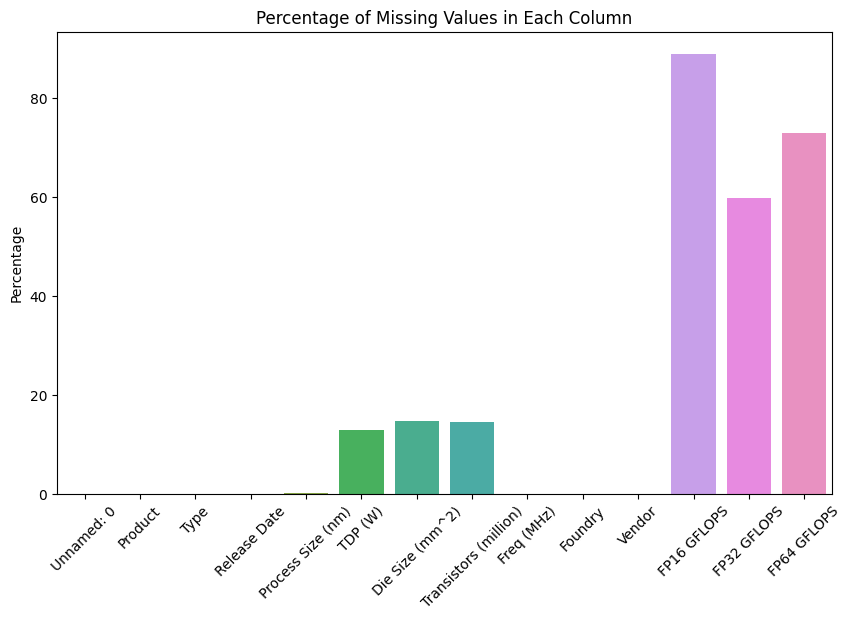

In [5]:
# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().sum() / len(df) * 100

# Create a bar plot to visualize missing data
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values)
plt.title("Percentage of Missing Values in Each Column")
plt.xticks(rotation=45)
plt.ylabel("Percentage")
plt.show()


Develop a strategy to deal with the missing values, i.e deletion, imputation by mean or mode etc, whilst providing rationale for your approach.

In [6]:
# Fill missing numerical values with mean
df.fillna(df.mean(), inplace=True)

# Fill missing categorical values with "Missing"
df.fillna({"year": "Missing"}, inplace=True)


TypeError: Could not convert ['AMD Athlon 64 3500+AMD Athlon 200GEIntel Core i5-1145G7Intel Xeon E5-2603 v2AMD Phenom II X4 980 BEIntel Xeon E5-2470 v2AMD Phenom X4 9750 (125W)Intel Pentium D 930Intel Core i3-1125G4AMD Athlon 64 X2 4200+AMD Sempron 2800+Intel Core i7-3632QMAMD C-70Intel Core i5-8269UAMD Phenom X4 9600 BEIntel Pentium 3560YAMD Turion X2 Ultra ZM-84Intel Pentium 4 506Intel Xeon E5-2430 v2AMD Athlon 64 X2 4800+Intel Core i5-3427UAMD Opteron 148 HEAMD Athlon 1100Intel Core i7-975AMD Athlon 64 3500+Intel Pentium 4 HT 672Intel Pentium D 830AMD EPYC 7371Intel Pentium 4 HT 550Intel Pentium III 1266SAMD Sempron 140AMD EPYC 7501Intel Atom E680Intel Xeon E5-2690 v2Intel Xeon Platinum 8380Intel Xeon Phi 7120AIntel Core i3-8020Intel Atom S1220AMD Phenom X4 9600Intel Core i3-2330MAMD Opteron X2 180AMD E2-3200AMD Turion 64 MT-34Intel Pentium III  866Intel Core 2 Quad Q9550SIntel Core i7-4500UAMD Opteron X2 185Intel Core i3-8300AMD Ryzen 5 1400AMD A4-3300MIntel Xeon 3.20AMD Opteron 848Intel Core 2 Extreme QX6700Intel Pentium Gold G6405TAMD A6-3600Intel Xeon Phi 7120XIntel Core i9-10900KIntel Pentium 2129YAMD Athlon 64 X2 5600+AMD Athlon II X4 640Intel Atom Z515AMD EPYC 7302Intel Celeron 3205UIntel Core i3-10305TAMD Ryzen 9 5900HXAMD EPYC 7502AMD Athlon 64 4000+Intel Pentium III 1400SIntel Core i7-9850HEAMD Mobile Athlon 64 3400+Intel Xeon E5-2620 v2Intel Core i9-10850KIntel Core i5-11600Intel Core i7-3555LEIntel Xeon E3-1220L v2Intel Core i3-8130UIntel Xeon Platinum 8260AMD Athlon 64 3500+AMD Ryzen 9 5950XIntel Atom N2600Intel Xeon Platinum 8352MAMD EPYC 7763Intel Core i7-8809GAMD Ryzen Threadripper PRO 3955WXIntel Celeron 2980UAMD Athlon 64 X2 4000+Intel Xeon E5-2630L v2Intel Core i5-3570AMD Ryzen 7 3750HIntel A110AMD Ryzen 5 5500UIntel Core i9-10800FIntel Xeon MP 3.50Intel Core i3-10110UIntel Core i3-10305Intel Core Solo T1350AMD A4-5300BIntel Core Duo T2600Intel Pentium G4500AMD A8-5600KAMD Athlon XP 2600+AMD Athlon 64 3000+Intel Pentium D 945Intel Celeron B800Intel Atom E665CAMD E1-2150Intel Core i5-10210UAMD Athlon Gold 3150GIntel Celeron 2.70Intel Xeon Gold 5318NAMD Athlon 64 3500+AMD Sempron 3400+ EE SFFIntel Core i7-3525MAMD A6-3410MXIntel Core i5-450MAMD Opteron A1150Intel Pentium G3430Intel Core i7-10610UIntel Core i5-4210UIntel Core 2 Duo E6420AMD Athlon XP 1900+Intel Pentium III 1400AMD Athlon 64 3000+Intel Xeon E3-1290 v2AMD Phenom X3 8550Intel Core i5-8600KIntel Xeon Platinum 8356HAMD Athlon XP 2200+AMD Athlon Silver PRO 3125GEIntel Mobile Pentium 4 HT 538Intel Core i7-8700Intel Pentium Dual-Core E2220AMD Ryzen 5 4600UAMD Ryzen Threadripper 2970WXAMD Opteron X2 875 HEIntel Atom Z605Intel Xeon Platinum 8351NIntel Atom N475Intel Core i5-3350PIntel Xeon E5-1660 v2AMD Sempron 3300+AMD Ryzen 5 PRO 2600AMD Phenom X4 9450eAMD A4-3420Intel Pentium 4 1.80AMD Opteron 248Intel Pentium 4 506Intel Core i7-3840QMIntel Pentium 4 2.53Intel Mobile Pentium 4 2.40Intel Xeon Phi 7110PIntel Core i3-7300Intel Core i7-3520MAMD Turion 64 MT-30AMD Sempron LE-1300Intel Atom Z625Intel Core i5-4200UIntel Pentium E5700Intel Core i3-3110MIntel Pentium G3420TAMD E1-1500AMD A10-9700EIntel Pentium 4-M 2.00Intel Xeon E5620Intel Core i3-3120MAMD Opteron 6274AMD Ryzen 7 1800XIntel Core i3-3120MEAMD Ryzen 3 3200UIntel Xeon E-2124GAMD Athlon 700AMD Athlon 64 2700+AMD Ryzen 7 2700XAMD Ryzen Embedded V1807BAMD Athlon II X3 415eIntel Core i5-2310AMD FX-8320Intel Core i7-10700KAMD Opteron 6386 SEAMD Opteron X2 875Intel Celeron 877AMD Phenom II X6 1100T BEIntel Core i3-5157UIntel Core i3-4130Intel Core i7-3910KIntel Core i7-3632QMIntel Core i7-8670TAMD Opteron 144Intel Core i7-5650UIntel Pentium 4 HT 515AMD Opteron 242Intel Core i5-7600Intel Xeon 2.8Intel Core 2 Duo E7600Intel Core i7-9700KAMD Phenom II X4 910AMD EPYC 73F3AMD Sempron 2500+Intel Pentium G3450AMD EPYC 7601Intel Xeon E7-8860 v3Intel Xeon 5140AMD Phenom X4 9850 BEAMD Ryzen 3 3100Intel Core i7-4940MXIntel Core 2 Quad Q6600 (105W)AMD Athlon 64 FX-62AMD Athlon X2 7750 BEIntel Core i7-3740QMIntel Core i3-4150TIntel Atom N570Intel Core 2 Duo T7300Intel Atom E645CIntel Core i7-5820KIntel Celeron E3400AMD FX-6120Intel Pentium G632Intel Pentium 4 HT 531AMD Opteron 248 HEAMD Opteron X2 290Intel Pentium 4 HT 3.20AMD Athlon II X4 610eIntel Core i3-3110MIntel Core i7-5550UAMD Sempron 2800+AMD FX-9590Intel Pentium 4 2.0AMD EPYC 7443PIntel Celeron G1620TAMD Phenom II X6 1055T (95W)AMD A4-4000AMD Phenom X4 9650AMD Athlon XP 2600+Intel Core i5-4350UAMD Ryzen Threadripper 1900XIntel Celeron B820Intel Xeon W3670Intel Core i7-7740XIntel Core i7-4610MAMD Opteron 6282 SEIntel Celeron N2805Intel Pentium 4 HT 631Intel Xeon L5609AMD Phenom II X3 715 BEIntel Core i5-8420TAMD Opteron 152AMD Sempron 3400+Intel Xeon E5603Intel Pentium G2100TAMD Sempron 2600+Intel Pentium 4 HT 660AMD Athlon Gold PRO 3150GEIntel Core i7-10750HIntel Celeron 887AMD A8-3550MXIntel Xeon E-2124AMD Phenom II X4 830AMD Athlon II X2 250AMD FX-6200AMD Opteron 848AMD Phenom X4 9350eIntel Pentium B980AMD Athlon II X4 635Intel Celeron B810Intel A100AMD Opteron X1150Intel Core i9-9820XAMD A12-9800EIntel Xeon Phi SE10PIntel Core 2 Duo E6750Intel Core i7-990XIntel Core i5-9400Intel Core 2 Duo E4300AMD A4-1250Intel Pentium 4 HT 2.80AMD Ryzen 7 1700XAMD A6-3650AMD Ryzen Embedded V1605BIntel Pentium 4 HT 620Intel Core 2 Duo T5600AMD Athlon 64 LE-1640AMD Sempron 2800+AMD A10-5800BIntel Core Solo T1200Intel Xeon Phi 7285AMD Athlon 64 3800+Intel Xeon Phi 31S1PAMD Opteron 144Intel Xeon MP 7040 Dual-CoreIntel Pentium 4 2.80AMD Phenom II X2 B57Intel Celeron G1840TIntel Core i3-3120MAMD EPYC 7402Intel Core i7-11700TIntel Pentium 4 1.9AMD Opteron 6284 SEAMD Turion X2 RM-74AMD Opteron 4340AMD Athlon 64 3700+AMD Athlon II X4 638AMD Sempron 3800+Intel Pentium 2117UAMD Athlon 800Intel Core 2 Quad Q7600Intel Xeon E7-8870AMD FX-8350AMD Athlon 64 X2 4400+ EEIntel Core 2 Duo T5200AMD Opteron 4386Intel Xeon W5580AMD Athlon X2 BE-2400AMD Phenom II X4 920Intel Core i3-7350KAMD Sempron 2500+Intel Xeon Phi 7235AMD Sempron 3500+AMD Opteron 250Intel Xeon MP 7030 Dual-CoreIntel Core i5-9600KAMD FX-8170AMD Opteron 850Intel Core i5-10300HIntel Core i7-5557UIntel Core i7-2860QMIntel Core i7-9750HFIntel Pentium 350AMD Ryzen 5 2600XIntel Core M-5Y70Intel Pentium 4 HT 2.40AMD Ryzen 7 4700UIntel Atom E620TAMD Opteron 43GK HEAMD Athlon X2 7450Intel Atom E3825Intel Celeron N2808AMD Ryzen 5 1500XAMD Athlon 64 X2 4400+AMD A4-4300MIntel Core i5-670Intel Xeon Platinum 8358Intel Core 2 Duo U7600Intel Core i7-4760HQIntel Pentium D 940AMD Turion 64 MT-37Intel Core i5-4300MIntel Core i7-3635QMAMD Opteron 6376AMD EPYC 72F3AMD Opteron 244Intel Core i5-3330SIntel Xeon Platinum 8352SIntel Pentium 4 2.40Intel Xeon MP 3.00Intel Xeon E5-2695 v2Intel Pentium M 725AMD Sempron 2800+Intel Xeon 5110AMD A4-3320MIntel Mobile Pentium 4 2.80Intel Core i7-4960XIntel Core i3-9350KAMD Athlon II X2 250eAMD Athlon 64 X2 6000+AMD Athlon 64 LE-1620Intel Celeron 2.40AMD EPYC 7232PIntel Atom CE4150AMD Athlon II X2 220AMD Opteron 4334Intel Core i9-9940XIntel Core 2 Quad Q9400Intel Xeon E7-8891 v3Intel Pentium 967Intel Core i9-9990XEIntel Core i7-1160G7AMD Athlon 900Intel Celeron G460Intel Core i7-6700TAMD FX-6350Intel Celeron G3900Intel Pentium G850AMD EPYC 7742Intel Core i7-4810MQIntel Core i9-9920XIntel Core 2 Duo E8600AMD Sempron LE-1150AMD Phenom II X6 1090T BEIntel Xeon 7130MIntel Core i3-4160TAMD Sempron 130Intel Atom N470AMD Sempron 3100+Intel Core Duo LV L2500AMD Sempron 2300+AMD A10-5700AMD A4-1350Intel Pentium III 1000Intel Core i3-10100Intel Atom Z530Intel Xeon W3580Intel Core i5-9600KFAMD Athlon 64 3800+AMD Opteron 250AMD Athlon 64 X2 4600+ EEIntel Core i5-2435MAMD Athlon XP 2200+AMD Athlon 1200Intel Pentium III  800AMD Athlon XP-M 2200+Intel Pentium 4-M 1.40Intel Core i3-2377MIntel Atom D510Intel Core i7-5775CIntel Core Duo T2250Intel Atom N455Intel Core i7-10510YIntel Pentium D 840Intel Xeon E5-2609 v2Intel Core 2 Duo E4600Intel Xeon E7-8893 v3Intel Core i7-620MAMD Phenom II X3 B75AMD Athlon 64 3000+AMD Athlon 64 3200+Intel Xeon 3.06Intel Pentium 4 HT 520AMD Athlon 64 FX-51Intel Xeon E3-1280 v5AMD Athlon II X3 455Intel Pentium 4 2.0AMD Ryzen 7 2700Intel Core i7-9700KFIntel Celeron 2.30AMD Athlon 750AMD Sempron 150AMD Athlon 1200Intel Core 2 Duo T7600GIntel Core i5-8420Intel Core i7-3970XAMD Mobile Athlon 64 3400+AMD Opteron 6168AMD Athlon X2 QL-65AMD Athlon XP 2800+ DTRIntel Atom E660Intel Core i5-3475SAMD C-50AMD Athlon 64 FX-74Intel Atom N280AMD Turion 64 ML-40Intel Celeron 2.80Intel Pentium G630TAMD Phenom II X3 B73AMD Ryzen 3 1300XIntel Pentium M 715Intel Xeon 5150Intel Pentium D 840 EEAMD Athlon X2 4050eIntel Core i7-4790SAMD Ryzen 5 PRO 3500UIntel Xeon E3-1280Intel Core 2 Duo U7600AMD Athlon XP 2400+AMD E1-2100AMD EPYC 7401PIntel Core i5-1135G7AMD Turion X2 Ultra ZM-87Intel Xeon 7140MIntel Xeon E5-2650 v2Intel Atom Z620Intel Xeon 2.0AMD Phenom II X3 705eIntel Pentium 4 511AMD Athlon XP 3000+AMD Phenom II X3 700eAMD Opteron 842AMD Sempron 3000+Intel Pentium 4 1.8AIntel Core i5-8500TAMD Opteron X2 270 HEIntel Xeon 7110MAMD FX-8140Intel Atom D2550Intel Celeron G3920AMD Ryzen 5 3400GIntel Core i3-8145UAMD Athlon 64 X2 6000+AMD Ryzen 3 PRO 4350GEIntel Core 2 Duo E6600AMD EPYC 7272Intel Core i3-8350KAMD Athlon 64 LE-1660Intel Pentium SU4100AMD Athlon 64 2800+AMD Turion X2 Ultra ZM-88Intel Pentium M 765Intel Core i3-350MIntel Xeon Platinum 8352VAMD Ryzen 5 5600GAMD Phenom X3 8400Intel Core i5-7500TIntel Core i7-8550UAMD Ryzen Threadripper 1920XIntel Core i5-1035G1Intel Celeron N2930Intel Pentium 4 2.4AMD EPYC 7551PAMD Athlon XP-M 2000+Intel Core i3-2102AMD Ryzen 7 4700GEAMD A6-3400MAMD EPYC 7451Intel Atom Z510PTAMD Ryzen 7 PRO 3700UAMD Athlon 64 X2 5200+AMD Athlon 64 X2 4200+Intel Pentium 4 HT 641Intel Core M-5Y10aAMD Athlon II X2 260Intel Pentium 4 HT 524AMD Opteron 840AMD Athlon 64 X2 4600+Intel Pentium 4-M 1.60Intel Pentium M 780AMD A8-3850Intel Celeron G540TAMD Opteron 240 EEAMD Opteron 3380Intel Core i7-640MIntel Xeon E5-2403 v2Intel Pentium G640Intel Core 2 Duo U7500Intel Xeon E3-1230Intel Pentium Dual-Core E2160Intel Pentium 997Intel Xeon Phi 7295AMD Athlon II X3 440AMD Phenom II X6 1055T (125W)Intel Core i7-9750HAMD Ryzen 3 PRO 1300Intel Core i5-3470SAMD Sempron 3100+Intel Xeon 5148AMD Athlon XP-M 3000+Intel Core i5-7640XAMD Sempron 2600+AMD FX-8320EAMD Athlon X2 5050eAMD Ryzen 5 PRO 2500UIntel Core i5-4690KIntel Core i7-4850EQAMD EPYC 7301AMD EPYC 7551Intel Core i5-4440Intel Pentium G3460Intel Celeron G5900AMD Athlon 1300Intel Xeon Phi 7210FIntel Core 2 Duo U7700Intel Xeon E7-8860AMD Opteron 2350 HEIntel Xeon 3.06Intel Core i5-3610MEAMD Athlon 64 1500+AMD Sempron 3100+AMD Sempron 3400+AMD Mobile Athlon 64 3200+AMD Athlon 3000GIntel Xeon X5687AMD Phenom X3 8850AMD Sempron 2200+Intel Pentium 4 1.9AMD Phenom X4 9600BAMD Opteron 842AMD Athlon XP 1800+Intel Xeon Platinum 8180MIntel Core i3-2100TAMD Sempron 2600+AMD Athlon XP 2500+Intel Pentium III  933Intel Pentium P6100Intel Core 2 Duo U7700Intel Celeron G1101Intel Pentium M 760AMD Opteron 3350 HEAMD Athlon 64 3200+Intel Xeon MP 7030 Dual-CoreAMD A8-5557MIntel Celeron 857AMD Ryzen 3 5300GIntel Pentium 4-M 2.50Intel Core i3-10325AMD EPYC 7542AMD Athlon 64 3000+AMD E2-2000Intel Pentium 4-M 1.90AMD Athlon 64 X2 3600+AMD EPYC 7402PIntel Core i7-880Intel Pentium 4 HT 561Intel Pentium 4 HT 661Intel Pentium Dual-Core T4500Intel Core i5-655KAMD Opteron 144Intel Pentium 4 HT 2.8EIntel Core i7-11700Intel Xeon Platinum 9221AMD EPYC 7H12Intel Core i5-9400FAMD Phenom II X2 B55AMD Athlon 64 LE-1600Intel Core i7-7820XAMD Opteron 148Intel Core i3-2328MIntel Core i5-4690Intel Core i9-10940XAMD Athlon II X3 450Intel Xeon E3-1235AMD Athlon 64 FX-76Intel Xeon E5-2670 v2Intel Atom E640AMD Athlon 950AMD Athlon X2 7850 BEIntel Core 2 Extreme QX9300AMD Sempron 2600+Intel Xeon Phi 3110XAMD EPYC 7702Intel Celeron G1620Intel Core 2 Duo E8400Intel Xeon L5506AMD Athlon 64 3500+Intel Xeon Phi 5110PIntel Core i3-4330TAMD Ryzen 5 5600XIntel Xeon Gold 5315YAMD FX-8100AMD Ryzen Threadripper 1940Intel Xeon Phi 7120DAMD Sempron 2800+AMD Mobile Athlon 64 2800+AMD E1-1200Intel Core i3-2340UEIntel Core i3-1005G1AMD Mobile Athlon 64 3000+Intel Xeon Platinum 8270AMD Sempron 3000+Intel Atom Z560Intel Pentium G840AMD Phenom II X4 820AMD Opteron 43CX EEAMD Ryzen 5 PRO 2400GIntel Celeron G530AMD Ryzen 5 PRO 1500AMD Phenom II X4 840TIntel Core i7-11700KIntel Pentium E5200AMD Athlon 64 3600+AMD Phenom X4 9100eIntel Pentium M 770Intel Core 2 Quad Q8200Intel Celeron G4920AMD Athlon 1333AMD Athlon 64 3200+AMD Turion X2 RM-77AMD Phenom II X4 910eIntel Atom D425AMD EPYC 7543PIntel Core i3-8120Intel Core Duo T2400Intel Pentium 4-M 1.50Intel Xeon MP 3.66Intel Xeon 2.66Intel Celeron D 326Intel Pentium Dual-Core E2180AMD Sempron 3000+AMD A8-3510MXIntel Xeon Platinum 8380HIntel Xeon Phi SE10XAMD Phenom II X3 740 BEAMD Athlon Gold PRO 3150GAMD Opteron 252Intel Core i5-6400Intel Atom Z550AMD Athlon II X4 620AMD Ryzen Threadripper 1950XIntel Xeon E5-2420 v2AMD A6-5350MAMD Phenom X4 9550Intel Core 2 Duo E7200Intel Xeon Platinum 8368QIntel Core Duo ULV L2500Intel Mobile Pentium 4 HT 552Intel Xeon Platinum 8360HIntel Xeon E5-4610Intel Celeron E3500Intel Core i7-3517UIntel Xeon E3-1220LAMD Opteron X2150Intel Core i3-3225AMD Phenom II X2 565 BEIntel Core i3-2105AMD Turion 64 ML-34Intel Core Duo LV L2400Intel Core i7-1068G7Intel Xeon Gold 6334Intel Celeron D 341AMD E2-1800Intel Pentium 4 1.4Intel Pentium G860Intel Xeon 3.0AMD Athlon 64 3700+AMD E2-3000AMD Athlon 64 3100+Intel Core i5-11600TIntel Celeron 787AMD Athlon XP 2600+Intel Xeon E3-1270 v2Intel Core i5-10600AMD EPYC 74F3Intel Core i9-7960XAMD Athlon XP 1700+AMD Ryzen 9 3900XAMD Opteron 150AMD Ryzen 3 4300GEIntel Pentium 4 HT 571Intel Core 2 Quad Q9450Intel Xeon E3-1245 v2AMD FX-9370Intel Pentium 4 HT 560Intel Core i5-10400AMD Athlon 64 3400+Intel Xeon 3.2Intel Pentium 4 HT 651AMD Athlon XP 2000+AMD E-350Intel Atom E680TAMD Athlon II X2 250uIntel Pentium 4 505JIntel Xeon Platinum 8376HLIntel Pentium 4 511Intel Xeon W-2195Intel Xeon Phi 7250FAMD Ryzen Threadripper 1940XIntel Xeon E3-1240Intel Core i7-1060G7Intel Pentium M 1.40Intel Xeon E5630Intel Core i3-7120TIntel Core i5-2557MIntel Core i5-4200YIntel Celeron G550TAMD A4-6300AMD A10-9700AMD Turion 64 MT-32Intel Core i3-8300TAMD Athlon 64 3800+Intel Celeron G1630AMD Turion X2 Ultra ZM-82Intel Core i7-2675QMAMD Opteron 140AMD EPYC 7552Intel Core i3-9300Intel Pentium 4 HT 520AMD Athlon 64 3500+AMD Mobile Athlon 64 3000+Intel Core 2 Duo U7500AMD Phenom X4 9850 (95W)Intel Pentium 4-M 1.70AMD Sempron 3200+ EE SFFIntel Core i3-2357MAMD Athlon II X2 270Intel Atom D525AMD EPYC 7702PIntel Pentium G3220TIntel Core i7-4930KAMD Athlon XP-M 2200+AMD Opteron 146Intel Xeon E5507AMD Turion 64 ML-42AMD Ryzen 3 1300Intel Core i3-5010UIntel Celeron G1840Intel Core i7-4860HQIntel Core i7-8750HAMD Turion X2 RM-72AMD Athlon 64 FX-72Intel Atom Z670AMD Opteron 146Intel Core i3-2312MAMD Athlon 64 X2 4600+Intel Core i7-11700FAMD Athlon XP 2400+Intel Core i7-5600UIntel Core i3-560AMD E2-3000MAMD FX-8370EAMD Athlon XP 2000+Intel Celeron E1200Intel Core i3-2100AMD Ryzen 5 PRO 4650GIntel Core i9-7920XAMD Sempron 2400+Intel Celeron B730AMD C-60Intel Celeron 2955UIntel Xeon L5618Intel Core i5-5250UAMD Athlon 64 3200+AMD Ryzen Threadripper 2990WXAMD A9-9420 SoCAMD Mobile Athlon 64 3700+Intel Pentium 4 HT 521AMD Phenom II X4 900eAMD A10-7870KIntel Xeon E5-1650 v2AMD Phenom II X4 965 BE (140W)AMD Ryzen Threadripper 1950AMD Athlon II X4 605eIntel Core i5-1035G4Intel Core i3-1115G4Intel Xeon Silver 4310AMD Ryzen 7 3780UAMD Athlon 1400AMD Phenom II X4 965 BE (125W)Intel Core i3-10105FIntel Pentium 4 HT 662Intel Xeon 5050AMD Sempron X2 2200AMD Opteron 246 HEAMD Athlon 64 3200+AMD Opteron 850 HEIntel Xeon Phi 7290FIntel Core i5-8600TAMD Ryzen 7 4800UAMD Phenom II X2 570 BEIntel Xeon Gold 6314UIntel Atom E620AMD Opteron 842AMD A8-5545MIntel Core i7-8700TAMD Athlon 64 2800+AMD Athlon 64 3500+AMD Athlon 64 X2 5400+AMD A6-3500AMD Athlon PRO 300UIntel Atom E3827AMD A4-5000AMD Phenom II X4 805Intel Core i7-10810UIntel Core i3-380MIntel Celeron P1053Intel Core i5-10600KAMD Athlon 300UAMD Athlon PRO 200GEAMD Opteron 6378AMD Phenom II X4 975 BEIntel Core i7-8650UAMD Opteron 140 EEIntel Atom Z540Intel Xeon E3-1290AMD EPYC 7502PIntel Xeon E5520Intel Pentium 4 519KIntel Core 2 Solo ULV U2100AMD Opteron 148AMD Sempron 3100+Intel Xeon MP 2.83AMD Athlon II X2 245AMD Phenom II X4 840Intel Xeon 7110NIntel Core i5-2430MAMD Opteron X2 275 HEAMD Opteron 146AMD Opteron 6262 HEAMD Ryzen 9 3900XTIntel Core i7-3520MIntel Core i3-1000G4AMD A8-9600Intel Xeon E7-8880 v3AMD Ryzen 5 3500XAMD EPYC 7281Intel Pentium 4 HT 516AMD Opteron 144AMD Opteron X2 260 HEAMD Phenom X4 9150eIntel Xeon E5-2450 v2Intel Pentium III 1133Intel Xeon Platinum 8362AMD Athlon 64 3800+ (F3)Intel Core i3-7340AMD EPYC 7F72AMD Athlon X4 950AMD Ryzen 7 PRO 1700AMD A4-5145MIntel Pentium E6600AMD Athlon 64 LE-1620AMD FX-4120Intel Celeron 2950MAMD Athlon XP 1800+Intel Core i7-4980HQIntel Core i7-6950XIntel Core 2 Quad Q8300Intel Pentium E6500KIntel Mobile Pentium 4 HT 532Intel Core 2 Duo E8300AMD Athlon XP 2600+Intel Core i9-9900KFIntel Pentium Gold G6505TAMD Phenom II X4 B97AMD Athlon XP 2800+Intel Celeron G3930TIntel Core i7-9700AMD Athlon 64 3400+Intel Atom E3845AMD Phenom II X4 850AMD Opteron 248AMD A10-7850KAMD EPYC 7452Intel Core i7-950Intel Core i3-370MIntel Celeron D 335AMD Ryzen 9 5900XIntel Core i3-3220TAMD Phenom II X2 555 BEAMD Opteron 242Intel Pentium M 740Intel Core i7-6700KAMD Athlon X2 7550Intel Core i5-8300HIntel Core i9-8950HKIntel Xeon E7-8880L v3Intel Xeon E3-1285 v4AMD A4-3400Intel Atom E3826AMD Ryzen 9 3950XIntel Xeon MP 3.16AMD FX-4170AMD Mobile Athlon 64 2800+AMD Ryzen 5 2600Intel Xeon E5-2692 v2Intel Core i7-3930KIntel Celeron 2.0Intel Core 2 Quad Q9300Intel Pentium G6950Intel Mobile Pentium 4 HT 2.66Intel Core i7-3630QMIntel Core i7-2700KAMD Opteron 850AMD Ryzen 5 4600HSAMD Sempron 3100+Intel Core i7-9700FIntel Pentium D 965 EEAMD Athlon 64 3000+Intel Core 2 Duo T7600Intel Core i3-4102EAMD Opteron 246 HEAMD Phenom X3 8450eIntel Pentium G860TAMD Ryzen 7 2700UIntel Pentium 4 HT 3.4EIntel Core i3-9100FAMD Phenom II X4 810Intel Core i3-6300Intel Xeon E7-8867 v3Intel Pentium E5800Intel Xeon W3530Intel Pentium Gold G5620AMD Opteron 846 HEAMD Phenom X3 8750 BEAMD A6-3620AMD A6-5345MAMD A10-7700KAMD EPYC 7313PIntel Core i7-1165G7AMD E-450AMD Athlon 64 X2 3600+ EEAMD Ryzen 5 3500UIntel Pentium 4 1.6Intel Pentium G3250TIntel Core i3-4340Intel Pentium 4 HT 3.0EIntel Core i3-2125Intel Pentium M 1.60Intel Pentium 4 HT 541AMD Mobile Athlon 64 3200+Intel Pentium D 925AMD Athlon II X4 600eIntel Core i7-4650UIntel Core i5-3360MAMD Opteron 844AMD Opteron X2 870 HEAMD Athlon 64 LE-1640AMD Sempron 2400+AMD Turion 64 ML-37Intel Pentium III 1133SAMD Opteron X2 285Intel Core 2 Duo T7250Intel Core i3-4005UIntel Pentium 4 1.4Intel Atom N270Intel Core i9-10900XAMD A8-5550MIntel Core i5-8265UIntel Core i7-10875HAMD Athlon 64 X2 4000+ EEIntel Xeon Platinum 8360HLAMD A6-9220C SoCIntel Pentium M 1.50Intel Xeon Phi 7120PAMD Sempron 2800+Intel Pentium Dual-Core T4200Intel Core 2 Duo E6300AMD Athlon 64 X2 4000+Intel Core i7-8559UAMD Athlon XP-M 2600+Intel Core i3-7300TIntel Pentium D 935AMD Athlon XP 2100+Intel Pentium G645TIntel Core Duo T2050AMD Athlon 64 3200+Intel Pentium G3220Intel Pentium 4 HT 516Intel Core i5-9400TIntel Core i5-6350HQIntel Xeon Platinum 8358PIntel Xeon W3540Intel Core 2 Duo E6400Intel Core i9-11900FIntel Pentium Dual-Core T4400Intel Xeon MP 2.83AMD A6-3430MXAMD Athlon XP 2000+Intel Core i7-965Intel Core i5-6500Intel Core M-5Y31Intel Xeon X5647Intel Xeon Platinum 8280MIntel Core i3-9350KFIntel Core i7-2960XMIntel Core 2 Duo E8500AMD Sempron X2 2100AMD FX-4350Intel Core i7-11700KFIntel Core i5-3210MAMD Ryzen 5 3600XTIntel Pentium Dual-Core E2140AMD EPYC 7261AMD Athlon XP-M 2500+AMD A6-5200Intel Core i5-8305GAMD A6-3670KAMD A9-9425 SoCIntel Xeon 5130Intel Core i7-4770HQIntel Atom CE4130AMD Athlon 850AMD A12-9800Intel Xeon Gold 5320AMD Ryzen 3 2300UAMD FX-4150AMD A4-4355MAMD Ryzen 3 4300GIntel Core i5-3320MIntel Core i7-940AMD A4-5300AMD A9-9400 SoCAMD Ryzen 7 4700GAMD Sempron 3000+Intel Core i7-3667UIntel Core i5-5675CIntel Pentium Dual-Core E2210Intel Core i9-7980XEIntel Xeon Platinum 8276Intel Core 2 Duo T7100AMD EPYC 7413AMD Opteron 6348AMD Opteron X2 870Intel Xeon MP 7020 Dual-CoreIntel Core i3-3240AMD Sempron 3200+Intel Atom N550AMD A10-4600MIntel Core i5-2435MIntel Xeon E5-2667 v2Intel Core 2 Quad Q8400SIntel Pentium D 915Intel Core 2 Duo T5500AMD Phenom X4 9750BAMD Phenom II X4 B95AMD E-300Intel Xeon E3-1220 v2Intel Pentium 4 HT 517Intel Xeon E5-2697 v2Intel Xeon 7120NIntel Core i3-10320Intel Core Duo LV L2300Intel Core i5-750Intel Core i3-10350KIntel Pentium G3450TAMD Athlon XP 1600+Intel Core i5-8400AMD Athlon X2 QL-62AMD Ryzen 3 PRO 3300UAMD Ryzen 3 PRO 4350GAMD Athlon 64 3400+Intel Xeon Phi 7110XIntel Atom D410Intel Xeon L5520Intel Core i5-7600TAMD Athlon 64 X2 4200+Intel Pentium 4 HT EE 3.46Intel Core i7-10700FIntel Core 2 Duo T7500AMD Athlon X2 QL-60Intel Pentium Gold G6605Intel Xeon Gold 6348Intel Core i7-970Intel Celeron B840Intel Core i7-8850HAMD Athlon II X3 405eIntel Core i3-10110YAMD Ryzen 3 3300XIntel Core i3-2120TAMD Athlon II X2 245eIntel Pentium 4 519KIntel Core 2 Duo E4400AMD Athlon 1400AMD Sempron 3000+Intel Xeon E5-2637 v2Intel Core i5-9500Intel Xeon Silver 4316Intel Xeon E7-4850 v3Intel Core i3-8000Intel Pentium G3420Intel Pentium G4560Intel Core i5-4590Intel Xeon 5120AMD Athlon 64 3400+Intel Pentium Gold G6400Intel Xeon E5-2630 v2Intel Core 2 Duo E8190Intel Pentium G640TIntel Core 2 Solo ULV SU3500AMD Athlon Gold 3150GEAMD Athlon 220GEIntel Core i7-8705GAMD Sempron 2600+AMD Athlon II X3 425Intel Core i5-6600KAMD Athlon 64 4000+ (F3)Intel Xeon 5063AMD Sempron LE-1250Intel Xeon 3.4Intel Celeron N2840Intel Celeron G5920AMD Athlon II X3 445Intel Pentium Gold G6500AMD Ryzen 3 3200GAMD Opteron 146AMD A8-7680AMD Ryzen Threadripper 1900AMD Ryzen 7 2800HAMD Athlon 64 X2 3800+ EE SFFIntel Core i5-10210YAMD Ryzen 5 2500UIntel Core i3-10300AMD Opteron 248AMD Opteron X2 275Intel Xeon E5-4607Intel Core 2 Duo T7800AMD Opteron 844Intel Pentium M 1.70Intel Xeon E7-8870 v3AMD Athlon II X3 400eIntel Core i5-10310YAMD Opteron X2 885Intel Pentium E5300AMD Opteron 840AMD Sempron 145Intel Pentium M 730Intel Atom E665CTIntel Celeron 2.0Intel Xeon 3.06Intel Xeon Platinum 9282AMD Opteron 142Intel Xeon X5650AMD Z-01AMD A4-3300AMD FX-8150Intel Xeon E7-8850AMD Athlon 64 X2 3800+ EEIntel Xeon L5630Intel Core Solo ULV U1500Intel Pentium 4 511Intel Celeron 440Intel Xeon Platinum 8253Intel Atom Z650AMD A10-6800KAMD A10-6790KIntel Celeron D 340AMD Turion X2 RM-75AMD Opteron 846Intel Pentium M 755AMD Mobile Athlon 64 2700+AMD Athlon X4 970AMD Sempron 2200+AMD EPYC 7713Intel Core i3-4100EIntel Core i5-9600Intel Core m3-8114YAMD A8-5500BAMD Opteron 244AMD Mobile Athlon 64 2800+Intel Xeon X5570Intel Core i9-9980XEIntel Pentium G4600TIntel Core i7-960AMD Athlon 64 FX-57AMD A4-5150MIntel Core i7-8700KIntel Core 2 Duo E7300AMD Athlon X2 6500 BEIntel Xeon Gold 5318SAMD A6-9550AMD Athlon XP 1700+AMD Sempron 3500+ EE SFFIntel Pentium G630AMD Opteron 148Intel Xeon Gold 5320TAMD Ryzen 5 2600HIntel Core i5-8250UIntel Pentium E6500Intel Core i5-3335SIntel Pentium G2120Intel Core i7-6700TEIntel Pentium 4 HT 640AMD Athlon 220GEAMD EPYC 7313AMD Opteron 156AMD Phenom II X4 970 BEIntel Core i5-8650Intel Xeon E5506Intel Core i3-6100AMD Ryzen Threadripper PRO 3995WXIntel Pentium 4 HT 517AMD Athlon II X2 270uAMD Athlon 64 3000+Intel Xeon L5640Intel Xeon Silver 4314AMD A6-9120C SoCIntel Core i9-10920XIntel Core i5-1035G7AMD Opteron 244Intel Celeron B830AMD Sempron 3000+AMD Athlon 64 X2 5000+ EEIntel Core i9-9980HKIntel Xeon Gold 6338TAMD Opteron X2 265Intel Pentium 4 HT 3.6EAMD Athlon 64 LE-1640AMD Athlon 64 3700+Intel Xeon 7120MIntel Core i9-10980XEIntel Core i3-4360Intel Core i5-1130G7AMD Ryzen 5 PRO 4650GEAMD Phenom II X3 710Intel Pentium Silver J5005AMD Opteron 150Intel Pentium M 1.30AMD Ryzen 5 3600XIntel Pentium 4 HT 520AMD Opteron 846 HEIntel Xeon Platinum 9242Intel Core i3-10105Intel Core i9-9960XAMD Athlon II X2 240eAMD A8-3530MXIntel Core 2 Quad Q8400Intel Core i5-7600KAMD Sempron 3300+Intel Xeon E5-2680 v2AMD Athlon 64 3400+AMD Athlon 64 X2 4800+ EEIntel Atom S1260Intel Pentium Gold G5500AMD Opteron 6380AMD Athlon II X4 630AMD Athlon 64 X2 4200+Intel Atom E3815Intel Mobile Pentium 4 HT 548Intel Pentium 4 2.4AMD Athlon II X3 420eIntel Core i5-750sAMD Phenom II X4 650TIntel Core i3-3240TIntel Pentium 3556UAMD Athlon X2 4850eIntel Core i3-2130Intel Celeron G1820Intel Core i5-5200UIntel Core i9-9900XAMD Opteron 244Intel Xeon E5-2643 v2Intel Celeron 2955UAMD Phenom II X4 905eIntel Atom Z520AMD Athlon XP 2400+AMD Sempron 2600+Intel Pentium III 1133Intel Core i3-2120Intel Xeon 3.6Intel Celeron G550Intel Xeon E7-4809 v3Intel Xeon E7-4820 v3Intel Core i7-4710HQAMD Sempron 3200+AMD Athlon II X3 435Intel Xeon E3-1225 v2Intel Core i7-6900KIntel Core i5-11400Intel Pentium 4 HT 670AMD FX-6100AMD Athlon 64 X2 3600+Intel Xeon 5060AMD Mobile Athlon 64 2700+Intel Xeon E5-2650L v2Intel Core i5-661AMD Athlon 64 3800+Intel Celeron N2920AMD FX-4100Intel Core i3-8121UIntel Pentium G6951AMD Sempron 2300+AMD FX-6130AMD Phenom II X4 B93AMD Opteron 242AMD Ryzen Threadripper 3980XIntel Core 2 Duo E4700Intel Core i3-2332MIntel Core i7-870AMD A6-1450Intel Pentium D 960Intel Core i7-10700AMD Opteron 842Intel Core Solo T1400AMD Athlon 64 4000+AMD A4-3305MAMD Ryzen 5 2600EIntel Core i9-9880HIntel Core i7-4558UIntel Core i7-3940XMAMD Opteron 250 HEIntel Xeon W3503AMD Athlon 64 3000+Intel Core i9-9900KIntel Pentium 4 HT EE 3.40Intel Xeon Silver 4116AMD Phenom X3 8450Intel Core i3-530AMD Athlon II X4 641AMD Sempron 3400+AMD Ryzen 7 5700GIntel Xeon Silver 4309YIntel Core i7-4550UAMD Opteron 144Intel Core i5-2415MIntel Core i3-8100TAMD Mobile Athlon 64 2800+Intel Pentium III 1333Intel Xeon W3680Intel Core i5-11600KAMD EPYC 7543AMD Phenom II X4 960T BEIntel Core i9-11900KFAMD Ryzen 7 5800HAMD Opteron X2 280AMD Athlon 1133Intel Pentium 4 HT 520AMD FX-8370AMD Ryzen 7 3700UIntel Core i7-6800KIntel Core i5-7400TAMD Phenom II X2 545Intel Core 2 Quad Q6700Intel Core i7-4870HQAMD Athlon 600AMD Athlon II X2 235eIntel Pentium M 735AMD Athlon 64 X2 5800+AMD Athlon XP 2000+Intel Core i5-680Intel Pentium 4 506Intel Core 2 Quad Q9650Intel Core i5-460MIntel Xeon E3-1260LIntel Pentium E6700AMD Athlon 64 X2 4400+Intel Xeon Phi 7210Intel Pentium G645Intel Core 2 Solo ULV U2200Intel Core i3-4330AMD Phenom II 42 TWKR Black EditionAMD Phenom II X4 925AMD Ryzen 7 PRO 2700Intel Celeron N2910AMD EPYC 7F32Intel Core 2 Extreme QX9775AMD Athlon 64 3500+ (F3)Intel Xeon 7140NIntel Core 2 Duo E6700Intel Pentium 4 HT EE 3.20Intel Pentium E6800Intel Xeon Platinum 8180AMD Athlon II X2 265AMD Phenom X4 9500AMD Turion 64 MT-28Intel Xeon W3550Intel Celeron 725CAMD EPYC 7251AMD Ryzen 9 4900HSAMD A10-4655MIntel Atom Z510AMD FX-4130Intel Xeon E3-1265L v2Intel Celeron G1820TEIntel Pentium E5400AMD Athlon XP 2500+ DTRAMD A10-5800KIntel Xeon Gold 5317AMD Athlon II X4 631AMD Opteron 846AMD Athlon 64 X2 3800+AMD Opteron 848Intel Core i7-2670QMAMD Phenom II X6 1035TIntel Xeon Platinum 8354HAMD Sempron 3400+AMD Athlon 64 3500+ EEAMD Ryzen 5 PRO 1600AMD Athlon 64 3200+Intel Xeon Platinum 8280Intel Xeon Gold 6346Intel Pentium G4620AMD Athlon 64 2800+AMD Ryzen 7 3800XTIntel Pentium 957AMD Turion 64 MT-40Intel Xeon X5667Intel Celeron 807AMD Phenom X4 9950 BE (125W)AMD Athlon II X3 425eAMD Athlon XP-M 2400+Intel Xeon W3570Intel Celeron E1400Intel Xeon E5640AMD A4-3310MXAMD Ryzen 3 4300UIntel Core i7-7800XIntel Celeron D 346AMD Sempron 3000+ EE SFFIntel Core i7-10700KFAMD Athlon 64 LE-1640BAMD Opteron 248Intel Pentium B950AMD Athlon II X4 615eIntel Mobile Pentium 4 HT 2.80Intel Core i7-640MIntel Xeon X5677Intel Core i3-4370Intel Core i3-7360XAMD Athlon XP 2200+AMD A6-9500AMD Athlon 64 FX-53AMD Ryzen 7 PRO 4750GEIntel Core i5-3317UIntel Core i5-4590SIntel Core i3-9100AMD Athlon 64 3800+AMD Opteron 6272Intel Core i7-5930KAMD Turion 64 ML-28Intel Core i3-4000MIntel Core i7-10850HIntel Core i5-1030G4Intel Pentium 4-M 2.60Intel Celeron 430Intel Xeon Platinum 8360YIntel Core i5-3570SAMD Opteron 240Intel Core i7-2760QMIntel Xeon MP 3.16Intel Pentium Dual-Core E2200Intel Atom E625CIntel Celeron G1610TIntel Core i5-4330MIntel Core i5-7300HQIntel Celeron G1610Intel Mobile Pentium 4 HT 3.06AMD A6-5357MIntel Xeon L5518Intel Xeon E5645AMD A6-9500EIntel Core Duo ULV L2400Intel Core Duo T2500Intel Xeon E7-8890 v3AMD Athlon X2 QL-67Intel Pentium 4 2.60Intel Xeon E3-1285 v6AMD Sempron 2400+AMD Ryzen 7 1700AMD Athlon 64 3000+Intel Core i7-3960XAMD Phenom II X6 1045TAMD A8-4500MIntel Xeon E5-2660 v2Intel Pentium 4 HT 3.00AMD Athlon 64 FX-60Intel Core i5-11400TAMD Athlon XP 3100+AMD Sempron 3600+Intel Core i5-10500AMD Ryzen 3 PRO 1200Intel Xeon Gold 6326AMD EPYC Embedded 3251Intel Xeon 3.6Intel Atom Z2760AMD Sempron 3400+Intel Pentium G3258AMD Opteron 856AMD A10-5745MIntel Core i5-560MIntel Pentium 4-M 2.20Intel Core i5-430MAMD Ryzen Threadripper 2920XIntel Core i5-8650KIntel Pentium 4 HT 540Intel Core i7-8565UIntel Atom CE4100Intel Core i9-7940XIntel Pentium Gold G6600Intel Core i9-9900KSIntel Atom Z3770AMD Opteron X2 865 HEIntel Core i7-980Intel Xeon Gold 6154AMD Ryzen 3 2300XIntel Pentium G3250Intel Atom Z500Intel Celeron E3300AMD Athlon 64 X2 4800+AMD Athlon 64 3200+AMD A10-7890KAMD A10-5757MAMD Sempron X2 2100Intel Xeon MP 3.00Intel Core i7-9850HLIntel Core i7-860SIntel Pentium 4 HT 3.40Intel Celeron 2.60AMD Athlon 64 3500+Intel Pentium 4 HT 630Intel Celeron 445AMD Turion X2 RM-70AMD Opteron 146 HEIntel Core i3-4160Intel Core i7-4790Intel Core i5-3330AMD Sempron 2500+Intel Core i7-7700Intel Core Duo T2700Intel Core Solo ULV U1400AMD Athlon 64 3500+AMD Ryzen 5 2400GAMD Ryzen 3 3250UAMD Athlon II X2 260uIntel Xeon Phi 7230FIntel Xeon 2.8Intel Pentium 4 HT 3.2EAMD Athlon XP 2400+Intel Core 2 Duo E6320AMD Phenom II X2 550 BEIntel Celeron G1850Intel Pentium G622Intel Core i3-9000AMD Athlon 64 FX-70Intel Atom 230AMD Ryzen 5 3600Intel Pentium 4 HT 2.60AMD Ryzen 5 3580UIntel Core i5-11500Intel Core i7-8706GIntel Core i7-4960HQAMD Mobile Athlon 64 3000+Intel Pentium 4 1.5AMD Ryzen Embedded V1202BIntel Core i7-870SIntel Xeon X5560Intel Pentium 4 2.0AMD Turion X2 Ultra ZM-80AMD Athlon 64 X2 4600+Intel Core 2 Extreme X6800AMD Opteron X2 170Intel Xeon 5040Intel Xeon Phi 7250Intel Xeon Gold 6328HLIntel Celeron D 330Intel Core M-5Y10AMD Ryzen 5 4600GEIntel Core i7-1185G7Intel Core i9-7900XIntel Xeon 3.20Intel Celeron 2950MIntel Core i9-10900Intel Core M-5Y71Intel Xeon W-3175XAMD Turion X2 Ultra ZM-85AMD Ryzen 3 2200GAMD Phenom II X4 945 (95W)AMD EPYC 7F52Intel Mobile Pentium 4 HT 518Intel Core i7-1065G7AMD Athlon 64 2850eIntel Core i7-6700AMD Athlon 64 X2 4800+Intel Xeon 5080Intel Celeron G465Intel Core i5-2405SIntel Pentium III 1000SIntel Pentium B960AMD Opteron 240AMD Athlon 64 X2 4200+ EEAMD Phenom II X6 1075TIntel Core 2 Quad Q6600 (95W)Intel Pentium Dual-Core T4300Intel Core i5-7500Intel Celeron G1830Intel Xeon 7130NIntel Xeon Phi 3120AIntel Core i3-4350AMD A10-6700Intel Xeon MP 3.16Intel Core 2 Duo E7500AMD A10-6700TAMD Athlon XP 1800+Intel Xeon E5-2440 v2AMD A9-9410 SoCIntel Core i3-4130TIntel Core i5-4250UAMD Athlon II X2 240AMD Opteron 140Intel Xeon Gold 5318YIntel Celeron G3950AMD A8-6500Intel Pentium M 745AMD Athlon 64 X2 4600+AMD Opteron 4376 HEIntel Xeon E5-2640 v2AMD Ryzen 3 1200AMD Phenom II X4 970 BEIntel Celeron N2820Intel Pentium G4560TIntel Xeon X5660AMD Opteron X2 165Intel Core i3-3217UEAMD Sempron 2800+AMD Phenom II X2 B53AMD Athlon II X2 255Intel Core i3-5005UIntel Pentium 4 HT 551Intel Core i7-3517UEIntel Xeon E5502Intel Celeron G555AMD Athlon 64 3300+Intel Mobile Pentium 4 2.66Intel Core i9-11900TAMD Opteron 6276AMD Opteron 6278Intel Xeon E5-1620 v2AMD Phenom X4 9750 (95W)AMD Mobile Athlon 64 2700+AMD Phenom X3 8600AMD FX-4320AMD Athlon 64 X2 5400+ BEIntel Core i3-8109UIntel Celeron N2807Intel Core i5-660Intel Xeon Bronze 3106Intel Celeron D 350AMD Opteron X2 175Intel Pentium Gold G6405Intel Celeron 2.10Intel Core i5-11600KFIntel Xeon Platinum 9222Intel Core i5-2390TAMD A6-5400BIntel Core i7-4790KIntel Pentium 4 519Intel Pentium III 1000AMD Ryzen 7 5800HSAMD Ryzen Threadripper 3970XIntel Pentium 4 HT 524AMD Athlon X2 4450eIntel Core 2 Extreme QX9650Intel Atom D2700Intel Xeon Platinum 8353HAMD Ryzen 5 1600AMD Athlon XP 1600+AMD Ryzen Threadripper 3990XIntel Xeon Phi 5120DIntel Atom S1240AMD Athlon 64 3200+Intel Pentium D 950AMD Athlon II X4 651Intel Pentium 4 1.6Intel Core i5-6600Intel Xeon E7-4830 v3AMD EPYC 7642AMD Phenom II X4 940 BEIntel Xeon E5-2407 v2Intel Core i5-10600KFAMD Athlon 64 4000+Intel Core i5-2467MIntel Core 2 Extreme QX6800Intel Core i9-9900AMD Ryzen 7 3700XIntel Core i7-5960XIntel Celeron G540Intel Pentium G4400Intel Atom E625CTIntel Pentium 4 HT 3.06Intel Core i5-7400Intel Pentium III 1200AMD Sempron 3100+Intel Xeon X5670AMD Ryzen Threadripper 1920Intel Core i7-2760QMIntel Core i7-920Intel Celeron E3200Intel Core i5-9500FIntel Xeon MP 7041 Dual-CoreIntel Xeon E3-1225Intel Core Solo T1300Intel Core i5-3470TIntel Pentium 4 HT 530Intel Pentium 4 HT 650Intel Xeon W3565Intel Pentium E6300Intel Core i3-10105TAMD Athlon XP 1900+AMD A4-1200Intel Xeon 2.4AMD Opteron 242Intel Celeron D 335Intel Xeon E3-1280 v2Intel Core i7-2860QMIntel Xeon E5-2687W v2Intel Core i7-10870HAMD Athlon 220GEIntel Atom Z610Intel Celeron 847Intel Xeon X5680Intel Celeron D 352Intel Core M-5Y51Intel Celeron 450AMD EPYC 7443AMD Athlon XP 3000+Intel Core i5-8400TIntel Celeron N2830AMD Opteron 3320 EEAMD C-30AMD Ryzen 7 4800HSAMD Turion 64 ML-44Intel Celeron B710Intel Core i5-10400FAMD Opteron X2 880Intel Core i7-4950HQIntel Core i3-1120G4Intel Pentium SU2700Intel Pentium D 820Intel Atom E640TIntel Xeon 5160AMD Opteron 848 HEIntel Core i3-2312MAMD Opteron 152AMD Athlon XP 2000+AMD Opteron X2170AMD Opteron X2 860 HEAMD Phenom II X2 560 BEIntel Pentium P6000Intel Atom 330Intel Pentium 4 505Intel Celeron N2940Intel Pentium 2020MAMD FX-6300AMD Athlon II X2 280AMD Opteron 6366 HEIntel Pentium III 1133Intel Pentium D 920Intel Pentium 4 HT EE 3.73Intel Atom Z615AMD Opteron A1120AMD Athlon 64 3200+Intel Xeon Platinum 8268Intel Core i5-5350UIntel Xeon Gold 5318HIntel Xeon E5530Intel Core 2 Extreme QX9770AMD Opteron 840 EEIntel Atom E660TAMD A8-3520MIntel Core i5-8259UAMD Athlon X2 QL-64Intel Core i7-620MAMD Athlon 64 X2 5600+Intel Core i9-11900AMD Sempron 2800+Intel Core i5-3365MAMD Phenom II X3 720 BEAMD EPYC 7252AMD Athlon X2 BE-2300Intel Core i7-4771Intel Pentium D 955 EEIntel Core i7-4712HQAMD Sempron 3000+Intel Xeon 3.0Intel Core i5-2430MIntel Xeon Gold 5320HAMD Athlon 64 X2 5400+AMD A6-4400MAMD Ryzen 5 4600GIntel Xeon Gold 6354AMD Ryzen 7 PRO 2700UIntel Xeon Platinum 8380HLAMD Athlon 64 X2 5000+ BEAMD E1-2500AMD Opteron X2 890Intel Core i3-2330MIntel Core 2 Duo E6850AMD A8-3870KAMD Sempron 2800+Intel Core i7-8670AMD Ryzen 5 1600XIntel Pentium 4 HT 515Intel Pentium Gold G5600Intel Aubrey IsleAMD Athlon 64 2000+Intel Core i5-580MAMD Athlon 64 3200+Intel Core i3-6320Intel Core 2 Duo T7700AMD A8-3820Intel Core 2 Duo T7200Intel Core i3-1110G4Intel Mobile Pentium 4 3.06AMD Ryzen 7 4800HAMD Ryzen 5 2500XIntel Pentium 4 2.2Intel Celeron E1500Intel Pentium G620AMD Phenom X4 9850BIntel Pentium 4 2.0Intel Core i7-9800XAMD Athlon 64 X2 4400+Intel Celeron E1600AMD Phenom X3 8650AMD Opteron 246AMD Athlon Silver 3050GEIntel Pentium Gold G5400Intel Core i5-10400HAMD Athlon II X4 645Intel Xeon MP 3.33AMD A10-5750MIntel Core 2 Quad Q9100Intel Xeon X5672Intel Atom Z510PAMD EPYC 7713PAMD EPYC 7351PIntel Core i7-3740QMAMD Sempron 3300+AMD Athlon XP 1500+Intel Core i5-3610MEIntel Celeron G1820TIntel Xeon Phi 3120PAMD Sempron X2 2300AMD Opteron X2 865Intel Xeon E3-1220AMD A8-5500AMD Phenom II X3 720Intel Xeon W3520Intel Core i7-4820KIntel Core M-5Y10cIntel Xeon E5503AMD EPYC 7453AMD Ryzen Threadripper PRO 3975WXAMD Ryzen Threadripper PRO 3945WXIntel Xeon Gold 6330HIntel Core i5-5257UIntel Core i7-7700TIntel Core i3-7320TIntel Celeron G3930AMD Athlon 64 X2 6400+ BEIntel Core i3-9320Intel Core 2 Extreme QX6850Intel Core 2 Duo E8200Intel Xeon Platinum 8260MAMD Opteron 844AMD Athlon 64 LE-1600AMD Athlon 64 3400+Intel Core i5-760AMD Ryzen 7 PRO 2700XAMD A6-4455MIntel Pentium 4 1.3AMD EPYC 75F3AMD EPYC 7343AMD Z-60AMD Phenom X4 9950 BE (140W)AMD Athlon 64 X2 3800+AMD Ryzen Embedded V1756BAMD Turion 64 ML-32Intel Xeon E5607AMD Ryzen 7 PRO 4750GIntel Core i3-7100Intel Xeon Gold 6348HAMD Sempron 180AMD Athlon XP 2200+AMD Opteron 840AMD Athlon II X2 215Intel Core 2 Duo E4500AMD EPYC 7401AMD Athlon 64 3200+Intel Pentium 4 1.5Intel Xeon L5530Intel Core 2 Extreme X7900AMD Phenom X3 8750Intel Pentium 3550MAMD A4-5050AMD Athlon 64 X2 5200+ EEAMD Athlon 240GEIntel Core i5-2320Intel Celeron 2.20Intel Core i7-10885HAMD Athlon 64 4000+AMD Athlon X2 BE-2350AMD Opteron 150AMD Athlon II X4 620eIntel Atom Z530PIntel Pentium G4600Intel Pentium G4520Intel Xeon Platinum 8256Intel Xeon Gold 6328HAMD Ryzen 7 5800XAMD Athlon 64 2650eAMD Phenom II X3 B77Intel Core i3-2350MAMD Opteron 852AMD Sempron 3000+AMD A6-5400KIntel Mobile Pentium 4 HT 3.20AMD Athlon 1000Intel Core i3-4370AMD Sempron 3300+Intel Atom Z600AMD Athlon 64 X2 5000+AMD Sempron 3600+Intel Core i5-10200HAMD Opteron 154Intel Core i3-1000G1Intel Xeon MP 3.33AMD Athlon 64 3800+Intel Core i5-11400FIntel Xeon E5540Intel Xeon 3.4Intel Core i7-5500UAMD Athlon II X3 460Intel Atom Z520PTIntel Celeron G4900Intel Pentium 4 2.26Intel Celeron G530TIntel Core i5-11500TIntel Core i5-8600AMD Phenom II X6 1065TIntel Core i5-5300UIntel Core i7-3840QMAMD Phenom II X2 550Intel Xeon X5550Intel Core i7-930Intel Pentium G870Intel Core i5-4440SIntel Xeon L5508AMD Phenom II X4 955 (95W)AMD Opteron X2 265 HEAMD A8-3500MIntel Pentium 4 HT 570Intel Core i7-980XAMD EPYC 7513AMD Ryzen Threadripper 2950XIntel Xeon MP 3.33AMD A8-6600KAMD A8-3800AMD Athlon XP 3200+Intel Core i9-10900KFAMD Athlon 64 2600+Intel Core i3-4360TIntel Xeon W3690Intel Xeon Platinum 8368AMD Athlon 650AMD Sempron 3100+AMD FX-6330AMD Athlon 64 FX-53AMD Turion X2 Ultra ZM-86Intel Core 2 Extreme X9100Intel Xeon Gold 6338NIntel Atom E645CTIntel Core 2 Quad Q9400SIntel Core i7-4910MQIntel Atom N450Intel Pentium G620TAMD Athlon X4 940AMD Athlon XP 1700+AMD Opteron 254Intel Xeon Silver 4310TIntel Core i5-8350UIntel Xeon E3-1245Intel Core i9-10990XEIntel Core i5-5287UIntel Core 2 Solo ULV SU3300AMD Sempron LE-1200Intel Core i5-8400HIntel Pentium 4 1.7AMD FX-8120AMD Ryzen 5 4500UIntel Core i5-650Intel Pentium 4-M 1.80Intel Celeron G440Intel Core Duo T2300Intel Xeon W3505AMD A6-6400KIntel Xeon E3-1270AMD Athlon 64 FX-55AMD A4-3330MXIntel Xeon Gold 6330AMD Phenom II X4 955 BEAMD Opteron 142AMD Opteron 240AMD Sempron 2200+Intel Core i5-3210MIntel Pentium B940Intel Core i3-3220AMD EPYC 7282Intel Core i5-8550AMD Athlon 64 X2 5200+AMD Athlon 64 4000+Intel Pentium 4 HT EE 3.40Intel Pentium U5400Intel Pentium 4 2.66AMD Ryzen 7 3800XIntel Pentium 3805UAMD Athlon 1000Intel Core i3-7320Intel Pentium E5500AMD EPYC 7663Intel Xeon 3.2Intel Xeon E3-1275 v2AMD Athlon XP 2800+AMD Ryzen 7 PRO 1700XIntel Xeon E3-1240 v2Intel Core 2 Duo E7400Intel Celeron 3755UAMD Athlon 64 3700+AMD Ryzen 5 3550HAMD Athlon XP 2600+Intel Core i3-8100AMD Ryzen 7 2700EIntel Core i3-550Intel Xeon E5504Intel Core i7-8709GAMD EPYC 7302PIntel Core i5-3470AMD Athlon II X4 651KIntel Core i3-7120AMD A8-4555MAMD Athlon XP 2700+Intel Pentium 4-M 2.40AMD Athlon XP 2100+AMD Opteron 4310 EEAMD Phenom II X4 955 (125W)Intel Core i3-540AMD Phenom X4 9850 (125W)Intel Celeron 420AMD Athlon 64 FX-55Intel Celeron N2806AMD Opteron 246AMD A6-3420MIntel Xeon Phi 7230Intel Pentium G3440Intel Core i3-2367MIntel Xeon Gold 6336YIntel Xeon 5030AMD Athlon 64 3400+AMD Opteron 846Intel Celeron D 325Intel Celeron 220Intel Core 2 Quad Q9550Intel Core i7-4600UAMD Ryzen Threadripper 3960XIntel Core i7-6850KAMD Athlon 64 X2 5000+AMD FX-8300AMD Sempron LE-1100AMD Phenom X3 8250eIntel Xeon L5638AMD Sempron 3300+Intel Core 2 Quad Q8200SAMD EPYC 7352Intel Atom N2800Intel Pentium 4 1.7AMD Athlon 64 3000+Intel Core i7-860Intel Xeon Phi 7290Intel Core i7-875KAMD Ryzen 3 3300UIntel Atom D2500AMD Athlon 64 X2 3800+Intel Core i3-2330EAMD Ryzen 5 4600HAMD Ryzen 3 PRO 2300UAMD E-240Intel Core i5-540MAMD Opteron 142Intel Core i7-7700KIntel Xeon E5606Intel Core i7-10710UIntel Core i5-8500AMD Athlon 64 3000+Intel Core i9-10900FIntel Core i5-3360MIntel Core Solo ULV U1300AMD Sempron 3500+AMD Opteron 844Intel Celeron 2961YIntel Xeon W5590AMD Sempron 3000+Intel Core i3-3217UAMD Ryzen 9 5980HSAMD Opteron 140Intel Pentium 2117UAMD FX-4300AMD Opteron 148AMD EPYC 7351Intel Celeron N2810Intel Pentium Gold G6505AMD Ryzen 7 2700X 50th AnniversaryIntel Xeon Gold 6342Intel Pentium M 750AMD Athlon II X2 210eIntel Pentium P6200Intel Xeon E3-1230 v2Intel Core i7-4600MIntel Core i9-10980HKIntel Atom Z3740AMD Opteron A1170Intel Core 2 Duo T7400Intel Core i7-8086KAMD EPYC 7643AMD Phenom II X4 945 (125W)AMD Ryzen 3 2200UAMD Turion 64 ML-30Intel Core i5-3320MIntel Core i7-4860EQAMD Opteron X2 270Intel Core i5-1030G7Intel Core i9-11900KIntel Atom Z612AMD Opteron 4332 HEAMD Opteron 854Intel Pentium D 820Intel Xeon 2.8AMD EPYC 7262Intel Xeon Platinum 8376HAMD Athlon XP 2600+ DTRIntel Core i7-10510UIntel Core i3-7100TIntel Core i7-9850HAMD Sempron 3000+Intel Xeon Gold 6312UAMD Ryzen 9 4900HIntel Core 2 Duo E6550AMD Opteron 246AMD Athlon 64 X2 5000+ EEIntel Xeon E3-1275Matrox Parhelia 128 MBNVIDIA GeForce MX150 GP107Intel GMA 500ATI Radeon HD 4350 AGPNVIDIA GeForce 7100 GSATI Radeon X700 AGPNVIDIA GeForce 6800 XTATI Radeon HD 2900 PRONVIDIA IONIntel UHD Graphics 630AMD Wii U GPUAMD Radeon RX 6800Intel HD GraphicsNVIDIA GeForce GTX 760 OEMIntel Iris Graphics 540NVIDIA GeForce GT 445MAMD Radeon HD 8400 IGPATI Radeon E4690 MXMNVIDIA Tesla V100 SXM2 32 GBNVIDIA Tesla C870NVIDIA GeForce GTX 470NVIDIA GeForce GT 735MNVIDIA GeForce Go 6200NVIDIA GRID K140QAMD Radeon R7 Mobile GraphicsATI Xbox 360 GPU 80nmNVIDIA GeForce GTX TITAN ZNVIDIA GeForce4 MX 4000 PCINVIDIA Jetson Nano GPUIntel HD Graphics 3000AMD Radeon RX 560 XTIntel UHD GraphicsNVIDIA Quadro4 900 XGLATI Mobility Radeon 9600 PRONVIDIA GeForce GTX 860M OEMAMD Radeon HD 7350 OEMNVIDIA GeForce GTX 970MATI All-In-Wonder 9500NVIDIA P102-101AMD Radeon R7 M445NVIDIA GRID M3-3020ATI Radeon X800 GTONVIDIA GeForce 305MATI Mobility Radeon HD 3870 X23dfx Spectre 1000Intel HD Graphics 5300Matrox QID LP PCIeNVIDIA GeForce GTX 660 OEMNVIDIA GeForce GTX 460 SEAMD Radeon R5 M255ATI Radeon X1600 PRO AGPNVIDIA GeForce Go 7900 GSATI Radeon 7000AMD Radeon HD 7450ANVIDIA GeForce 9800 GT RebrandNVIDIA GeForce4 MX 4000NVIDIA GeForce 8800 GTS 320NVIDIA Tegra 2 GPUNVIDIA GeForce GT 540MNVIDIA Tesla V100S PCIe 32 GBNVIDIA GeForce MX450 25WNVIDIA GeForce GTX 470 PhysX EditionAMD Radeon Pro Vega IINVIDIA GeForce 6800NVIDIA Tesla P40AMD Radeon E8870NVIDIA GeForce MX150ATI All-In-Wonder 9800 PRONVIDIA Quadro FX 1400ATI Radeon HD 2950 XTXAMD Radeon Pro 5300ATI Radeon HD 2600 PRONVIDIA A10 PCIeATI Radeon DDR VIVO SENVIDIA GeForce GTX 470 X2NVIDIA Quadro 2000NVIDIA GRID K560Q3dfx Spectre 2000NVIDIA GeForce GTS 250ATI Radeon X850 XTNVIDIA Quadro 4000MNVIDIA GRID M60-8QNVIDIA GeForce4 MX 440-8xNVIDIA Quadro P3200 MobileNVIDIA GeForce 9700M GTSATI All-In-Wonder 9200 SENVIDIA GeForce PCX 4300ATI Mobility Radeon HD 2600 XTNVIDIA GeForce GTX 760MATI Mobility Radeon HD 5450NVIDIA GeForce 6600 GT AGPAMD Radeon HD 8790MNVIDIA GeForce GT 120 OEMAMD Radeon R7 340 OEMATI Radeon X1950 PROIntel HD Graphics 620AMD Radeon RX 580 OEMXGI Volari Duo V5 UltraAMD Radeon 550X MobileNVIDIA GeForce GT 630MATI Mobility Radeon 9200ATI FireGL X3-256NVIDIA Quadro FX 1500MNVIDIA GeForce 9200NVIDIA Quadro FX 4600 SDINVIDIA Quadro T1000 MobileNVIDIA Playstation 3 GPU 90nm3dfx Voodoo4-2 4800 AGPAMD Radeon RX 570ATI Radeon 9700 PRONVIDIA Tesla K40sNVIDIA GeForce GTX 1050 Ti MobileAMD Radeon HD 6310 IGPATI Mobility Radeon HD 4570NVIDIA Quadro2 MXR Low ProfileAMD Radeon R7 250 OEMATI Radeon X1650 AGPNVIDIA Quadro RTX 4000 Max-QNVIDIA GeForce4 MX 440-SENVIDIA GeForce 9600 GSONVIDIA GeForce4 Ti 4800NVIDIA GeForce GTX 560 SENVIDIA Quadro FX Go1000AMD Radeon R7 240Sony Playstation 2 GPU 180nmNVIDIA GeForce FX 5500NVIDIA GeForce GT 1030 GK107Intel HD Graphics 520AMD Radeon HD 7510MAMD Radeon R6 Mobile GraphicsNVIDIA Quadro RTX 3000 Max-QATI Mobility Radeon HD 5850NVIDIA GeForce GTX 1060 6 GB GDDR5XIntel Iris Pro Graphics 5200NVIDIA GeForce GTX 950M Mac EditionAMD Radeon HD 6990NVIDIA GeForce GT 740MATI Radeon X300 SE HyperMemoryNVIDIA GeForce 6600 VEAMD Radeon R5 A240NVIDIA Quadro 4100NVIDIA GeForce 310MNVIDIA Tesla T10 ProcessorNVIDIA Quadro M520 MobileIntel GMA X3500ATI Mobility Radeon HD 3870NVIDIA GeForce4 Ti 4200-8XNVIDIA GeForce 810MIntel HD Graphics 6000NVIDIA GeForce RTX 2080 SUPERATI Mobility Radeon X1600 Mac EditionAMD Radeon HD 6630MAMD Radeon R5 330 OEMNVIDIA GeForce 8400 GSAMD Radeon HD 7730MAMD Radeon HD 7670AAMD Radeon HD 7310 IGPATI Radeon X1950 PRO DUALATI FireGL 8800AMD FirePro S9100AMD Radeon HD 6650MAMD Radeon HD 7570MAMD FirePro W4300AMD Radeon Vega 10 MobileNVIDIA GeForce 820AATI Radeon X740 XLNVIDIA GeForce RTX 2060 Max-QATI Mobility Radeon X700 XLATI Radeon X1800 CrossFire EditionAMD Radeon R7 M380NVIDIA GeForce MX110NVIDIA NVS 510AMD Radeon HD 7570NVIDIA GeForce 9800M GTNVIDIA GeForce 7000M + nForce 610MNVIDIA Quadro FX 4600NVIDIA GeForce 7050 PV + nForce 630aAMD Radeon HD 7770 GHz EditionATI Mobility Radeon 9000 IGPNVIDIA GeForce 8800M GTXATI Radeon HD 5570NVIDIA GeForce GT 640M LEATI Radeon 9100 PCIATI Mobility Radeon HD 2300ATI Mobility Radeon HD 5430AMD Radeon E6465ATI Radeon Xpress 1270 Mobile IGPATI Radeon HD 3870 AGPSony Playstation Portable GPU 90nmAMD Radeon R4 Mobile GraphicsAMD Radeon R5 GraphicsNVIDIA Quadro M4000NVIDIA GeForce GTX 1050 TiNVIDIA GeForce MX350NVIDIA Quadro4 700 Go GLATI FireGL V7600Intel Xeon Phi 7120XNVIDIA Quadro NVS 160MNVIDIA GeForce GTS 150MXGI Volari V8NVIDIA Quadro M5000ATI Radeon HD 3750AMD Radeon R5 A230NVIDIA GeForce 9200AMD Radeon HD 7450MNVIDIA Quadro FX 3800MNVIDIA Jetson AGX Xavier GPUIntel GMA X3100Intel UHD Graphics P630AMD Radeon R3 Mobile GraphicsNVIDIA Quadro4 550 XGLNVIDIA GeForce 605 OEMATI Mobility Radeon HD 2600AMD Radeon HD 7600G IGPAMD Radeon HD 6970MATI Radeon HD 5450 PCIe x1ATI GameCube GPUNVIDIA GeForce GT 710 PCIe x1NVIDIA GeForce GTX 860MNVIDIA Quadro2 ProNVIDIA GeForce4 448 GoNVIDIA GeForce GTX 1650 GDDR6NVIDIA GeForce 9650M GTAMD Radeon HD 6320 IGPNVIDIA GeForce 315 OEMATI Radeon HD 3850 X3NVIDIA GeForce 805AAMD Radeon RX 6600MNVIDIA GeForce 9800 GTXGI Volari 8600 XTIntel Iris Graphics 550NVIDIA GeForce GT 335MATI FireGL V3350AMD FirePro S10000 Passive 12GBAMD Radeon HD 7620G IGPNVIDIA GeForce2 MX + nForce 220NVIDIA GeForce GTX 980 TiAMD Radeon Pro DuoAMD Radeon Pro 5500MNVIDIA GeForce 9400MAMD Radeon R3E Mobile GraphicsIntel Iris Plus Graphics 650ATI Radeon HD 4650 AGPNVIDIA GeForce 315MNVIDIA GeForce GTX 260 Rev. 2NVIDIA GeForce RTX 3050ATI Radeon 7500 Mac EditionNVIDIA GeForce GTX 965MIntel Iris Graphics 6100AMD Radeon RX 5300MNVIDIA GeForce G102MAMD FirePro S9170NVIDIA GeForce GTX 980 MobileNVIDIA GeForce GTX 1650 Ti MobileATI Radeon 9550 XTAMD Radeon HD 6625MNVIDIA GeForce GT 520 OEMNVIDIA GeForce MX350AMD Radeon Vega 8 EmbeddedNVIDIA GeForce G210 OEM Rev. 2ATI Radeon 9800 PRO MAXXATI Radeon 9800 SENVIDIA Quadro FX 570MNVIDIA GeForce GT 630 Rev. 2ATI Radeon X800 GTAMD Radeon HD 7510 OEMAMD Radeon R7 370ATI FireMV 2250 PCIe x1ATI Radeon HD 5450NVIDIA GeForce MX330AMD Radeon R3 Mobile GraphicsAMD Radeon Vega 8 EmbeddedIntel HD Graphics3dfx Voodoo5 5500 PCINVIDIA GeForce 6600 GT DualAMD Radeon R9 290XAMD Radeon R9 270AMD Radeon RX 5700 XTNVIDIA NVS 3100MATI Radeon DDR MAXXNVIDIA Quadro NVS 440NVIDIA GRID K260QNVIDIA GeForce 9300 + nForce 730iNVIDIA GeForce GTX 1060 5 GBAMD Radeon R7 M260DXIntel Xeon Phi SE10XAMD Radeon HD 7480D IGPNVIDIA GeForce GTX 1060 6 GB GP104AMD Radeon HD 6970AMD Radeon R7 250XEATI Radeon IGP 345MAMD Radeon HD 7970 X2NVIDIA GeForce GT 1030 DDR4Intel UHD Graphics 630NVIDIA PG506-232NVIDIA Quadro K600NVIDIA GeForce GTX 1660 Ti MobileATI Mobility Radeon X1350NVIDIA GeForce FX 5200 PCIATI Radeon X1300 XT AGPAMD Radeon R5 230NVIDIA Quadro T600 MobileAMD Radeon HD 7970AMD Radeon RX 6700MATI Radeon X1300 XTATI Radeon X1300 PRO AGPAMD Radeon E9171 MCMNVIDIA GeForce Go 7300NVIDIA Quadro FX 2700MIntel GMA 950NVIDIA GeForce FX Go5300AMD Radeon E8860AMD Radeon Pro Vega 16NVIDIA GeForce 6800 XTNVIDIA GeForce 7300 GS Low ProfileATI Radeon HD 4570 RebrandIntel Xeon Phi 5110PNVIDIA GeForce 9800SNVIDIA GeForce 7025 + nForce 630aAMD Radeon R9 M485XNVIDIA GeForce GTX 480MNVIDIA GeForce GTX 285 Mac EditionATI Radeon X1600 XT DualATI Radeon SDR PCINVIDIA GeForce 9500 GS Rev. 2AMD Radeon RX Vega 11ATI Mobility Radeon HD 5165ATI Radeon X800 GTO AGPAMD Radeon R5 235X OEMNVIDIA Quadro Plex 2100 D4AMD Radeon Pro Duo PolarisAMD Radeon RX 550XNVIDIA GeForce GTX 1080 Max-QAMD Radeon RX 560 MobileNVIDIA Quadro M5500 MobileATI Radeon X600 SE3dfx Voodoo4 4000 AGPAMD FirePro W4000NVIDIA GeForce GTX 580NVIDIA GeForce RTX 2060 Max-Q RefreshATI Mobility Radeon HD 5650Intel GMA X4500AMD Radeon E9550 MXMIntel HD Graphics 2000ATI Radeon HD 4700AMD Radeon HD 8670AATI Xbox 360 GPU 65nmAMD Radeon R9 285XNVIDIA GeForce GTX 1080 11GbpsNVIDIA Quadro P3000 MobileNVIDIA GeForce GT 730AMD Radeon R7 A265NVIDIA GeForce FX Go5200 64MNVIDIA GeForce 7600 GS AGPNVIDIA GeForce RTX 3070 MobileATI FireMV 2260NVIDIA GeForce 6100 + nForce 420NVIDIA GeForce 6100 + nForce 430NVIDIA GeForce GTX 560 Ti OEMAMD Radeon R5 A255ATI Radeon X1650 GTNVIDIA GRID M60-2QNVIDIA TITAN X PascalAMD FirePro W8100ATI Mobility Radeon 9600 PRO TurboNVIDIA Quadro FX 5600NVIDIA P106-090NVIDIA Quadro FX Go1400NVIDIA GeForce Go 7300TAMD Radeon R7 GraphicsNVIDIA GeForce GT 325MNVIDIA RTX A5000ATI Radeon Xpress 1200 IGPNVIDIA GeForce 7900 GTAMD Radeon R8 M535DXNVIDIA Quadro K2200NVIDIA GeForce GT 720MAMD FirePro S7100XNVIDIA Quadro 4000AMD Radeon HD 8860 OEMNVIDIA GeForce 8800 GTS 640NVIDIA Tesla K20mAMD Radeon HD 6250 IGPNVIDIA Quadro NVS 135MIntel Xeon Phi 7120PNVIDIA GeForce RTX 2080 SUPER MobileNVIDIA Jetson TX1 GPUAMD Radeon R7 M260XNVIDIA GeForce GT 1030AMD Radeon R5 M230 RebrandNVIDIA GeForce FX 5900 UltraATI Mobility Radeon HD 5670 Mac EditionAMD Radeon HD 7340 IGPAMD Radeon RX 460 MobileNVIDIA Quadro 1000MAMD Radeon Vega 8 MobileNVIDIA Quadro FX 4400ATI Radeon HD 2400 PRO PCINVIDIA GeForce 6800 GTNVIDIA Quadro FX 4400GNVIDIA GeForce RTX 2060ATI Radeon HD 5670 640SP EditionATI FirePro V3800NVIDIA GRID K200Intel Extreme Graphics 2AMD Radeon Pro 450ATI Mobility Radeon HD 2700ATI Mobility Radeon HD 3850Intel HD Graphics P4000AMD Radeon Graphics 384SPIntel Iris Pro Graphics 5200ATI Radeon HD 5770NVIDIA Quadro FX 3500AMD Radeon HD 7950 Monica BIOS 1AMD Radeon R7 260NVIDIA GeForce GT 120M Mac EditionATI Radeon 8500 X4NVIDIA GeForce GTX 460 v2NVIDIA GeForce 7050 + nForce 620iNVIDIA GeForce 840MIntel HD GraphicsAMD Radeon Pro V520NVIDIA GeForce4 MX 420 PCINVIDIA GeForce 6200 TurboCacheAMD FirePro M8900AMD Radeon HD 8250 IGPIntel H3C XG310AMD Radeon HD 6630M Mac EditionAMD Radeon R9 M275ATI Mobility Radeon HD 4100 IGPNVIDIA Quadro FX 600 PCIATI Radeon HD 3850NVIDIA Quadro P400ATI Radeon 9800NVIDIA Quadro 7000ATI All-In-Wonder X800 SEATI Radeon HD 2600 XTIntel HD Graphics 400Intel GMA X4500MHDATI Radeon 9200 PROATI FireMV 2200ATI Radeon X700 PROATI Mobility FireGL V3100AMD Radeon HD 6850 X2AMD Radeon HD 7970 GHz EditionATI Mobility Radeon X1350AMD Radeon E9172 MXMAMD Radeon HD 8280 IGPNVIDIA Tesla T4Intel HD Graphics P530ATI Radeon HD 5670ATI Radeon 9700 PRO X4ATI Radeon X800 XT Platinum AGPATI Radeon X600 PRONVIDIA Quadro K4200NVIDIA GeForce FX 5200 Rev. 2AMD Radeon HD 7370MNVIDIA GeForce 6800NVIDIA GeForce Go 7400TATI Radeon HD 5970NVIDIA GeForce FX 5950 UltraAMD Radeon R5 240 OEMNVIDIA Quadro FX 470NVIDIA GeForce GTX 750 TiNVIDIA Tesla P100 PCIe 12 GBNVIDIA GeForce GTX 950AAMD Radeon R2 Mobile GraphicsAMD Radeon 540X MobileNVIDIA GeForce Go 7800Matrox Millennium G450 x2 MMSAMD Radeon R8 M365DXAMD Radeon R9 380 OEMNVIDIA ION LEAMD Playstation 4 Slim GPUNVIDIA GeForce 6800 GTOAMD Radeon HD 6870 1600SP EditionNVIDIA Quadro Plex 1000 Model IVNVIDIA GRID K100ATI Radeon IGP 340ATI Mobility FireGL V5600NVIDIA GeForce GTS 450 OEMNVIDIA A100 SXM4 80 GBATI Mobility Radeon HD 4330AMD Radeon RX 640 MobileSony Playstation Portable GPU 65nmNVIDIA Quadro FX 350MNVIDIA GeForce 6800 XTNVIDIA GeForce 9300 GSAMD Radeon R9 M295XNVIDIA Quadro RTX 3000 Mobile RefreshNVIDIA Tesla C2070ATI All-In-Wonder HD 3650AMD Radeon HD 7990NVIDIA Quadro RTX 6000 PassiveAMD Radeon RX 560 MobileATI ES1000ATI Mobility Radeon HD 5770Intel Xe Arctic SoundNVIDIA Quadro RTX 5000NVIDIA GeForce 830ANVIDIA GeForce GTX 1060 3 GBATI Radeon X1550 PCIATI Radeon HD 5870 Mac EditionNVIDIA GeForce 920MXNVIDIA Quadro K6000NVIDIA GeForce2 MX 200 PCIAMD Radeon HD 7470AAMD Radeon R5 310 OEMNVIDIA GeForce 8400 GS PCINVIDIA GeForce GTX TITAN XAMD Radeon HD 6430MNVIDIA GeForce 9800 GTX+NVIDIA Quadro2 MXRNVIDIA GeForce 310MNVIDIA GeForce 8600 GTSNVIDIA GeForce GT 220Matrox Parhelia HR256AMD Radeon HD 6490M Mac EditionIntel UHD Graphics P750NVIDIA GeForce 8400M GTNVIDIA GeForce GTX 1060 6 GB 9GbpsAMD Radeon R7 450 OEMATI Mobility Radeon HD 5470AMD Radeon HD 6610MNVIDIA GeForce GT 520 OEMAMD Radeon R9 M395X Mac EditionAMD Radeon Pro SSGNVIDIA GeForce GTX 570MATI Radeon HD 3730NVIDIA P106MNVIDIA GeForce G105MNVIDIA GRID RTX T10-16NVIDIA GeForce GT 640MATI Radeon HD 4550NVIDIA GeForce GTX 780MATI Radeon 8500 LEAMD Radeon E6760 MXMAMD FirePro W7100NVIDIA GeForce 6200NVIDIA Quadro K3000MNVIDIA GeForce GTX 660M Mac EditionNVIDIA GeForce 9600M GT Mac EditionNVIDIA GeForce GTX 275 PhysX EditionAMD Radeon 520 MobileNVIDIA GeForce 710MAMD Radeon HD 8950MATI Radeon Xpress 1150 Mobile IGPAMD Radeon R7 M465ATI Radeon X1600 XTNVIDIA ION HXAMD Radeon RX 6600 XTNVIDIA GeForce 7500 LEATI Mobility Radeon 9550ATI Radeon HD 3300 IGPAMD Radeon HD 8730MNVIDIA GeForce GTX 670MXAMD Radeon E8950AMD Radeon R4 Mobile GraphicsNVIDIA GeForce GTX 1070 TiNVIDIA GeForce 6200 LENVIDIA NVS 810AMD Radeon Pro 555XNVIDIA Quadro P5200 Max-QNVIDIA GeForce RTX 3050 MobileAMD Radeon R9 370XAMD Radeon Vega 3 MobileAMD Radeon R7 M265DXNVIDIA Quadro FX Go700AMD Radeon HD 7950MATI Mobility Radeon HD 5750AMD Radeon Vega 8NVIDIA GRID K1NVIDIA GeForce RTX 3050 Max-QNVIDIA GeForce G100 OEMAMD Radeon R7 360AMD Radeon R7 M260DXIntel HD Graphics 4200NVIDIA GeForce 6200 PCINVIDIA GeForce MX250NVIDIA GeForce4 MX 4000 Rev. 2NVIDIA GeForce Go 6400NVIDIA Quadro K2100MNVIDIA GeForce 945MNVIDIA GeForce 6800NVIDIA Quadro FX 1800MNVIDIA Tesla K40stXGI Volari V5 UltraNVIDIA RTX A4000NVIDIA GeForce GT 130MAMD Radeon Vega 11 EmbeddedNVIDIA GeForce FX 5900 ZTNVIDIA GeForce RTX 3070 TiIntel GMA 3100NVIDIA GeForce 8600 GTIntel Iris Pro Graphics P580ATI FireGL 9800 X2-256TNVIDIA GeForce 945ANVIDIA Quadro Plex 2200 S4ATI Mobility Radeon X2300NVIDIA GeForce RTX 2080 Max-QAMD Radeon HD 7670 OEMMatrox Millennium G550 PCIeAMD Radeon Pro 5700 XTNVIDIA GeForce 7300 LEATI FirePro V9800AMD Radeon R5 435 OEMNVIDIA Quadro RTX 4000NVIDIA GeForce 7950 GT AGPIntel Iris Plus Graphics 640ATI Radeon X800 XTAMD Radeon HD 6350AMD Radeon HD 6870Intel UHD Graphics 600ATI Radeon X1700 FSCNVIDIA GeForce 615NVIDIA Switch GPU 16nmATI FireGL V3100AMD Radeon R9 M270XATI Radeon X550 XTXAMD Radeon RX 560 896SPAMD Radeon HD 8350G IGPATI Radeon X300 LEAMD Radeon HD 8990 OEMNVIDIA GeForce GTX 560 Ti X2NVIDIA GeForce FX Go5200AMD Radeon Pro 5700AMD Radeon HD 8550G IGPNVIDIA GeForce 810MAMD Radeon HD 6550AAMD Radeon HD 6530ATI Radeon 9800 PROAMD FirePro W4100ATI Radeon X550 HyperMemoryAMD Radeon RX Vega 11AMD Radeon RX 550 512SPNVIDIA GeForce GTX 1080AMD Radeon R9 M380ATI Mobility Radeon HD 2400 XT Mac EditionAMD Radeon Pro WX 7100NVIDIA GeForce GTX 760NVIDIA GRID K160QNVIDIA Tesla M2070ATI Radeon E4690 PCIeATI Mobility Radeon HD 2400 XTNVIDIA GeForce GTX TITAN BLACKATI Radeon X1950 XT AGPAMD Radeon HD 7400G IGPNVIDIA Quadro P5000NVIDIA GeForce GT 740 OEMATI Radeon X600AMD Radeon Pro W5300MATI Radeon X800 PROIntel Xeon Phi 3120AAMD Radeon HD 7560D IGPNVIDIA GeForce 9400M GATI Radeon 9500ATI Radeon Xpress 1200 Mobile IGPAMD Radeon R9 M265XNVIDIA GeForce GTS 450 Rev. 3NVIDIA Quadro FX 4000AMD Radeon R7 360 896SPNVIDIA GeForce 8800 UltraMatrox M9125 PCIe x16AMD Radeon HD 7690M XT RebrandNVIDIA GeForce 8800 GTXNVIDIA GeForce 6800 GT DDLATI Radeon 9000 PRO Mac EditionIntel Iris Pro Graphics 580AMD Radeon Pro WX 4150 MobileAMD Radeon VIINVIDIA Quadro K1200AMD Radeon Pro V7350X2AMD Radeon R5 A335NVIDIA GeForce2 Go 200Intel Xeon Phi 5120DATI Mobility Radeon HD 4870 X2XGI Volari V5 UltraNVIDIA GeForce 7050 SE + nForce 630aNVIDIA GeForce GT 740NVIDIA Quadro K5000NVIDIA GeForce MX150NVIDIA GeForce 9200MATI Mobility Radeon X1900AMD Radeon R7 360ENVIDIA GeForce 6800 LEAMD Radeon HD 6750AMD Radeon R5 430 OEMAMD Radeon R9 260 OEMNVIDIA GeForce 930MNVIDIA GeForce FX 5600 XTAMD Radeon Graphics 512SPNVIDIA Quadro K5100MATI Mobility Radeon X300 IGPAMD Radeon Pro 580NVIDIA GeForce 310 OEMNVIDIA GeForce 940MXNVIDIA RTX A6000Intel Iris Plus Graphics G4ATI Mobility Radeon X2300 HDNVIDIA GeForce 8600 GTS Mac EditionNVIDIA GeForce 9500M GATI Radeon X800 SEAMD FirePro M4100AMD Radeon HD 7610MNVIDIA GeForce Go 7400ATI Mobility Radeon X1600ATI FirePro V8750NVIDIA Tesla C2050AMD Radeon HD 7350 OEM PCIAMD Radeon RX 470 MobileAMD Radeon HD 6770 Green EditionNVIDIA Quadro P620 MobileNVIDIA GeForce 8800 GTS 512AMD Radeon HD 8510G IGPNVIDIA Quadro M3000MNVIDIA Tesla S1075NVIDIA GeForce FX Go5200 NPB 32MNVIDIA Quadro K5200NVIDIA GeForce 710AAMD Radeon E9260 PCIeNVIDIA GeForce 8300ATI Radeon X1650 XTNVIDIA GeForce 6600 AGPNVIDIA GeForce 710AATI Mobility Radeon X600Intel UHD GraphicsNVIDIA Quadro FX 5600 Mac EditionATI Radeon X1050 AGPAMD FireStream 9170NVIDIA GeForce GTX 960 OEMATI Radeon HD 2600 XT X2NVIDIA GRID RTX T10-8NVIDIA GeForce GTX 1050 MobileNVIDIA GeForce RTX 3080 Max-QNVIDIA GeForce GTX 1650 Max-QIntel HD Graphics 3000ATI Mobility Radeon HD 2400NVIDIA GeForce GT 525MSony Playstation 2 GPU 90nmAMD Radeon HD 7660D IGPNVIDIA GeForce GT 610 PCIATI Radeon HD 3850 AGPNVIDIA GeForce GTX 750 GM206ATI FirePro V5700ATI Mobility FireGL V5725Intel Iris Pro Graphics P580Intel UHD GraphicsNVIDIA GeForce GTX 680MX Mac EditionATI All-In-Wonder Radeon 7500 VENVIDIA GRID A100ANVIDIA GeForce RTX 2070 Max-QATI Radeon HD 43503dfx Voodoo4-2 4200 PCI 16 MBAMD Radeon HD 6570 OEMNVIDIA GeForce4 MX 440-SEAMD Radeon R7 240 OEMATI FireGL V7350ATI Radeon HD 5870 Eyefinity 6NVIDIA GeForce2 MX DH Pro TVAMD FirePro D700NVIDIA GeForce 9100M G mGPU IntelATI Radeon 9600NVIDIA GeForce GTX 260MAMD Radeon 550X 640SPAMD Radeon R9 M470Intel Aubrey IsleATI Radeon HD 3570AMD Radeon E9174 MXMNVIDIA GeForce 9700M GTAMD Radeon RX 6600ATI Radeon HD 2900 XTXAMD Radeon Pro 5500 XTAMD Radeon RX 480 MobileATI Mobility Radeon 9600ATI Radeon HD 5450 PCIIntel UHD Graphics G7NVIDIA GeForce GTX 980MATI Radeon X850 XT PlatinumNVIDIA GeForce GT 330M Mac EditionATI FirePro RG220NVIDIA GeForce2 MXATI Radeon X1950 CrossFire EditionNVIDIA TITAN VNVIDIA GeForce GTS 150 OEMATI Radeon HD 2400 XTNVIDIA GeForce RTX 2070NVIDIA GeForce GTX 780 Rev. 2AMD FirePro D300NVIDIA GeForce 825MNVIDIA P104-101NVIDIA GeForce 720AAMD Radeon R6 M335DXNVIDIA GeForce 705MNVIDIA GeForce GTX 555 OEMATI FireGL 9600 T2-64SAMD Radeon HD 6990MNVIDIA GeForce 7300 GT Mac EditionATI All-In-Wonder 9700 PRONVIDIA GeForce 210 Rev. 2Matrox Millennium G450 LPAMD Radeon RX 550AMD Radeon HD 8970MATI Mobility Radeon 7500ATI Radeon DDR VIVO OEMAMD Radeon HD 8410G IGPAMD Radeon R9 NanoNVIDIA GeForce 8800 GS Mac EditionAMD Radeon RX 460 1024SPNVIDIA GeForce GT 720NVIDIA GeForce 7200 GSAMD Radeon RX 6800 XTAMD Radeon HD 7470MNVIDIA GeForce GT 620 OEMATI Radeon X1300 PRONVIDIA GeForce2 MX PCINVIDIA GeForce 7300 SENVIDIA GeForce 6800 GT DualAMD FirePro W2100NVIDIA Quadro4 750 XGLNVIDIA GeForce 6200 SE TurboCacheAMD Radeon RX 6700 XTNVIDIA GeForce 9500M GSAMD FirePro S10000NVIDIA GeForce 705ANVIDIA GeForce Go 6250NVIDIA Quadro P4200 MobileNVIDIA GeForce2 GoIntel HD GraphicsATI FirePro V4800NVIDIA GeForce GTX 280ATI FirePro 2450 Multi-View PCIe x1NVIDIA GeForce RTX 3080 MobileXGI Volari Duo V8 UltraNVIDIA Quadro FX 380 LPAMD Radeon R9 M385ATI FirePro V8700ATI Radeon X1600 PRONVIDIA GeForce RTX 3090AMD FirePro W9100NVIDIA GeForce 7800 GTXNVIDIA Tesla M2070-QNVIDIA Tesla X2090NVIDIA GeForce GT 720AATI Mobility Radeon X700NVIDIA GeForce GTX 285AMD Playstation 4 GPUATI Radeon 9100ATI Radeon Xpress 1200 Mobile IGPNVIDIA GeForce GTS 360MAMD Radeon Pro WX 9100NVIDIA GeForce GT 520MAMD Radeon R7 350 OEMNVIDIA GeForce FX Go5700AMD Radeon HD 7690MATI Radeon 9250Intel GMA 3000NVIDIA GeForce RTX 3050 Ti MobileNVIDIA Quadro FX 3700NVIDIA GeForce GT 640NVIDIA GeForce 6200 AGPNVIDIA GeForce GTX 260 Core 216 Rev. 2ATI Radeon HD 5950ATI Mobility Radeon HD 540vMatrox Parhelia Precision SDTNVIDIA Quadro NVS 280 AGPATI Radeon HD 4730AMD FirePro W4170MNVIDIA Quadro FX 880MAMD FirePro M5100AMD Radeon HD 7500G IGPATI Radeon HD 4250NVIDIA P102-100AMD Radeon HD 6750MNVIDIA GeForce 6800 GSATI All-In-Wonder 9000 PRONVIDIA Quadro CXNVIDIA Tesla M6ATI Mobility Radeon HD 3430NVIDIA Quadro K610MAMD Radeon Pro WX Vega M GLAMD Radeon Pro 580XSony Playstation 2 GPU 250nmNVIDIA GeForce Go 7200NVIDIA A16 PCIeAMD Radeon R9 M280XATI Radeon HD 3200 Mobile IGPNVIDIA GeForce GT 120MATI Mobility Radeon HD 4860AMD FirePro S9000AMD Radeon R2 Mobile GraphicsATI Xbox 360 S GPUAMD Radeon HD 8240 Mobile IGPAMD Radeon RX 5300AMD Radeon HD 6450 OEMNVIDIA Quadro P5000 MobileNVIDIA Quadro FX 5800AMD Radeon HD 7650M RebrandNVIDIA Quadro P1000 MobileATI Radeon 9000 PROATI Radeon HD 4770NVIDIA GeForce 7100 + nForce 630iNVIDIA GeForce 9300 GS Rev. 2NVIDIA GeForce GTX 960 OEMNVIDIA GeForce2 UltraNVIDIA GeForce GT 555MNVIDIA GeForce GTX 560 TiNVIDIA GeForce 205 OEMNVIDIA GeForce RTX 2070 MobileNVIDIA GeForce2 GoATI Mobility Radeon X1800 XTNVIDIA GeForce GTX 780 6 GBATI Mobility Radeon HD 550vNVIDIA GeForce MX450 30.5W 10GbpsAMD Radeon R9 M375ATI Radeon HD 2350 PRONVIDIA Quadro K5000MAMD Radeon R9 280AMD Radeon R7 GraphicsAMD Radeon HD 8770MAMD Playstation 4 Pro GPUAMD Radeon R7 M465XATI Radeon X850 CrossFire EditionATI Radeon Xpress 1100 Mobile IGPATI Radeon HD 2600 XT Mac EditionAMD FireStream 9250ATI Mobility Radeon HD 5850 Mac EditionNVIDIA GeForce FX 5900NVIDIA Quadro 5000MAMD FirePro W6170MNVIDIA GeForce 6100 + nForce 400AMD Radeon HD 6870MATI Radeon X800 GT AGPNVIDIA GeForce 7800 GS AGPNVIDIA GeForce GT 555MNVIDIA GeForce GT 645 OEMNVIDIA NVS 2100MAMD Radeon R7 M265DXAMD Radeon HD 6550MNVIDIA GeForce GT 520 PCIe x1NVIDIA Quadro NVS 280 PCIeNVIDIA GRID K500NVIDIA A100 SXM4 40 GBNVIDIA Quadro M600MAMD Radeon R6 M340DXAMD Radeon Vega 3AMD Radeon HD 6230NVIDIA GeForce RTX 2080 SUPER Max-QAMD Radeon RX 580GAMD FireStream 9270NVIDIA GeForce GTX 760 OEMAMD Radeon HD 6380G IGPAMD Radeon R9 FURY X2ATI Radeon X800 VE AGPNVIDIA GeForce2 MX 200 LPATI Radeon X600 PRONVIDIA GeForce 8200M G mGPU AMDNVIDIA GeForce 7300 GT AGPNVIDIA Quadro FX 500NVIDIA GeForce GTX 560 Ti OEMATI All-In-Wonder Radeon 8500NVIDIA GeForce 315 OEMIntel Iris Pro Graphics P6300ATI Radeon IGP 330MNVIDIA GRID A100BATI Radeon X800 GT AGPAMD Radeon HD 6750M Mac EditionNVIDIA GeForce PCX 5950AMD Radeon HD 8570 OEM RebrandNVIDIA Tesla V100 PCIe 32 GBNVIDIA GeForce GTX 660MNVIDIA GeForce GTX 780ATI Fire GL2AMD Radeon R9 370NVIDIA GeForce GTX 765MATI Radeon X1300 PCIATI All-In-Wonder X800 XTAMD Radeon HD 8510 OEMNVIDIA GeForce 8600M GT Mac EditionATI Radeon X1300 LEAMD Radeon HD 6650ANVIDIA GeForce 940MXNVIDIA GeForce 7650 GSIntel GMA 3150ATI FireGL V7200NVIDIA GeForce GTX 645 OEMAMD Radeon RX 6700NVIDIA GeForce 7900 GTXNVIDIA GeForce GTX 660NVIDIA Quadro T2000 MobileNVIDIA GeForce 7800 GS+ 20Pipes AGPATI Radeon X850 XT AGPIntel HD GraphicsAMD Radeon RX 570XNVIDIA GeForce 6800 GTNVIDIA GeForce GT 425MSony Playstation Vita GPUAMD Radeon R7 M465ATI Radeon 7200ATI Mobility Radeon 9000NVIDIA GeForce GTX 480AMD Radeon HD 7450 OEMIntel GMA 3650ATI Mobility Radeon X600 SEATI Mobility Radeon 9000NVIDIA Quadro K2000MAMD Radeon Instinct MI6AMD Radeon HD 8310G IGPIntel Iris Pro Graphics 6200AMD Radeon R5 M315ATI FireMV 2400 PCINVIDIA GeForce GT 440 OEMIntel GMA 3000ATI Mobility FireGL V3200NVIDIA Tesla V100 DGXS 16 GBAMD Radeon HD 7640G IGPATI Radeon HD 3450 PCINVIDIA Tesla K20XmNVIDIA Quadro P600NVIDIA GeForce 910MAMD Radeon R5 M330NVIDIA GeForce 820MNVIDIA Quadro 600AMD Xbox Series X GPUIntel UHD Graphics 610ATI Mobility Radeon HD 5830ATI Mobility Radeon X1800NVIDIA GeForce 7300 GSATI Radeon HD 4830NVIDIA GeForce RTX 2080 TiAMD Radeon HD 6850 1440SP EditionATI Radeon HD 3610AMD Radeon HD 6530D IGPNVIDIA GeForce 7025 + nForce 630aNVIDIA GeForce FX 5700 EPATI Radeon X1550 AGPAMD FirePro M3900AMD Radeon HD 8670D IGPNVIDIA GeForce GTS 450ATI Radeon X1300NVIDIA GeForce GTX 870MNVIDIA GeForce GTX 960ANVIDIA Quadro P2200NVIDIA GeForce 8500 GTNVIDIA GeForce GTX 680MNVIDIA GeForce GTX 970AMD Radeon RX 5600 XTNVIDIA Quadro FX 3500MATI Radeon HD 2400 PRO AGPNVIDIA GeForce GT 520MXATI All-In-Wonder Radeon 8500DVATI Radeon HD 5770 Mac EditionAMD Radeon Pro Vega 48AMD Radeon HD 7560G IGPAMD Radeon R5 A320NVIDIA GeForce 7950 GTNVIDIA GeForce GTX 980MATI Radeon 3100 Mobile IGPATI Radeon HD 4870 X2NVIDIA Quadro M3000 SEIntel HD Graphics P630NVIDIA Tesla V100 SXM2 16 GBAMD Radeon R7 M270DXNVIDIA GeForce GTX 570 Rev. 2AMD Radeon 520 MobileNVIDIA GeForce GTX 780M Mac EditionAMD Radeon R7 435 OEMNVIDIA Quadro NVS 300MNVIDIA Quadro T1000 Mobile GDDR6NVIDIA Quadro P6000AMD Radeon R9 M275XNVIDIA GeForce GT 330MATI Radeon 9000AMD Radeon R6 M255DXNVIDIA Jetson Xavier NX GPUNVIDIA NVS 300ATI Radeon 9200 SE PCINVIDIA Quadro4 200 NVSATI Radeon HD 3450 AGPATI Mobility Radeon HD 565vAMD Radeon R7 2403dfx Voodoo4-2 4200 AGPNVIDIA Quadro P4000 Max-QNVIDIA GeForce 9800 GTIntel GMA 900NVIDIA Quadro4 500 XGLAMD Radeon HD 6570MNVIDIA GeForce GTX 460 OEMNVIDIA GeForce GT 630MAMD Radeon HD 6670AAMD Radeon Vega 3 MobileAMD Radeon R9 370 1024SPAMD FirePro S9300 X2ATI Mobility Radeon HD 2600 XT Mac EditionAMD Radeon HD 8750MNVIDIA GeForce GT 340 OEMMatrox Millenium P650Intel HD Graphics 3000Matrox Parhelia PCINVIDIA Tesla C2090NVIDIA GeForce GTX 260 Core 216NVIDIA GeForce 6200 AGPATI Radeon Xpress 1270 Mobile IGPNVIDIA GeForce GTX 675MATI All-In-Wonder X800 GTNVIDIA GeForce GT 640M LEIntel UHD Graphics 630AMD FirePro M4150Intel UHD Graphics 610AMD Radeon R7 M260NVIDIA Tesla K20XATI Radeon 9800 XXLAMD Radeon R9 M290X Mac EditionAMD Radeon Sky 500AMD Radeon R7 430 OEMAMD Radeon HD 8750ANVIDIA GeForce GTX 965MAMD Radeon R9 290AMD Radeon RX 5500 XTNVIDIA Xbox GPUNVIDIA GeForce GT 555MATI Radeon 9600 PROAMD Radeon R7 A360NVIDIA GeForce 610MNVIDIA Quadro FX 4500 SDIATI Radeon HD 3470NVIDIA GeForce 7600 LEAMD Radeon Pro WX 2100XGI Volari V8Intel HD Graphics 4000NVIDIA GeForce GTX 980AMD Radeon R8 M435DXNVIDIA Tesla P4NVIDIA GeForce 8800 GT Mac EditionAMD Radeon HD 7530MAMD Radeon HD 8690MSony Playstation 2 GPU 65nmAMD Radeon RX Vega 64 Liquid CoolingAMD Radeon HD 6570MATI Radeon X1900 XTXMatrox Parhelia 256 MBATI Radeon X1950 PRO AGPAMD Radeon HD 7650AAMD FirePro M2000NVIDIA Quadro M1000MAMD Radeon 530X MobileIntel HD Graphics 4600NVIDIA GeForce FX 5200 LEMatrox Parhelia 128 MBNVIDIA GeForce 6500AMD Radeon HD 8870MAMD Radeon R5 A220AMD Radeon HD 8280EAMD Radeon Pro V340NVIDIA GeForce 710AATI Mobility Radeon 9100 IGPNVIDIA GeForce 610MNVIDIA GeForce4 440 GoAMD Radeon HD 7570 OEMNVIDIA GeForce 610MNVIDIA Quadro FX 4700 X2NVIDIA GeForce RTX 3060 Max-QIntel GMA 3100AMD Radeon Vega 3 MobileATI Radeon HD 4810NVIDIA GeForce GT 240M LENVIDIA GeForce3NVIDIA TITAN V CEO EditionNVIDIA GeForce GTX 260 OEMAMD Radeon R5 230 OEMNVIDIA GeForce FX 5600AMD Atari VCS 800 GPUAMD Radeon Vega 8ATI FirePro 2450 Multi-ViewNVIDIA GeForce GTX 460NVIDIA GeForce MX450 30.5W 8GbpsNVIDIA Quadro FX 4500 X2XGI Volari V3 XTAMD Radeon RX 5300 XTNVIDIA Quadro P4000 MobileAMD Radeon RX Vega 56 MobileAMD Radeon Sky 900NVIDIA GeForce FX 5200 UltraNVIDIA GeForce 6700 XLATI Mobility Radeon 7500CAMD AeroBox GPUATI Radeon VENVIDIA GeForce GTX 1060 3 GB GP104ATI Radeon Xpress 1250 Mobile IGPATI Radeon 9700NVIDIA GeForce GT 750MAMD Radeon HD 7950AMD Radeon R9 380NVIDIA GeForce GTX 950 Low PowerATI Mobility Radeon HD 5450AMD FirePro W5170MNVIDIA GeForce FX 5800AMD Radeon R5 M435AMD Radeon RX Vega M GHNVIDIA GeForce GT 730 OEMAMD Radeon Pro WX 5100NVIDIA GeForce Go 7900 SENVIDIA Jetson TK1 GPUATI Radeon HD 4670 AGPNVIDIA GeForce GTX 1060 MobileATI Mobility Radeon HD 4850NVIDIA Quadro NVS 450NVIDIA GeForce GT 635MNVIDIA GeForce GT 230MAMD Xbox One GPUMatrox QID PRONVIDIA Tesla M2090AMD Radeon HD 7350MAMD Radeon Vega Frontier EditionNVIDIA GeForce GT 520MATI Radeon HD 4450AMD Radeon HD 8730 OEMNVIDIA GeForce 405 OEMATI Mobility Radeon X800AMD FirePro W9000AMD Radeon R7 265NVIDIA Quadro GV100AMD Radeon R9 270 1024SPNVIDIA GeForce GTX 965MNVIDIA GeForce GTX 1060 6 GB Rev. 2Intel Extreme GraphicsATI Radeon 8500ATI FireGL V7300NVIDIA GeForce 7600 GT AGPNVIDIA Tesla K10NVIDIA GeForce FX 5600 XT PCINVIDIA GeForce GT 230NVIDIA Tesla V100 FHHLATI Radeon Xpress 200 IGPNVIDIA GeForce 7050 + nForce 630iNVIDIA GeForce FX 5700 LENVIDIA GRID K280QATI Radeon 7500ATI FireMV 2400 PCIe x1NVIDIA GeForce 9400 GTNVIDIA GeForce GTX 950 OEMATI Radeon HD 3450NVIDIA GeForce 7800 GS 20Pipes AGPATI Mobility Radeon HD 4530AMD Radeon Graphics 512SPAMD Radeon R7 250AMD Radeon HD 6730MNVIDIA GeForce FX 5700 UltraATI Mobility Radeon 9000AMD Radeon R8 M350DXNVIDIA Quadro4 100 NVSNVIDIA Quadro 2000DNVIDIA Quadro M500M3dfx Voodoo4-2 4200 PCI 32 MBNVIDIA GeForce2 TiNVIDIA GeForce GT 630 Rev. 2 PCIe x8AMD Radeon R8 M445DXNVIDIA Quadro NVS 210SATI Mobility Radeon HD 4650AMD Radeon HD 6950MNVIDIA GeForce GTX 760 Ti OEMATI Radeon HD 5770 X2NVIDIA GeForce 8400M GSATI FireGL 9500 Z1-128ATI All-In-Wonder 9200ATI Radeon X1300AMD Radeon HD 6480G IGPAMD Radeon HD 7690M RebrandATI All-In-Wonder 9800 SEAMD Radeon Vega Frontier Edition WatercooledAMD Radeon HD 8180 IGPNVIDIA GeForce 7600 GSNVIDIA GeForce 210NVIDIA GeForce 9300M GSATI Radeon HD 3870 Mac EditionNVIDIA Tesla P10AMD Radeon 540X MobileAMD Radeon R5 GraphicsNVIDIA GeForce 720MATI Mobility Radeon X1400ATI Mobility Radeon X2500NVIDIA GeForce 6600 LE AGPAMD Radeon RX 580AMD Radeon HD 6930NVIDIA GeForce GTX 1650 TU106AMD Radeon R5 Mobile GraphicsNVIDIA GeForce GTX 970MIntel UHD Graphics 617NVIDIA GeForce2 Go 100Intel HD Graphics 530Intel UHD Graphics 620AMD Radeon Pro Vega II DuoNVIDIA Tesla K40dATI FireGL 9700 X1-256pATI Radeon SDRAMD Radeon Pro VIINVIDIA Quadro K1100MATI Mobility Radeon HD 4670AMD FirePro R5000Intel UHD GraphicsNVIDIA Tesla K40cATI Radeon X1900 XTAMD Radeon 620 MobileIntel GMA 3000NVIDIA GeForce GT 730Intel Iris Xe Graphics G4ATI Mobility Radeon 7000 IGPATI FireGL 9800 X2-256ATI Radeon 7200 64 MBATI Radeon HD 3650 AGP3dfx Voodoo4 4500 PCIAMD Radeon Vega 6 MobileATI All-In-Wonder 9600 PROAMD Radeon Vega 6 MobileAMD Radeon 540 MobileIntel i830MG GraphicsNVIDIA Quadro FX 5500 SDINVIDIA GeForce GT 625MNVIDIA GeForce4 MX 460AMD FirePro V7900 SDIAMD Radeon R5 340 OEMAMD Radeon HD 6480G IGPNVIDIA Quadro RTX 3000 MobileNVIDIA GeForce 9650M GSAMD Radeon RX 5600MIntel HD Graphics 4400ATI Fire GL4NVIDIA GeForce 9800 GTXAMD Radeon HD 7470ANVIDIA GeForce GTX 680 Mac EditionAMD Radeon HD 8330EAMD Radeon HD 6850AMD Radeon RX 460AMD Radeon HD 6790ATI All-In-Wonder X800 VENVIDIA Tesla D870NVIDIA GeForce GTX 470MNVIDIA Quadro P1000NVIDIA GeForce GT 710NVIDIA GeForce4 MX 420NVIDIA GeForce GT 555MNVIDIA GeForce4 488 GoATI Radeon 7500 LENVIDIA GeForce GT 620MNVIDIA CMP 30HXAMD Radeon R7 M270DXNVIDIA GeForce Go 7900 GTXNVIDIA GeForce GT 635MNVIDIA NVS 5200MNVIDIA GeForce GTX 850MNVIDIA GRID M6-8QNVIDIA GeForce GTX 1060 6 GBNVIDIA GeForce GTX 745 OEMAMD Radeon Pro WX 7130 MobileMatrox Parhelia DL256NVIDIA Quadro FX 4000 SDINVIDIA GeForce 8400 GS Rev. 3ATI Radeon X1950 XTX Uber EditionATI Radeon X1650 XT AGPAMD Radeon Pro V5300XIntel HD Graphics 4000NVIDIA GeForce3 Ti200NVIDIA GeForce GTX 580 Rev. 2Intel Extreme Graphics 2Intel UHD Graphics 620NVIDIA GeForce 6610 XLNVIDIA GeForce 9600 GT Green EditionATI Mobility Radeon 9800NVIDIA GeForce GT 530 OEMNVIDIA GeForce GTX 550 TiAMD Radeon Pro W5500MNVIDIA GeForce GT 640 OEMAMD Radeon R5 GraphicsAMD Radeon HD 7540D IGPNVIDIA GeForce GTX 675MX Mac EditionATI Radeon X550Intel HD GraphicsNVIDIA GeForce GT 745AAMD Radeon HD 7970MNVIDIA GeForce 920MNVIDIA GeForce G110MNVIDIA GeForce RTX 2060 TU104AMD Radeon R5 M445AMD Radeon Pro WX 7100 MobileNVIDIA GeForce GT 720MATI FirePro M7740AMD Radeon R7 Mobile GraphicsATI Radeon X850 PROAMD Radeon HD 8730AAMD Radeon HD 6570M Mac EditionNVIDIA GeForce GT 720 OEMATI Mobility FireGL V5000NVIDIA RTX A4 MobileATI Radeon 7000 Mac Edition PCIXGI Volari V8 UltraNVIDIA GeForce Go 7600 GTNVIDIA GeForce MX250AMD Radeon R5 M230NVIDIA GeForce Go 6200 TEATI Mobility Radeon HD 3450NVIDIA GeForce GT 415MIntel HD Graphics P4700NVIDIA GeForce 7900 GTONVIDIA GeForce 8400AMD Radeon R7 250XNVIDIA GeForce GT 740MNVIDIA GeForce 7600 GTNVIDIA Quadro P5200 MobileATI Radeon X700NVIDIA GeForce 8800M GTSNVIDIA Quadro K620MNVIDIA Tesla S1070NVIDIA CMP 90HXATI Xbox 360 GPU 90nmNVIDIA GeForce GTX 950MIntel GMA 3600ATI FirePro V9800PNVIDIA GeForce RTX 2070 SUPER MobileNVIDIA GeForce GT 620ATI All-In-Wonder X1900AMD Radeon HD 6250 IGPNVIDIA GeForce GT 220ATI Radeon HD 5490NVIDIA GeForce GTX 960NVIDIA GeForce4 460 GoATI Radeon 9800 PRO Mac EditionNVIDIA GeForce 9100ATI Radeon IGP 350MNVIDIA GeForce GTS 350MNVIDIA GeForce RTX 2060 SUPERIntel HD Graphics 3000AMD FirePro S9050NVIDIA GeForce RTX 2080 MobileNVIDIA GeForce GTX 660 TiATI Radeon X1650 GTONVIDIA GeForce Go 7400ATI FireGL V8650AMD Radeon R9 280XAMD Radeon RX 560DAMD Radeon R9 255 OEMAMD FirePro S4000XNVIDIA GeForce 6200 LENVIDIA Quadro M2000MAMD Radeon RX 560X MobileNVIDIA GeForce Go 7600AMD Radeon HD 7950 Mac EditionNVIDIA GeForce 315 OEMNVIDIA GeForce FX 5600 UltraNVIDIA GeForce 800AATI FirePro V3750NVIDIA GeForce 710MAMD Radeon Pro W5700XNVIDIA GeForce FX 5800 UltraAMD Radeon HD 7870 XTAMD Radeon HD 6470MNVIDIA GeForce4 Ti 4200AMD Radeon R7 M350AMD FirePro W7170MAMD Radeon R5 M430AMD Radeon R9 380XATI FirePro V5800 DVINVIDIA GeForce 410MNVIDIA GeForce 8600M GTNVIDIA Quadro FX 2500MNVIDIA Quadro4 500 Go GLAMD Radeon Instinct MI8NVIDIA GeForce GT 130 Mac EditionAMD Radeon RX 580 2048SPIntel UHD Graphics G4AMD Radeon RX 570 MobileAMD Radeon R9 M295X Mac EditionNVIDIA Quadro4 580 XGLNVIDIA Quadro2 GoAMD Radeon RX 5500 OEMNVIDIA GeForce GTX 660 Rev. 2NVIDIA Quadro K420NVIDIA GeForce 9500 GT Rev. 3NVIDIA GeForce2 MX 200ATI Radeon HD 3870NVIDIA GeForce GTX 1050 3 GBNVIDIA GeForce4 Ti 4800NVIDIA GeForce 8400 GS Rev. 2ATI Radeon HD 4850 X2NVIDIA GeForce 7050 + nForce 610iIntel i852GM GraphicsNVIDIA Quadro NVS 280 PCIIntel Iris Xe Graphics G7 80EUAMD Radeon R9 M270XAMD Radeon Pro Vega 20Intel UHD Graphics 630ATI All-In-Wonder Radeon 7200NVIDIA GeForce 8700M GTIntel HD Graphics 5000NVIDIA Quadro P2000AMD Radeon Pro WX 4170 MobileNVIDIA GeForce 9600 GS OEMNVIDIA GeForce GTX 560 OEMNVIDIA Quadro M4000MATI FirePro M7820NVIDIA GeForce GT 1010ATI Radeon HD 3200 IGPAMD Radeon R7 M440ATI Radeon IGP 340MNVIDIA GeForce 7800 GS 24Pipes AGPAMD Radeon R7 340 OEMAMD Radeon HD 7750NVIDIA GeForce 7800 GTNVIDIA GeForce 840ANVIDIA Quadro GP100ATI Radeon HD 5530NVIDIA GeForce FX 5200 Ultra Mac EditionNVIDIA Tesla M60ATI Xbox 360 E GPUNVIDIA GeForce PCX 5750NVIDIA GeForce 9400 GT Rev. 3AMD Radeon Graphics 448SPNVIDIA Quadro FX 1000AMD Radeon R5 A330ATI Radeon 9550NVIDIA Quadro K510MAMD Radeon HD 8740 OEMNVIDIA GeForce 6800 UltraAMD Radeon HD 8370D IGPNVIDIA Quadro FX 370 LPNVIDIA GeForce 7150 + nForce 630iAMD Radeon HD 8670ANVIDIA GeForce GT 740AAMD Radeon HD 6950ATI Fire GL3ATI Radeon DDRNVIDIA Tesla K40mNVIDIA GeForce RTX 2070 SUPER Max-QNVIDIA GeForce 510 OEMNVIDIA Quadro 5000 SDIAMD Radeon HD 7660G IGPNVIDIA GeForce G105MNVIDIA Tesla P100 PCIe 16 GBATI Radeon HD 4730 OEMATI FirePro V5800NVIDIA GeForce GT 745MAMD FirePro 22703dfx Voodoo5 5000 PCIAMD Radeon R5 M230 RebrandNVIDIA GeForce FX 5100Intel i830M GraphicsNVIDIA Quadro P2000 MobileNVIDIA GeForce Go 6100 + nForce Go 430Intel GMANVIDIA Quadro FX 4800 Mac EditionNVIDIA GeForce GTX 570NVIDIA GeForce 845MNVIDIA GeForce GTX 295AMD Radeon HD 6450ANVIDIA GeForce GT 320MNVIDIA GeForce 7950 GX2NVIDIA GeForce GTX 460 X2ATI Mobility Radeon HD 4830AMD Radeon Vega 6 MobileNVIDIA GeForce 8600M GSATI Wii GPUAMD Radeon HD 7670M RebrandAMD Radeon HD 6970M Mac EditionATI Mobility Radeon X200 IGPATI Radeon HD 2600 XT AGPATI Mobility Radeon HD 3670NVIDIA GeForce GT 520AMD FirePro M6100AMD Radeon R9 M380 Mac EditionAMD Radeon Pro WX 8200NVIDIA Quadro FX 1800ATI Radeon X1650NVIDIA GeForce FX Go5650ATI Radeon HD 2600 PRO AGPAMD Radeon HD 8280 Mobile IGPAMD Radeon Pro 555ATI Radeon Xpress 1150 IGPATI Radeon HD 5630ATI Radeon X1550AMD Radeon HD 6290AMD Radeon E9260 MXMAMD Radeon R5 M230AMD Radeon HD 8550MNVIDIA GeForce GTX 690Intel HD Graphics 615AMD Radeon HD 6450MNVIDIA GeForce FX Go5250NVIDIA GeForce GT 710 OEMATI Radeon HD 4580AMD Zhongshan Subor Z+ GPUAMD Radeon E9560 PCIeAMD Radeon Pro Vega 64XIntel HD Graphics 515NVIDIA GeForce4 Go 4200AMD Radeon Vega 10 MobileAMD FirePro W5130MAMD Radeon RX 580 MobileNVIDIA Quadro Plex 7000ATI Mobility FireGL T2eNVIDIA Quadro FX 580AMD Radeon HD 6510AMD Radeon R7 M350NVIDIA GeForce Go 6150 + nForce Go 430ATI Radeon HD 4350 PCIAMD Radeon HD 6970M RebrandNVIDIA Quadro4 400 NVS PCINVIDIA Quadro P520 MobileIntel UHD Graphics G1NVIDIA Quadro K2000DNVIDIA GeForce GTS 260MAMD Radeon Instinct MI100ATI FireGL V5200NVIDIA GeForce 9800M GTSNVIDIA GeForce GTX 780 TiATI Radeon X1950 GTNVIDIA Tesla V100 DGXS 32 GBAMD Radeon R9 M390XNVIDIA GeForce 810AAMD Radeon Vega 3 EmbeddedNVIDIA GeForce GTX TITANATI Radeon 3000 IGPATI Radeon X1950 GT AGPNVIDIA Quadro FX 370MATI Radeon X800 XLNVIDIA Quadro FX 5500NVIDIA Tesla K20sAMD Radeon RX 590 GMEAMD Radeon HD 8400 Mobile IGPAMD Radeon R9 M395 Mac EditionAMD Radeon R9 M365XNVIDIA IONNVIDIA GeForce GT 755M Mac EditionAMD Radeon Vega 3  EmbeddedNVIDIA Quadro T1000 MobileAMD Radeon HD 6620G IGPNVIDIA GeForce GT 545 OEMIntel HD Graphics 610ATI Radeon X550 XTNVIDIA TITAN RTXATI FireMV 2200 PCI3dfx Voodoo4 4800 AGPNVIDIA GeForce Go 6600 TENVIDIA GeForce 9800M GTSNVIDIA GeForce 930MXATI Mobility FireGL V5200NVIDIA GeForce 210 OEMATI FireGL V3600NVIDIA Quadro P500 MobileAMD FireStream 9370NVIDIA GeForce 405 OEMNVIDIA GeForce GTX 760 X2NVIDIA GeForce GTX 1650AMD Radeon RX 6900 XTNVIDIA GeForce4 MX + nForce2NVIDIA CMP 40HXNVIDIA Quadro 2000MIntel HD GraphicsAMD Radeon R2 Mobile GraphicsNVIDIA GeForce 6150NVIDIA Quadro NVS 510MATI Mobility FireGL V5250NVIDIA GeForce GTX 880MATI Mobility Radeon HD 545vNVIDIA GeForce GTX 1050 Ti MobileAMD Radeon Instinct MI60NVIDIA GeForce4 MX 440-8xAMD Stream ProcessorAMD FirePro S10000 PassiveNVIDIA Tesla X2070AMD Radeon RX Vega 56NVIDIA GeForce GT 520 PCINVIDIA NVS 5200MNVIDIA NVS 5400MNVIDIA Quadro FX 540ATI Radeon X1300 PCIAMD Radeon HD 8490 OEMNVIDIA GeForce GTX 1660 SUPERATI Radeon E2400ATI Radeon X1800 XTAMD Radeon R7 M260DXIntel UHD Graphics 730ATI Radeon DDR VIVOAMD Radeon HD 7650MATI Mobility Radeon 7500XGI Volari Duo V5 UltraNVIDIA A10GATI Radeon HD 4350 PCIe x1Intel Iris Xe Graphics G7 96EUNVIDIA GeForce GTX 1050AMD Radeon HD 6510ATI Mobility Radeon HD 3410Matrox QIDAMD Radeon RX Vega NanoAMD Radeon R9 M395XNVIDIA GeForce 320MATI Mobility Radeon X800 XTNVIDIA Switch GPU 20nmAMD Radeon Pro 5600MIntel UHD Graphics 615NVIDIA GeForce GT 230 OEMNVIDIA Tesla P6AMD Radeon HD 8850MNVIDIA GeForce 705MNVIDIA GeForce GTX 1080 TiNVIDIA GeForce GT 330 OEMAMD FirePro W4170MAMD Xbox One S GPUAMD Radeon RX 580X MobileNVIDIA GRID K520QAMD Radeon HD 8530MNVIDIA GeForce 8200M G mGPU IntelATI Radeon X800 XT PlatinumNVIDIA GeForce GT 430AMD Radeon R7 M270AMD Radeon Vega 6 EmbeddedNVIDIA GeForce Go 7700NVIDIA Tesla C2075AMD Radeon RX 560X MobileATI Radeon X1050AMD FirePro S9150NVIDIA A100 PCIeAMD Radeon R9 FURYNVIDIA Quadro P3200 Max-QATI Mobility Radeon HD 5570Matrox Millenium P750AMD Radeon RX 560AMD Radeon R6 Mobile GraphicsNVIDIA GeForce GTX 675MXNVIDIA GeForce 6100NVIDIA GeForce 945MATI FireGL V8600ATI Radeon HD 4670 X2AMD Radeon RX 560X MobileATI Radeon X800 GTO2NVIDIA GeForce GT 420 OEMAMD Radeon Vega 8 MobileAMD Radeon HD 8470D IGPNVIDIA GeForce4 MX 440ATI Mobility Radeon 9000 IGPNVIDIA Tesla K40tNVIDIA GeForce RTX 2070 Mobile RefreshIntel HD Graphics 4400NVIDIA Quadro P620AMD Radeon RX 560X MobileNVIDIA GeForce2 PROAMD Radeon HD 6350MAMD Radeon RX 5700NVIDIA GRID M60-1QATI Mobility Radeon HD 4350AMD Radeon HD 6330MNVIDIA GeForce 7600 GT Mac EditionNVIDIA GeForce GT 650M Mac EditionATI FireGL 9600 T2-128NVIDIA GeForce FX Go5200 32MAMD Radeon HD 8330 Mobile IGPNVIDIA GeForce 8800 GSNVIDIA GeForce 6200 AGPAMD Radeon R7 M365XATI Radeon HD 2900 GTNVIDIA GeForce GTX 560MAMD Radeon Pro 570XNVIDIA Quadro FX 2800MNVIDIA GeForce GTX 770MATI Radeon X600 XTAMD Radeon Pro V320ATI All-In-Wonder X600 PROATI Radeon X800 PRO AGPATI Mobility Radeon X1450NVIDIA Quadro FX 3000GNVIDIA Quadro FX 1700MATI Radeon HD 5570 OEMATI Mobility Radeon HD 4225 IGPNVIDIA GeForce GTX 1660 Ti Max-QAMD Radeon HD 8510 OEMNVIDIA Quadro FX 1300ATI Radeon HD 4200 IGPNVIDIA GeForce Go 6800 UltraNVIDIA GeForce GT 610 PCIe x1NVIDIA GeForce GT 330 OEMNVIDIA GRID K120QAMD Radeon R7 A360NVIDIA Quadro K5000 SYNCNVIDIA P106-100ATI Radeon HD 3850 X2ATI Mobility FireGL V5700ATI Radeon HD 2950 PROAMD FirePro A320ATI FirePro M5725ATI Radeon HD 5690ATI Radeon HD 3830AMD Radeon HD 7490MNVIDIA GeForce PCX 5900NVIDIA GeForce 6600 GTAMD Radeon HD 8670MNVIDIA Quadro K6000 SDIAMD Radeon HD 7590MNVIDIA GeForce 8200ATI Radeon X1900 G5 Mac EditionNVIDIA GeForce GT 220 OEMAMD Radeon RX Vega 11 MobileNVIDIA GeForce 8300 GSNVIDIA Tesla V100 SXM3 32 GBNVIDIA GeForce 9800M GSIntel Iris Plus Graphics 655AMD Radeon HD 6770MAMD Radeon HD 6830MAMD Radeon HD 6530MIntel Iris Plus Graphics G7ATI Radeon HD 4750NVIDIA GeForce GT 415 OEMNVIDIA GeForce MX130NVIDIA GeForce FX 5200NVIDIA GeForce GT 430 OEMNVIDIA GeForce GTX 460ATI Radeon HD 3450 X2AMD Radeon RX Vega M GLIntel HD Graphics 5500NVIDIA Quadro K2200MAMD Radeon HD 7420G IGPATI Radeon HD 5570AMD Radeon HD 6450ATI Radeon Xpress 1200 IGPNVIDIA GeForce GT 755MNVIDIA Tesla P100 DGXSAMD Radeon RX 6800MNVIDIA Quadro 400NVIDIA GeForce4 410 GoIntel Iris Pro Graphics 6200AMD Radeon Pro Vega 64AMD Radeon R9 A375ATI Radeon X800 GTOATI Radeon X800 CrossFire EditionAMD Radeon 535 MobileNVIDIA GeForce 9300M GAMD Radeon HD 7790NVIDIA GeForce 6800 LEAMD Radeon RX 560 MobileNVIDIA Quadro NVS 140MNVIDIA GeForce GTX 260ATI Mobility Radeon HD 3470NVIDIA GeForce GT 240NVIDIA GeForce GT 610ATI Mobility Radeon HD 5145NVIDIA Quadro FX 1700 Mac EditionATI Mobility Radeon-PAMD Radeon 550XNVIDIA Quadro K4000MNVIDIA Tesla M2050AMD Radeon R9 M280XNVIDIA GeForce PCX 5300ATI Radeon VE PCINVIDIA GeForce GTX 1080 Ti 10 GBNVIDIA GeForce RTX 3060NVIDIA Tesla M10NVIDIA GeForce 7025 + nForce 630aNVIDIA GeForce GTX 760ANVIDIA GeForce RTX 2060 MobileAMD FirePro W5000 DVIIntel Iris Plus Graphics 6453dfx Spectre 3000NVIDIA Quadro RTX 6000NVIDIA GeForce RTX 2070 SUPERATI Radeon HD 2900 XTIntel Xe DG1-SDVNVIDIA GeForce 9600 GT Mac EditionATI Radeon X800ATI FirePro V7770AMD Radeon R5 M420NVIDIA Quadro K500MAMD Radeon R7 350NVIDIA GeForce2 GTS PROATI Mobility Radeon HD 4250 IGPAMD Radeon HD 7770MNVIDIA Tesla S870NVIDIA GeForce G103MAMD Radeon HD 6290 IGPNVIDIA GeForce 9500 GT Rev. 2NVIDIA GeForce 705ANVIDIA IONIntel GMA 600ATI Radeon HD 3650ATI Radeon X800 GTO AGPAMD Radeon RX 550X 640SPNVIDIA GeForce 6150 SE + nForce 430AMD Radeon RX 480ATI Radeon X1650 XT DualATI FireMV 2260 PCIe x1NVIDIA Quadro FX 3400NVIDIA GeForce4 Ti 4200NVIDIA Quadro NVS 150MATI Mobility RadeonNVIDIA GeForce 8400 SEATI FirePro 2260 PCIAMD FirePro W7000NVIDIA GeForce 6800 GTNVIDIA GeForce 6200 LE PCIAMD Radeon Graphics 448SPNVIDIA GeForce 9600 GSO 512AMD Radeon Vega 3 EmbeddedIntel Iris Xe MAX GraphicsNVIDIA Quadro 500MNVIDIA GeForce2 MX + nForce 420NVIDIA GeForce GTX 1650 Ti MobileATI Radeon 9800 XTATI All-In-Wonder 2006 AGP EditionNVIDIA Quadro FX 4800XGI Volari V5AMD FirePro D500AMD Radeon HD 6770Intel HD Graphics P4600NVIDIA GeForce 8100 + nForce 720aNVIDIA Tesla K20cNVIDIA GeForce GT 730MIntel GMA 3000NVIDIA GeForce 7900 GSNVIDIA GeForce GT 140 OEMAMD Radeon R9 M370X Mac EditionATI Radeon HD 5550ATI Radeon HD 4520ATI Mobility Radeon 9500ATI Radeon HD 4860NVIDIA Quadro K4100MNVIDIA GeForce GT 750M Mac EditionNVIDIA GeForce 800AATI Radeon 9800 XT Mac EditionNVIDIA GeForce GTX 280MNVIDIA Quadro FX 3600MNVIDIA Quadro RTX 8000AMD Radeon R9 390NVIDIA GeForce 9600M GSATI Radeon X1600ATI Radeon HD 2600 XTATI Radeon HD 3870 X2AMD Radeon Pro WX 4130 MobileNVIDIA GeForce GT 645MNVIDIA GeForce GTX 850ANVIDIA GeForce4 Ti 4800 SEAMD Radeon RX 550 MobileNVIDIA Quadro FX 380MNVIDIA Quadro FX 4500AMD Radeon HD 7850MAMD Radeon R7 M265ATI Radeon 3100 IGPATI Mobility Radeon HD 4850 X2NVIDIA GeForce FX 5500 PCIAMD Radeon HD 8550D IGPATI Radeon X700 PRO AGPMatrox Parhelia Precision SGTIntel GMA X3000AMD Radeon HD 8830MNVIDIA GeForce 9400 GTATI All-In-Wonder X800 XLAMD Radeon HD 7670MNVIDIA GeForce 8800 GTS Core 112NVIDIA Quadro RTX 8000 PassiveNVIDIA Tesla C1060NVIDIA Quadro 4000 Mac EditionATI Radeon X1800 GTO2AMD Radeon Vega 8AMD Atari VCS 400 GPUNVIDIA GeForce RTX 2080Matrox Parhelia 128 MBAMD Radeon R9 FURY XAMD Radeon R5 310 OEMNVIDIA GeForce 6100 + nForce 405Intel HD Graphics 4600ATI Mobility Radeon X300NVIDIA GeForce 6200 LE AGPNVIDIA GeForce 7800 GTX 512NVIDIA GeForce GTX 1050 Mobile 3 GBATI Radeon X1550ATI FireGL V3400AMD Radeon R9 360 OEMAMD Radeon Pro WX 3200 MobileNVIDIA GeForce GT 650MNVIDIA GRID K220QNVIDIA GRID K240QNVIDIA GeForce GTX 1650 Max-QNVIDIA GeForce GTX 1070NVIDIA GeForce 930AAMD Radeon Vega 3 EmbeddedATI Mobility Radeon HD 5870AMD Radeon Pro 575XAMD Radeon Pro WX 3200AMD Xbox Series S GPUAMD Radeon RX 540 MobileAMD Radeon HD 8450G IGPAMD Radeon Pro W5500NVIDIA GeForce GT 705 OEMATI FirePro V8800AMD Radeon HD 7850Intel HD Graphics 610AMD Radeon HD 7950 Monica BIOS 2ATI Radeon IGP 320MMatrox Millennium G550AMD FirePro M40003dfx Voodoo4 4500 AGPAMD Radeon R9 M375XAMD FirePro W5100ATI Radeon 9800 SENVIDIA GRID M10-8QNVIDIA GeForce Go 6800ATI FireGL 8700NVIDIA ION 2AMD Radeon Vega 8 MobileAMD Radeon R7 250NVIDIA GRID K2NVIDIA Quadro FX Go540NVIDIA GeForce GT 130 OEMATI Radeon 7000 Mac EditionAMD Radeon R9 M385XNVIDIA GeForce GTX 560 Ti 448AMD Radeon R7 M265DXNVIDIA GeForce GT 640M Mac EditionNVIDIA GeForce GT 555MNVIDIA NVS 315ATI All-In-Wonder X1800 XLATI Radeon X1300 PROATI FireGL V7100ATI Radeon HD 4850NVIDIA GeForce GTX 960MAMD Radeon R5 M240 RebrandAMD FirePro W4190MATI FirePro V7750ATI Mobility Radeon HD 4670 Mac EditionATI Mobility Radeon 9100 PRO IGPATI Radeon 9200 LENVIDIA GeForce 7800 GT DualATI FirePro M5800ATI Radeon X1800 XLAMD Radeon R9 M360NVIDIA GeForce 7600 GS AGPAMD Radeon HD 6670NVIDIA GeForce GTX 1070 Max-QNVIDIA GeForce GTS 250Intel GMA X4500MNVIDIA GeForce GTX 650 Ti OEMAMD Radeon HD 6410D IGPAMD Radeon R5 M465AMD Radeon HD 7750M3dfx Voodoo5 5000 AGPAMD Radeon E6460NVIDIA NVS 1000ATI Radeon 9250 PCIAMD Radeon HD 6550MNVIDIA GeForce FX 5700 VENVIDIA Quadro FX 550MNVIDIA Quadro T2000 Max-QNVIDIA GeForce GTX 860MAMD Radeon RX Vega 64 Limited EditionMatrox Parhelia 256 MBNVIDIA GeForce G210 OEMNVIDIA GeForce 7900 GX2NVIDIA GeForce 6600 LEATI Mobility Radeon X2300ATI Radeon 7200ATI FireGL 9700 X1-256ATI Radeon HD 5830Matrox QID LP PCINVIDIA GeForce GTS 450 Rev. 2ATI Radeon X850 XT Platinum AGPATI Mobility FireGL 9000ATI Mobility Radeon HD 3850 X2AMD Radeon HD 7720 OEMAMD Radeon R9 M290XATI Mobility Radeon 9700AMD Radeon 630 MobileATI Radeon Xpress 1250 Mobile IGPNVIDIA GRID M60-4AATI Radeon HD 4250 IGPNVIDIA Quadro K200MNVIDIA GeForce3 Ti500ATI Radeon X300 SENVIDIA GeForce GT 320 OEMATI Radeon 9500 PROIntel Iris Pro Graphics P555NVIDIA GRID K340XGI Volari Duo V8 UltraAMD FirePro W600AMD Radeon HD 6970 X2NVIDIA GeForce Go 7450Intel HD Graphics 405AMD Radeon R7 A260AMD Radeon RX 5700MNVIDIA P104-100NVIDIA GeForce GT 610 OEMAMD Radeon HD 6870 X2ATI Radeon HD 48903dfx Voodoo5 5500 AGPAMD Radeon Vega 8 MobileNVIDIA Quadro 5000NVIDIA Tesla P100 SXM2ATI Radeon X1550NVIDIA GeForce GT 420MAMD FirePro S9010ATI Radeon X1650 PRO AGPNVIDIA GeForce FX 5700ATI Mobility FireGL 7800Intel UHD Graphics P630ATI All-In-Wonder 9600NVIDIA Quadro 6000 SDINVIDIA GeForce 940MNVIDIA GeForce GT 640 OEM RebrandNVIDIA NVS 4200MAMD Radeon HD 6350AAMD Radeon R7 350X OEMATI Radeon Xpress 1100 IGPNVIDIA GeForce RTX 3060 MobileAMD Radeon HD 8650G IGPNVIDIA GeForce GT 730ANVIDIA GeForce 830MNVIDIA Quadro M2200 MobileATI Radeon Xpress 200 IGPATI Radeon X300NVIDIA GeForce2 GTSNVIDIA GeForce 820MAMD Radeon R5 Mobile GraphicsATI Radeon X700 SENVIDIA GeForce 7800 GS+ AGPAMD Radeon HD 6550D IGPAMD Radeon R9 390XNVIDIA GeForce 8600M GTNVIDIA GeForce RTX 2070 Max-Q RefreshNVIDIA GeForce 9800 GX2Intel GMA 3150NVIDIA GeForce GTX 460 SE v2NVIDIA GeForce2 MX DH Pro TV PCIATI Mobility Radeon HD 5730NVIDIA Quadro NVS 295NVIDIA GeForce Go 6600NVIDIA GeForce 9400Intel HD Graphics 630AMD Radeon HD 7520G IGPNVIDIA GeForce4 Ti 4600NVIDIA Tesla M2075NVIDIA Playstation 3 GPU 65nmAMD Radeon Vega 8 MobileNVIDIA Quadro K1000MNVIDIA Quadro M6000NVIDIA Quadro T500 MobileATI Radeon X1950 XTNVIDIA GeForce4 MX 440-SEATI Radeon X800 XT AGPNVIDIA GeForce GTX 480 Core 512NVIDIA GeForce 920AATI Radeon 8500 XTNVIDIA GeForce Go 7800 GTXAMD Radeon Pro W5700AMD Radeon HD 6770M Mac EditionNVIDIA GeForce GTX 775M Mac EditionNVIDIA GeForce 9200M GSAMD Radeon HD 6370D IGPNVIDIA GeForce FX Go5200NVIDIA Tesla V100 PCIe 16 GBAMD Radeon R7 250NVIDIA GeForce GT 740 OEMATI FireGL V5000NVIDIA Quadro4 100 NVS PCIAMD FirePro 2270 PCIe x1ATI Radeon HD 4710NVIDIA GeForce 210 PCIAMD Radeon HD 6850MAMD Radeon HD 8550 OEMAMD Radeon HD 6490MAMD Radeon R5 Mobile GraphicsAMD FirePro W5000NVIDIA Vanta LTAMD Radeon E9175 PCIeNVIDIA Quadro K2000Intel HD GraphicsXGI Volari V8 UltraATI FirePro V8700 DuoAMD Radeon Pro WX 4100ATI Radeon X800 GTO AGPATI Radeon 9600 SEAMD Radeon R9 290X2NVIDIA Quadro FX 3000NVIDIA Quadro FX 560ATI Radeon Xpress 200M IGPNVIDIA Quadro FX 370NVIDIA Playstation 3 GPU 40nmNVIDIA GeForce MX230NVIDIA GeForce GT 435MIntel UHD Graphics 605NVIDIA GeForce 6200 LE AGP 512 MBNVIDIA NVS 5100MATI Radeon HD 3550AMD Radeon HD 7870 GHz EditionNVIDIA Quadro FX 1100XGI Volari 8300AMD Playstation 5 GPUAMD Radeon R7 M460NVIDIA GRID RTX T10-4AMD Radeon HD 8210 IGPNVIDIA GeForce GT 440AMD FirePro W8000Intel HD Graphics 505NVIDIA GeForce GTX 1650 TU116AMD Radeon HD 8670MATI Radeon 2100 IGPIntel HD Graphics P5700NVIDIA Tesla PG503-216NVIDIA GeForce 9400ATI Radeon X1050AMD Radeon HD 8590MAMD Radeon Vega 3 EmbeddedATI Radeon HD 4650AMD Radeon RX 455 OEMNVIDIA GeForce GT 435MNVIDIA Quadro M6000 24 GBAMD Radeon HD 7870MNVIDIA GeForce G210MIntel GMA 950AMD Radeon R9 M470XNVIDIA GeForce GTX 770ATI Radeon X1800 GTONVIDIA Quadro RTX 5000 Mobile RefreshAMD Radeon Pro 575ATI Mobility Radeon 9000 IGPIntel GMA 3100NVIDIA Quadro FX 360MNVIDIA GeForce RTX 3080AMD Radeon HD 7430MAMD Radeon Pro WX 8100NVIDIA GeForce GTX 1660AMD Radeon Pro 5300MAMD FirePro S7150 x2NVIDIA Quadro FX 1600MAMD Radeon Pro 560XNVIDIA Quadro Plex 1000 Model IIIntel i815 GraphicsAMD Radeon R9 390 X2NVIDIA GeForce 9400 GT PCIAMD Radeon HD 7950 BoostNVIDIA GeForce GTX 760 Ti OEM RebrandATI FireGL V3300NVIDIA GeForce GT 630 OEMNVIDIA GeForce GTX 590AMD Radeon R7 M360NVIDIA Quadro M620 MobileNVIDIA GeForce GTX 660 OEMATI Radeon HD 5730ATI FireGL V3200AMD Radeon RX 5500MNVIDIA GeForce 9600M GTNVIDIA GeForce 610AMD Radeon Pro Vega 56NVIDIA Quadro K5000 Mac EditionATI Radeon X1050 AGPATI Radeon HD 4870 Mac EditionAMD FirePro V3900NVIDIA GeForce GT 625 OEMAMD Radeon RX 5700 XT 50th AnniversaryNVIDIA Quadro P600 MobileATI Mobility Radeon HD 560vNVIDIA GeForce FX 5900 XTAMD FirePro W4150MNVIDIA Quadro NVS 120MNVIDIA GeForce 6200 X2 PCINVIDIA A30 PCIeATI Radeon 9600 XTATI Radeon HD 4720NVIDIA GeForce 9300 GENVIDIA GeForce GTX 460MATI FirePro V7760NVIDIA GRID K180QIntel HD Graphics 5600NVIDIA GeForce4 Ti 4400NVIDIA Quadro FX 770MATI Radeon 7000 PCIAMD Radeon R5 M240NVIDIA GeForce GT 220MNVIDIA GeForce GT 710MATI FireMV 2250NVIDIA GeForce GT 635 OEMIntel GMA 900Intel HD Graphics 530NVIDIA GeForce GTX 950NVIDIA GeForce GTX 1660 TiNVIDIA GeForce GTX 965MNVIDIA Quadro RTX 5000 Max-QAMD Radeon HD 8570D IGPATI Radeon LEAMD Radeon Vega 9 MobileNVIDIA GeForce 9500 GT Mac EditionNVIDIA GeForce GTX 750AMD Radeon Pro 455AMD Radeon R7 M340ATI Radeon X700 XTATI Radeon HD 4870NVIDIA GeForce GT 630AMD Radeon HD 7730NVIDIA Quadro FX 1500ATI Radeon HD 5750NVIDIA GeForce GT 630MAMD Radeon HD 7550MAMD Radeon E9390 PCIeNVIDIA GeForce 505 OEMNVIDIA GeForce GT 445MATI Mobility Radeon HD 4270 IGPATI Radeon HD 4570AMD Radeon RX 550 640SPNVIDIA GeForce GTX 1650 SUPERAMD Radeon 530 MobileAMD Radeon R5 M320AMD Radeon R5 A240NVIDIA GeForce GTX 1060 8 GB GDDR5XATI Radeon X800 GTAMD Radeon Pro 560NVIDIA Quadro 410AMD Radeon HD 8210ENVIDIA GeForce GTX 1650 MobileATI Radeon Xpress 1100 Mobile IGPNVIDIA Quadro K4000AMD Radeon RX 580XNVIDIA GeForce 940MNVIDIA Quadro K620NVIDIA Quadro FX 3450AMD Radeon R7 M370AMD Radeon RX 560XNVIDIA GeForce 8400 GS PCI Rev. 2AMD Radeon Pro 570NVIDIA GeForce 7050 + nForce 630aATI Radeon X850 PRO AGPATI Radeon HD 2400NVIDIA Quadro FX 330ATI Radeon 9200 SENVIDIA GeForce GTX 780 Ti 6 GBAMD FirePro M6000AMD Radeon RX Vega 11 MobileNVIDIA Quadro FX 2000AMD Radeon Sky 700NVIDIA Quadro FX 1700AMD Radeon 625 MobileNVIDIA GeForce 8400M GNVIDIA GeForce GT 640 Rev. 2NVIDIA GRID K540QNVIDIA GeForce GT 710NVIDIA GeForce 9400 GT Rev. 2AMD Radeon HD 8570MAMD Radeon R9 270XNVIDIA GeForce 6800 UltraAMD Radeon R5 340X OEMNVIDIA GeForce 9500 GTAMD Radeon RX 560DXAMD Radeon R7 260XATI Radeon X1700 SEAMD Radeon HD 6370MAMD Radeon HD 8770 OEMNVIDIA GeForce 7150M + nForce 630MNVIDIA Quadro RTX 4000 MobileATI Mobility Radeon X1300ATI Radeon 9200 PCIATI Mobility Radeon HD 3650NVIDIA Jetson TX2 GPUIntel HD Graphics 500NVIDIA GeForce GT 240MATI Radeon 9200XGI Volari V5NVIDIA GeForce GTX 1080 MobileATI Mobility Radeon HD 4200 IGPAMD Radeon Vega 10 MobileAMD Radeon R5 M430NVIDIA GeForce 6800 XENVIDIA GeForce GT 635MATI Radeon HD 5570NVIDIA GeForce RTX 3060 TiNVIDIA GeForce GT 730ATI Radeon E4690 MXMAMD Radeon R7 A360ATI Radeon HD 5850NVIDIA GeForce GTX 465AMD Radeon HD 6390AMD FirePro S7150NVIDIA GeForce 9600 GTXNVIDIA Tesla PG500-216NVIDIA Quadro NVS 50 PCIATI Radeon X1950 XTXIntel Iris Graphics 5100NVIDIA GeForce GTX 460 v2 ESNVIDIA GeForce 8600 GT Mac EditionNVIDIA Tegra 4 GPUAMD Radeon R9 295X2NVIDIA GeForce GTX 750 Ti OEMNVIDIA Quadro4 700 XGLAMD Radeon Vega 11AMD Radeon HD 7330MNVIDIA GeForce GTX 490ATI Radeon HD 5470AMD Radeon HD 8650D IGPATI Mobility Radeon HD 4850 Mac EditionIntel UHD Graphics 630AMD Radeon R7 265X OEMAMD Radeon R5 M335NVIDIA GeForce 9500 GSNVIDIA GeForce 7900 GS AGPNVIDIA GeForce 8600 GSAMD Radeon HD 6990M RebrandNVIDIA GeForce GTS 250MAMD Radeon R5 235 OEMATI All-In-Wonder 9600 XTIntel HD Graphics 630AMD Radeon HD 8400ENVIDIA Quadro NVS 290Intel UHD Graphics 610NVIDIA GeForce GTX 275NVIDIA GeForce GT 710NVIDIA Quadro FX 3600MMatrox Parhelia APVeAMD Radeon R7 M340NVIDIA GeForce 9600 GTNVIDIA GeForce GTX 670MATI Mobility Radeon X200 IGPNVIDIA GeForce2 MX 400 PCINVIDIA Quadro Plex 2100 S4ATI Radeon HD 3690NVIDIA GeForce4 420 GoAMD Radeon HD 6250 IGPNVIDIA GeForce GT 635MNVIDIA Quadro FX 550ATI FireGL V5600ATI Radeon IGP 320NVIDIA GeForce 845MATI FireGL 9700 X1-128ATI Radeon HD 5870NVIDIA GeForce GTX 1070 GDDR5XATI Radeon X1900 CrossFire EditionNVIDIA GeForce4 Ti 4200-8XNVIDIA GeForce GTS 450 OEMNVIDIA GeForce RTX 3050 Ti Max-QNVIDIA GeForce 940MXIntel GMA X3000ATI Radeon X1300 AGPNVIDIA GeForce GTX 580MNVIDIA GeForce GTX 1050 MobileAMD Radeon Pro WX 3100ATI Mobility RadeonNVIDIA GeForce GT 720AMD FirePro W6150MATI FirePro V7800PAMD Radeon R4 Mobile GraphicsNVIDIA GeForce RTX 3070 Max-QAMD Radeon RX Vega 10 MobileNVIDIA Tesla K8NVIDIA GeForce 800MNVIDIA GeForce 9100M G mGPU AMDAMD Radeon 610 MobileNVIDIA GeForce4 MX 440 Mac EditionNVIDIA Quadro FX 5703dfx Voodoo5 6000NVIDIA GeForce GTX 650AMD FirePro A300NVIDIA GeForce GTX 1070 MobileNVIDIA GeForce Go 7950 GTXNVIDIA GeForce GT 330 OEMATI FireGL V7700AMD Radeon Instinct MI50AMD Radeon RX 540X MobileAMD Radeon R9 M390 Mac EditionAMD Radeon Vega 3 MobileAMD Radeon E6760 PCIeAMD FirePro RG220ANVIDIA GeForce Go 6600 NPB 128MAMD Radeon R7 M265NVIDIA GeForce G105MNVIDIA Quadro K3100MNVIDIA GeForce GTS 240 OEMNVIDIA Tesla V100 SXM2 16 GBATI Radeon X1900 GTNVIDIA GeForce GT 440 Mac EditionNVIDIA Quadro M1200 MobileAMD Radeon HD 7630MNVIDIA GeForce GTX 1050 Max-QAMD Radeon HD 6520G IGPNVIDIA GeForce GT 610 OEMNVIDIA Quadro M2000Intel UHD Graphics P630AMD Radeon HD 6250AMD Radeon RX Vega 64AMD FirePro M5950ATI Mobility Radeon X1700AMD Radeon RX Vega 11 EmbeddedNVIDIA Quadro RTX 6000 MobileATI Radeon X800 XT Mac EditionNVIDIA GeForce 9800M GTXAMD Radeon R5 M430NVIDIA Quadro DCCNVIDIA GeForce 6600NVIDIA Quadro NVS 280 SDNVIDIA Tesla M40ATI Mobility Radeon HD 530vAMD Radeon R5 M250AMD Radeon 550NVIDIA GeForce GTX 650 Ti BoostATI Mobility Radeon 9700 SEATI Radeon X1650 PRONVIDIA Quadro NVS 55 PCIAMD Radeon R9 285AMD FireStream 9350NVIDIA Quadro 5010MNVIDIA GeForce GTX 485MNVIDIA GeForce GTX 1060 Max-QIntel UHD Graphics P630Intel HD Graphics 510NVIDIA TITAN XpAMD FirePro V7900AMD Radeon RX 470AMD Radeon R6 M255DXIntel HD Graphics 510NVIDIA GeForce RTX 3080 TiAMD Radeon HD 7290 IGPNVIDIA Tesla M1060NVIDIA Quadro FX 380NVIDIA Quadro NVS 285AMD FirePro V5900ATI Radeon X700 LEATI FirePro 2460 Multi-ViewNVIDIA GeForce FX Go5200 NPB 64MNVIDIA Quadro FX 3700MATI Radeon X800 XL AGPAMD FirePro V4900NVIDIA GeForce GTX 670NVIDIA Tegra 4i GPUNVIDIA GeForce 505 OEMNVIDIA GeForce 405 OEMNVIDIA Quadro NVS 130MNVIDIA Quadro4 980 XGLATI FireGL V5100NVIDIA GeForce GTX 285MNVIDIA GeForce 9400NVIDIA NVS 310ATI Radeon Xpress 1250 IGPAMD FirePro S7000NVIDIA Quadro P4000Matrox Millennium G450NVIDIA GeForce GT 620MNVIDIA Tesla K80AMD Radeon RX 470DNVIDIA GeForce GTX 560NVIDIA ION3dfx Voodoo4-2 4000 AGPNVIDIA GeForce G205MNVIDIA GeForce GTX 760 OEM RebrandIntel UHD Graphics 750NVIDIA Quadro Plex 2200 D2NVIDIA GeForce GTX 1050 Ti Max-QIntel Xe DG1 OEMNVIDIA Quadro FX 350ATI Radeon HD 4290 IGPAMD Radeon HD 6310 IGPATI All-In-Wonder 2006 PCIe EditionNVIDIA GeForce GTX 1650 MobileNVIDIA GeForce2 MX 400AMD Radeon HD 6610AMD Radeon HD 8670 OEMNVIDIA GeForce GTX 980MXIntel GMA X3100NVIDIA A40 PCIeNVIDIA Quadro NVS 420NVIDIA GeForce GT 120 Mac EditionNVIDIA GeForce 7300 GTNVIDIA GeForce GT 820MIntel HD GraphicsNVIDIA GeForce GT 545ATI Radeon HD 4855NVIDIA GeForce 620MIntel HD GraphicsNVIDIA GeForce 8800 GTATI Mobility FireGL T2ATI Radeon 9600 TXAMD Radeon HD 7470 OEMNVIDIA Tesla M4ATI Radeon Xpress 2100 IGPAMD Xbox One X GPUNVIDIA Quadro NVS 110MATI Radeon HD 2600 XT AGPNVIDIA GeForce GTX 1650 Ti Max-QNVIDIA GeForce GTX 650NVIDIA GeForce GT 430 PCINVIDIA GeForce 6800 XTATI Radeon HD 2400 PROAMD Radeon RX 5600 OEMNVIDIA GeForce GTX 680ATI Radeon X800 SE AGPNVIDIA Quadro RTX 5000 MobileNVIDIA GRID K520AMD Radeon Graphics 320SPATI Mobility Radeon HD 4550NVIDIA Quadro FX 700ATI All-In-Wonder Radeon 7500AMD Radeon RX 590AMD Radeon HD 6570NVIDIA GRID M40ATI Radeon 9000 LEATI Radeon X1650NVIDIA Quadro FX 3800AMD Radeon HD 8610G IGPIntel HD Graphics P3000AMD Radeon HD 6490AMD Radeon E9173 PCIeNVIDIA Quadro P2000 MobileNVIDIA CMP 50HXAMD Radeon HD 6570NVIDIA GeForce 7800 GS+ 24Pipes AGPNVIDIA GeForce GT 550MNVIDIA GeForce RTX 3070NVIDIA GeForce GT 730MNVIDIA Quadro T400 MobileAMD Radeon R7 250ENVIDIA GeForce FX Go5600NVIDIA GeForce FX Go5350AMD Radeon Pro 460NVIDIA Quadro P1000NVIDIA GeForce 310MNVIDIA Quadro NVS 320MNVIDIA GeForce 320M Mac EditionNVIDIA GeForce GT 745MAMD Radeon HD 7550MNVIDIA IONAMD Radeon Pro V7300XNVIDIA Quadro 6000NVIDIA GeForce 940ANVIDIA GeForce 7350 LENVIDIA Quadro M5000MIntel GMA X4700MHDNVIDIA GeForce 9400MATI Radeon 9550 SENVIDIA GeForce 405MNVIDIA GeForce 940AAMD FirePro W4130MNVIDIA Tesla S2050ATI FirePro V3700NVIDIA GeForce 6150 LEATI Radeon HD 4670ATI Radeon HD 3410ATI Radeon 9800 PROAMD Radeon HD 8570AAMD Radeon R6 M435DXAMD Radeon R5 220 OEMAMD Radeon RX 550X MobileNVIDIA Quadro K100MNVIDIA GeForce GTS 160MAMD Radeon R9 280X2ATI Mobility Radeon 9200NVIDIA Quadro4 380 XGLAMD Radeon Instinct MI25NVIDIA GeForce GTX 650 TiNVIDIA GeForce 6800 GSAMD Radeon R7 350 640SPNVIDIA GeForce RTX 2060 Mobile RefreshNVIDIA GeForce 6800 Ultra DDLMatrox Millennium G450 x4 MMSATI Mobility Radeon HD 4870ATI FirePro V7800NVIDIA Tegra 3 GPUNVIDIA Playstation 3 GPU 28nmXGI Volari V3NVIDIA GeForce FX Go5100NVIDIA Quadro 3000MIntel GMA 950NVIDIA GeForce GT 320MNVIDIA GeForce FX 5200NVIDIA GeForce 9300 SE'
 'CPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUCPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPUGPU'
 '2007-02-202018-09-062020-09-022013-09-012011-05-032013-09-012008-03-272006-01-162020-09-022006-05-232004-08-012012-10-192012-09-012018-04-052007-12-192013-09-012008-09-012005-06-012013-09-012006-05-232012-06-012004-12-012000-08-142009-06-022001-01-012005-11-142005-05-262018-11-162004-06-212001-07-012009-07-222017-06-292010-09-142013-09-012021-04-062014-04-062018-09-012012-12-112007-11-192011-06-012005-09-262011-09-072005-03-102001-06-012009-01-272013-06-042006-03-062018-02-142017-04-112011-06-142003-10-062004-12-012006-11-012021-03-162011-06-302013-06-172020-04-302012-09-012006-12-122010-05-112009-04-082019-08-072015-03-012021-03-162021-01-122019-08-072007-02-202002-01-08NaT2005-08-012013-09-012020-07-272021-03-162012-06-032012-05-142018-02-132018-12-112005-05-312020-11-052011-12-012021-04-062021-03-152018-02-012020-07-142013-09-012006-05-232013-09-012012-06-012019-01-062007-06-012021-01-122020-04-302005-03-292019-08-212021-03-162006-01-052012-10-022006-01-052015-09-012012-10-022002-10-012003-12-152006-07-232011-06-192010-11-222014-02-012019-08-212020-07-212003-09-242021-04-062007-02-202006-05-232012-11-012011-06-142010-09-262016-01-142013-09-012020-04-022014-04-142007-04-012001-11-052001-12-012005-04-142012-05-142008-04-232017-10-052021-04-062002-06-102020-07-212004-06-012018-01-012008-03-022020-01-062018-10-022006-02-012010-05-042021-04-062010-06-012012-09-032013-09-012005-07-152018-09-192008-10-012011-12-202001-08-272004-12-012005-06-012012-09-032002-05-062003-06-112012-11-122017-01-032012-06-032005-03-102007-10-082010-05-042013-06-042010-08-082012-06-012013-09-012013-01-062017-07-272002-06-242010-03-162012-09-302011-11-142017-03-022012-08-012019-01-062018-05-312000-06-052004-04-272018-04-192018-02-212010-05-112011-05-222012-10-232020-04-302012-11-052005-09-262012-07-012010-12-072015-03-012013-09-012013-07-242012-10-192018-09-012005-08-022015-03-012001-01-012004-05-182017-01-032005-10-102009-05-102018-10-192009-02-092021-03-152004-07-282014-05-012017-06-292015-06-012006-06-262008-03-272020-04-242014-01-202007-01-072006-05-232008-12-152012-09-032014-05-012011-03-012006-07-272010-11-222014-09-012010-01-172012-10-232011-09-042005-06-122005-03-012006-01-012003-06-232010-05-112012-06-012015-03-012006-05-232013-07-062002-01-072021-03-152013-09-012010-05-012013-06-012008-03-272003-09-012013-06-042017-08-312012-07-012010-08-292017-06-262014-02-012011-11-142013-09-112006-01-052010-03-162010-10-012018-09-012005-08-022006-01-232011-02-142012-09-032004-07-282005-02-202020-07-212020-04-022012-09-012011-12-202018-05-312009-09-012009-06-022012-02-272004-05-182008-07-012012-09-012010-01-252011-03-012007-06-012013-05-292018-10-192017-07-272012-11-122007-07-012011-02-242018-10-192006-07-272013-05-232003-05-212017-03-022011-06-302018-02-212005-02-202006-07-272009-01-072004-07-282012-10-022006-01-052017-12-012004-06-012013-06-172005-08-022005-12-012002-08-252010-05-112014-05-012012-09-302019-08-072021-03-162001-08-272012-05-012008-12-012012-12-042005-04-142012-02-062006-10-232012-09-012000-06-052009-08-312011-04-032012-10-232006-05-232006-07-272012-12-042009-03-302007-10-082009-01-082017-01-032005-07-072017-12-012005-10-012004-05-182005-12-012018-10-192012-10-232004-12-012020-09-172015-03-012011-09-042019-04-232011-11-212018-04-192014-09-052003-05-212020-01-062010-09-142012-12-042008-12-152013-10-082014-05-222017-04-112006-05-232012-05-152010-01-072021-04-062007-04-272014-02-012006-01-162005-08-082013-09-012012-09-012012-11-052021-03-152003-08-052012-09-032021-04-062004-03-012005-03-292013-09-012004-06-232005-07-152006-06-262011-12-202003-06-112013-09-032019-04-232010-09-212007-08-202007-10-082003-03-312019-08-072009-09-242010-09-212012-12-042018-10-192008-08-102015-06-012011-10-022018-10-192020-09-022000-06-052011-12-122015-09-012013-04-292015-09-012011-05-222019-08-072014-01-202018-10-192008-08-082007-08-012010-04-272006-08-272014-07-212011-08-012010-03-012005-05-032006-09-032004-07-282012-10-022013-10-182001-06-012020-04-302008-04-022009-08-092019-01-082006-05-232004-12-012006-05-232011-09-012003-09-012000-10-172001-06-012001-01-012002-04-232012-09-012009-12-212015-05-152006-05-012010-06-012019-08-212005-05-262013-09-012007-10-212015-06-012010-01-072009-10-012004-04-272001-01-012003-07-142004-06-212003-09-232015-10-192010-12-072001-01-012018-04-192019-01-082003-03-312000-06-052010-12-072000-10-312006-12-272018-09-012012-11-012005-08-012010-03-292008-12-012001-01-012010-09-142012-06-012011-01-042006-11-302008-06-032005-06-222003-11-032011-09-042009-10-012017-07-272004-06-232006-06-262005-05-012008-04-212014-05-012019-04-082011-04-032007-04-272002-08-212013-05-232017-06-292020-09-022008-06-012006-08-272013-09-012010-05-042002-02-252009-06-022005-01-012001-01-012009-06-022003-09-092001-01-012001-07-022018-04-022005-12-012006-08-272012-10-232011-11-012015-09-012019-07-072018-10-012007-02-202020-07-212006-07-272019-08-072017-10-052008-05-012009-09-012004-04-272008-12-012004-10-202010-01-072021-04-062021-04-132008-03-272017-01-032017-08-212017-08-102019-08-012014-02-232002-05-062017-06-292001-01-012011-06-012020-07-212011-06-142017-06-292009-03-022019-04-082006-09-062006-05-232006-01-052014-09-052010-05-112001-01-012004-05-182008-04-222002-03-042005-07-252011-06-302011-09-042004-02-142012-12-042010-09-012013-09-012012-06-032007-04-272011-04-032007-06-032012-09-012017-12-012010-01-252010-04-272019-04-232017-06-292012-06-012005-01-012006-06-262001-01-012017-06-262001-01-012014-09-022008-10-212019-01-082014-06-022013-08-292017-06-292017-06-292013-09-012014-07-212020-04-302001-03-212016-06-202007-12-272011-04-032008-10-012003-03-102012-06-012005-11-072005-04-012006-05-232003-08-012019-11-202011-02-142008-10-212004-08-012001-08-272008-04-282004-12-012002-06-102017-07-112011-02-202004-07-282003-02-102001-06-012010-09-262008-02-272010-01-072005-01-192012-12-042005-04-042005-12-012013-06-012011-07-012021-04-132003-04-162021-03-162019-08-072006-05-232013-01-062002-06-242006-12-052019-08-072010-05-302005-06-122006-01-052010-01-012010-05-302003-06-302004-02-012021-03-162019-04-022019-09-182019-01-082009-10-012007-10-082017-06-262003-11-172012-09-012014-05-012019-10-192010-09-212011-04-032006-11-012013-09-012010-09-142000-06-052009-04-282008-08-012004-08-012012-11-122019-08-072012-12-032008-01-012009-03-302004-06-012012-11-122013-09-012020-11-052021-04-062011-10-122017-07-292014-03-012004-07-282003-08-012012-06-062011-06-012019-08-012003-08-012018-12-112005-07-152010-06-012011-05-222009-09-012012-12-042018-05-102011-09-042017-06-292010-09-012021-03-162008-08-312004-06-012008-03-272005-01-192008-08-312018-04-032001-03-212004-10-142008-12-012010-01-252010-06-212021-03-152018-09-012006-01-052002-04-232005-03-292002-11-182004-09-222007-08-262004-07-282011-06-142021-04-062012-11-122009-09-012020-07-212005-02-142015-07-022009-04-082009-09-162017-08-102013-09-012013-06-012008-03-272008-04-202021-04-062006-06-282005-01-042021-04-062012-05-142010-08-292012-06-032011-04-032013-05-292012-09-032010-12-072011-05-222005-03-102006-01-052019-08-012021-04-062004-09-222012-06-062001-08-272011-09-042004-06-282004-06-012013-05-232008-04-212021-03-162011-07-012001-01-012012-05-142020-04-302021-03-152017-09-012001-01-012019-07-072004-05-182020-07-212005-06-122008-03-252012-05-142013-07-062004-06-212020-04-302001-01-012004-06-282006-01-052003-09-012011-01-042010-09-142009-10-202004-12-012021-04-062005-01-012017-09-292016-06-202017-07-292011-04-032019-08-012003-03-122010-03-162017-07-172011-06-012013-06-042011-09-042013-06-012017-07-272005-03-102018-04-022007-02-202013-09-012008-06-012011-10-122003-09-092019-08-072019-04-232004-06-212004-10-142004-08-012008-02-272008-10-012002-03-042006-05-232011-06-012011-07-012010-06-212019-08-072013-09-012013-09-012002-11-112003-09-092010-03-162005-10-042017-04-112015-03-012014-05-012014-02-012018-04-022008-09-012006-11-302011-04-112005-08-022011-03-012006-05-232021-03-162003-09-012015-03-012010-08-292011-12-202014-09-022002-06-102008-01-202011-02-202020-07-212017-09-102004-08-012012-07-012011-08-222013-09-012010-03-162015-03-012006-05-232018-08-132016-05-312005-08-012005-06-122009-06-022015-05-282013-09-012009-08-132017-07-292009-10-202019-08-012020-09-022021-04-062019-10-222001-06-062009-11-072021-03-162005-11-142006-05-232008-03-012004-02-142005-04-142005-03-012016-06-202018-04-022020-01-062010-05-032021-04-062010-09-142004-05-182013-06-012018-04-022004-04-272005-04-042006-12-122011-08-172019-04-082013-10-082013-05-232009-02-092020-04-022010-10-262010-02-122020-04-302019-01-062018-06-012012-11-052011-01-042017-08-212004-02-142008-04-022011-05-292019-08-072009-03-302005-01-012007-09-012004-05-182005-07-152005-03-292009-07-232011-01-042006-08-272011-10-012006-02-012005-08-022011-11-142020-07-072012-06-032019-08-012017-07-272015-06-012019-09-242017-06-292001-01-012004-05-182005-08-012008-07-012013-09-012001-06-012021-04-062007-02-202017-07-172020-04-142017-07-272017-06-292013-06-012010-01-172007-10-082012-10-232013-09-012001-01-012013-09-012016-05-312008-11-302009-08-092004-06-012008-04-012002-08-212019-01-082021-03-162010-05-112001-01-012017-01-032019-04-232001-01-012013-10-082011-06-012003-11-172014-01-142019-08-072009-06-022010-06-202004-06-242020-11-052012-09-032010-01-252004-12-012005-01-192015-08-012008-12-152018-04-022018-04-022015-06-012015-06-022011-09-072013-10-082019-11-142005-03-292012-02-272004-08-012018-04-192013-09-012011-11-142002-09-182008-03-102010-01-072003-09-232012-09-012011-10-242004-05-182020-01-062005-07-152019-04-232006-03-262001-01-012006-07-272013-09-042005-03-012008-09-082012-06-032017-10-262004-04-012019-04-232009-02-092015-09-012015-06-012010-11-282010-03-162019-02-202004-05-182008-09-082011-12-202013-06-012014-01-142021-03-152020-09-022011-08-222006-08-012019-01-062001-08-272014-07-212013-09-012004-02-012011-09-042003-03-122005-06-122004-08-012006-10-012009-10-202013-06-042012-06-012004-12-012005-12-012008-04-012004-07-282005-03-102001-06-012006-03-062007-09-272013-09-042000-11-202008-06-032019-10-192013-06-012018-10-012020-04-022006-05-232021-04-062019-01-072003-03-122013-06-172001-01-012009-01-012006-07-272006-12-052018-04-052001-01-012017-01-032007-01-012002-03-132012-09-022005-05-012003-09-232013-09-012001-01-012018-09-012016-01-242021-04-062009-03-302006-07-272021-03-162009-12-012005-03-292011-12-202002-01-072008-11-172015-07-022014-10-272011-02-142018-12-112019-01-082011-09-042008-01-012008-03-012013-04-292021-03-162012-06-012019-07-072007-06-032018-06-142001-01-012013-05-232018-02-012011-12-202016-05-312006-06-262014-07-012009-09-242000-06-052017-07-272021-04-062018-01-082012-10-232012-09-272020-07-212012-06-012008-11-172012-10-022016-05-312020-07-212004-09-172012-06-032015-05-152009-06-012017-09-012018-12-112007-05-272021-03-152012-11-052005-09-262005-12-012012-09-032005-10-012010-08-232012-05-152011-09-012013-09-012009-04-192006-07-232006-07-272008-08-152009-10-012011-08-222012-05-142001-01-012013-09-012006-08-272020-04-302006-01-052009-09-082020-04-302014-07-212001-01-012017-10-052008-09-012019-04-082020-07-212004-04-272012-11-122010-01-042009-03-302017-01-032006-05-232004-10-312020-04-302007-05-272008-06-012021-03-162021-04-062010-07-192011-07-012018-04-022009-10-202019-08-212020-04-242011-09-042010-05-112005-01-012007-07-222001-06-062004-11-232013-09-012018-10-192021-04-062015-06-012018-09-012013-09-012017-01-032014-05-012006-06-262004-01-062020-04-302013-09-012008-01-012012-06-032009-03-292020-07-212018-06-012018-02-012001-01-012009-10-202015-07-022007-02-202006-05-232007-10-082004-06-282014-05-222020-04-302010-05-112020-04-302019-07-072005-08-022018-10-262017-08-312018-05-302006-05-232019-08-212017-10-262020-04-302004-12-012005-05-312012-05-142007-09-272003-06-302003-06-022015-06-012009-10-202019-08-212006-03-062008-11-302003-09-092010-09-012005-01-192010-11-222002-09-182003-07-142019-04-022004-05-182010-03-162011-06-012011-09-072011-10-122011-04-032006-05-232010-03-162006-04-192005-01-012007-06-032018-12-112011-04-112013-06-012013-10-282004-09-222008-12-012004-12-012004-05-102004-08-012017-07-272001-01-012021-03-152013-09-042018-10-192018-05-052012-10-022004-12-012004-08-012009-03-302018-10-192017-01-032009-10-202005-06-272013-03-122017-10-052008-08-102008-09-082021-04-062017-07-272001-01-012006-05-232011-09-042005-08-022021-04-062018-05-302017-08-212009-08-092012-11-012012-09-032015-09-012005-02-202018-12-212021-03-152005-05-012010-09-212018-09-012009-03-302015-09-012020-07-142001-01-012010-09-212004-10-142010-03-162021-04-062019-01-072019-10-192019-08-012004-05-182012-09-012006-05-232006-09-062019-04-232021-04-062005-05-312004-08-042007-10-082001-01-012006-08-272019-10-192014-05-012020-09-022020-07-212009-02-092017-12-012005-08-022003-03-122019-07-072004-06-212005-03-012019-04-022021-03-162018-10-192009-10-202011-06-142009-04-192017-01-032005-08-192013-09-012001-01-012006-05-232012-12-112018-04-022012-11-052009-09-162006-12-012013-10-082004-09-282002-04-022010-09-212010-01-072011-07-012012-09-032013-09-012008-03-052011-09-042013-12-012015-03-012018-10-192003-04-222013-09-012013-09-012009-06-022008-04-022003-09-012004-07-282000-07-312011-02-202005-02-142012-06-012015-06-012015-06-012014-04-012006-05-232009-10-092012-05-142016-05-312021-03-162005-05-262011-10-122001-01-012006-05-232005-08-012013-09-012010-01-072005-04-042013-12-012011-10-122018-05-052010-09-012001-01-012012-10-232009-10-012003-04-222019-11-142008-03-022011-09-012009-09-082013-05-232006-05-022020-04-302003-06-302006-01-052001-01-012011-06-142018-09-192019-04-232013-06-042012-09-032005-03-012009-03-302001-01-012018-10-192004-06-212017-07-112008-04-232010-01-072012-02-062005-10-012021-04-132021-04-062013-06-042003-09-092011-09-012018-04-022004-08-012001-12-012010-03-162021-03-162021-03-152010-06-012021-03-162021-01-122005-09-262000-10-312004-06-212014-09-022019-01-062016-05-312017-01-032009-06-012007-04-202014-07-012000-06-052009-10-202004-05-102008-04-012003-09-012010-04-192005-06-012008-08-102010-09-262011-04-032010-05-302006-05-232016-06-202012-09-022007-09-012013-09-012009-06-012009-05-112018-09-192013-09-112020-04-142008-03-242007-02-202006-08-272006-07-272003-11-032010-08-292017-07-112010-09-212007-11-192005-06-222009-08-092011-07-012017-06-292020-03-072012-05-152008-04-022013-01-302012-05-142013-12-012009-01-182003-02-102012-10-022021-04-062011-08-172004-12-012005-08-012003-11-172011-10-122010-04-272021-04-062005-08-012007-02-202017-06-292004-04-272018-12-112021-04-062017-01-032004-04-272020-07-072011-06-192005-08-082010-03-162012-07-012008-10-012011-05-032001-01-012009-03-302008-04-202010-03-162011-06-142020-01-062017-06-262004-10-012006-05-232020-04-302008-04-282004-05-182011-06-192010-09-212003-09-232010-09-012010-03-162014-07-012017-10-032001-01-012017-07-272004-03-182020-07-212012-06-012014-05-012018-09-012004-06-012011-11-142014-09-012005-06-222013-09-042020-04-022019-08-012003-06-112007-06-032021-04-062012-06-012003-08-052011-09-042005-03-292007-12-022010-11-222012-12-032013-09-012017-01-032012-12-032003-09-232013-06-012009-03-302010-03-162017-07-272006-09-032006-01-052015-06-012008-12-012002-08-252017-08-012001-01-012017-03-022004-04-272011-11-142010-09-012012-05-152013-09-012003-04-142006-01-092021-03-162003-12-012006-05-172020-04-302017-06-292021-04-062018-02-212004-06-282012-09-272006-05-172014-06-022006-04-012013-06-012010-09-262002-09-162010-01-072018-10-032018-09-012004-06-212018-10-012009-09-242017-09-012020-04-302019-10-282013-09-272005-08-012011-06-262017-07-112018-08-012014-07-212008-04-022009-08-302006-05-232005-05-312016-01-112013-06-012008-03-012005-03-29NaT2010-01-072004-02-022003-06-252006-05-232005-02-202008-05-012006-06-012004-02-142014-07-212014-05-012012-09-032001-01-012017-01-032006-06-282006-04-192004-06-012018-02-122020-01-062009-10-202016-06-202002-09-112004-02-012002-08-212007-04-012009-06-012014-05-012011-05-222018-09-012006-11-302008-06-032019-07-072003-05-212019-10-222021-03-162018-02-012013-09-012004-08-012000-11-202018-02-212010-07-192009-03-302001-08-272008-06-012006-05-232006-07-272005-08-022006-05-232016-06-202021-04-062004-06-242014-09-052020-07-212020-09-022017-06-262004-02-012013-09-012020-04-302014-10-272018-12-192008-09-012018-02-122009-07-222020-04-142004-06-012019-08-012008-08-012015-07-012006-12-052006-05-232012-09-012011-05-222001-06-012011-10-022004-05-182006-05-232010-09-212007-07-232009-04-012017-01-032013-12-012006-08-272013-06-172014-05-012013-06-012005-03-292009-01-102013-09-162001-10-092013-09-012016-05-312013-09-012013-06-042009-07-232004-05-182021-04-062017-01-032013-06-012004-05-102006-05-232012-12-042013-09-012017-07-272010-10-012013-12-012017-01-032010-03-162005-08-022012-08-012004-08-012009-10-012010-01-252015-03-012005-06-122012-06-032009-03-302012-09-012004-04-272003-06-112021-03-162011-11-142012-05-012013-09-012008-03-272005-08-012008-03-272012-10-232008-02-012018-04-052014-02-232010-01-072017-07-112005-06-282005-08-022021-03-162002-11-202021-03-162019-04-022011-02-202012-10-022014-05-012004-12-012001-07-012021-01-122019-11-252001-01-012008-04-212007-11-302011-11-012021-04-062017-04-112001-10-092020-02-072013-06-172012-12-112005-04-142006-01-162011-11-142001-07-022015-07-022015-06-012019-08-072009-01-082013-09-012020-04-302004-10-192011-06-012007-04-092019-04-232019-07-072014-09-012011-09-042015-09-012010-11-222003-06-012017-01-032001-07-012001-01-012010-03-162017-07-292011-09-042008-11-172009-08-302019-04-232005-12-012011-04-032006-01-052012-06-012004-06-212005-02-202009-11-012009-05-092021-03-162001-01-012013-05-232002-04-232003-08-052004-06-242012-05-142011-09-042013-09-012020-09-172018-12-212010-05-042011-06-192010-02-142006-05-282014-10-272008-08-312021-03-152001-01-012018-04-022014-02-232012-12-042011-01-042020-01-062006-01-042011-06-192020-04-302005-09-262013-06-072020-09-022009-06-022005-05-262010-09-142006-06-262005-03-012011-09-012005-08-022002-06-102016-09-012005-08-012010-09-212010-06-202008-06-032004-12-012014-05-222012-09-012012-10-232013-02-062012-11-052001-07-012006-01-162005-02-212010-05-042016-01-142007-02-202018-12-112015-03-012021-04-062009-03-302008-03-242004-05-182010-09-142011-12-202018-04-052008-12-012010-01-072008-02-012021-03-162001-01-012012-11-012009-02-092019-08-072007-10-082013-09-012006-01-162014-04-012005-02-152005-02-142011-10-012021-04-062008-01-012012-05-152020-07-212021-04-062017-10-262021-04-062007-09-252013-05-232006-03-062011-06-012007-07-012011-12-202004-07-282018-01-012017-04-112001-01-012018-04-022010-05-312008-06-012010-09-262004-04-272015-09-012007-05-272011-12-202006-07-272020-09-022003-06-112020-01-062018-10-012002-01-072008-11-302011-05-222008-08-152001-08-272018-10-192006-12-052009-05-312008-04-232003-08-052020-07-212018-04-022020-04-022010-09-212005-03-292013-06-012008-08-012011-02-142009-03-022021-03-152017-06-292012-09-032001-01-012001-10-092012-06-012013-12-012013-06-172008-03-012005-09-262011-04-032012-10-022010-01-012009-03-302013-09-012014-10-272010-03-162021-03-152020-07-142020-07-142021-04-062015-03-012017-01-032017-07-172017-01-032007-08-202019-04-232007-07-152008-01-012018-12-112004-05-182007-10-082004-04-272010-07-182018-09-192012-05-152001-01-032021-03-152021-03-152012-10-092008-03-272006-05-232018-02-212005-03-102011-02-142020-07-212017-01-032021-04-062010-09-012003-09-012003-06-302009-10-202007-07-222017-06-292001-01-012001-08-272009-08-092007-08-012008-04-232013-09-012014-02-012006-09-062018-12-212011-09-042002-11-202020-04-022004-10-192007-10-082005-08-022011-05-032009-03-022017-01-032015-09-012018-12-112021-04-062020-11-052009-01-012010-05-112011-10-012005-02-142005-10-012012-10-022003-09-232000-06-052014-07-212005-04-012010-05-042006-12-052006-05-232020-09-172005-08-022019-08-012005-03-292007-02-202021-03-162009-03-302005-02-142015-03-012011-05-032009-03-022018-04-032002-01-072011-09-042021-03-162018-02-142010-12-072015-03-012012-09-032009-11-042009-03-302010-02-282012-06-032013-09-012009-03-302009-04-012005-08-012011-06-142004-06-212010-03-162021-03-152018-08-132005-03-292013-06-012011-06-302001-01-012020-04-302008-01-012014-07-212011-02-142021-04-062000-06-052004-07-282015-12-152004-06-012008-06-012008-07-012021-04-062010-11-222009-01-182014-01-202009-12-212011-05-222017-07-272001-10-092005-08-012021-04-062017-08-212011-04-03NaT2015-03-012008-05-012007-08-012018-04-022001-08-272011-10-122020-01-062010-01-072002-04-232011-09-042006-01-052009-03-302013-06-012011-04-032004-10-102011-12-202021-04-062009-04-232003-06-302003-04-222004-07-282012-06-012011-06-192012-09-032019-08-072018-09-012007-10-082005-08-162004-02-022010-05-252002-08-252019-07-072015-03-012000-10-312017-01-032010-04-182021-03-152005-02-142012-05-142002-10-012017-06-292012-05-142008-10-102015-03-012004-05-042019-01-062003-09-012017-10-052018-09-192010-05-302009-03-302018-02-012019-08-072012-06-012011-11-142017-07-172012-09-272002-10-012003-01-142001-01-012012-12-042009-04-012010-01-072008-07-012007-06-032004-10-102013-12-012004-12-012011-12-202016-06-202014-05-012011-10-012021-04-062006-05-232005-04-142003-09-092004-06-242007-10-212008-03-252013-09-012019-11-252016-05-312006-05-232012-10-232007-08-012008-09-082010-03-162005-07-152009-01-182019-08-072011-12-012001-04-232004-04-272009-09-082016-06-202010-05-302019-01-062011-11-012005-08-012011-06-012020-01-062019-01-082011-01-042010-01-072003-09-092017-01-032011-02-142019-08-212018-02-142005-04-042020-04-302012-06-012006-04-192006-05-232003-09-092013-12-012009-08-092005-04-012012-06-012021-01-122003-06-302012-09-012012-10-232005-08-022017-06-292013-09-112021-03-162019-04-292021-04-062005-01-192010-09-212010-09-262012-05-142013-09-012020-04-022013-09-272016-01-142006-07-272018-06-052021-03-152009-04-232018-01-082005-03-102012-06-012013-08-292005-05-312019-08-012021-03-162010-05-042012-12-042005-08-012005-05-262004-06-282019-08-072021-04-062001-01-012019-08-212017-01-032019-04-232005-07-152021-04-062020-03-162007-07-012004-12-012007-02-012011-04-032002-06-252019-02-232008-03-022008-09-302006-08-082004-09-012005-09-302007-12-122008-06-032020-04-302012-11-182020-10-282013-04-292013-06-272015-09-012010-09-032013-11-232009-06-012018-03-272007-05-022010-03-262013-04-012006-02-012013-06-282015-11-152007-10-272014-05-282003-12-14NaT2011-02-012019-03-132019-08-212002-02-192004-06-012015-02-052012-01-052014-10-072002-07-012018-01-012016-05-152016-05-182007-12-292010-01-102008-09-01NaT2014-09-052004-12-172012-08-222010-11-152014-10-122007-10-012006-04-182001-02-192012-01-052008-07-212003-12-142007-02-122010-06-032011-01-052019-11-262020-08-15NaT2019-06-032004-04-142016-09-132015-09-292017-05-172003-06-162004-08-09NaT2020-08-042007-06-282021-04-122001-08-14NaT2010-12-242014-07-02NaT2009-03-042004-12-012011-02-222015-08-302002-09-252018-02-212008-07-292004-01-262004-02-192007-05-142013-05-302010-01-072004-11-142013-04-012009-03-102015-05-052006-10-012016-08-302016-06-292003-09-152018-04-112012-03-222003-03-012004-08-032006-04-182007-04-172007-03-052019-05-272006-11-11NaT2017-04-182002-07-012013-11-222017-02-012010-11-092009-01-092000-07-252013-10-082007-02-012019-05-272002-02-062008-04-282003-03-152012-02-202004-02-252013-10-082001-04-182004-03-172018-09-302015-09-012012-01-072015-11-072019-05-272010-01-072018-10-182013-06-032015-03-132011-03-082013-04-012006-10-252005-01-012014-01-01NaT2010-01-102009-04-092017-01-112007-08-012008-06-042002-02-062014-03-242014-09-052019-07-232007-11-082011-01-042015-05-052007-04-172012-04-242012-01-052012-06-062007-01-102001-08-142014-10-022011-01-042012-01-072015-12-012019-01-082014-03-172005-03-072020-01-292005-03-012005-12-202015-05-052017-11-172012-10-232012-01-052008-07-292006-02-012007-03-052006-02-012012-02-152003-05-012007-11-012010-02-092012-03-222003-04-012007-03-012010-01-072015-09-292007-02-28NaT2004-12-122016-06-012014-09-172015-06-292016-10-252020-02-102003-06-052007-11-062013-06-172008-08-152009-03-032003-09-152015-06-292008-09-112014-01-072007-04-172012-01-072008-08-14NaT2007-05-092020-05-132015-01-282002-02-192012-04-022007-05-142012-09-012011-01-042010-02-042000-08-242014-03-272014-03-102001-03-222002-03-012020-04-012008-08-192011-08-152010-03-31NaT2014-07-22NaT2008-07-21NaT2015-09-012010-01-072005-10-012014-03-012012-05-152001-06-042015-06-022016-04-262019-11-132008-10-152015-01-282017-01-032008-09-102011-01-052008-07-232021-01-012002-04-162015-01-092014-09-052019-11-132009-01-082015-07-082015-09-212020-04-232005-05-042011-01-042012-08-202020-02-102018-04-192009-08-24NaT2003-03-012007-06-012013-05-292005-11-012013-02-012015-06-182007-01-012010-02-042020-02-102016-06-012018-02-132010-01-102000-06-222004-08-122013-10-242013-11-132019-07-072010-01-072000-06-012006-02-142013-06-282007-04-172017-12-262014-01-072012-11-122012-10-022018-03-082010-12-142014-08-212002-10-052012-08-312018-03-122017-09-012021-04-122013-03-012019-04-232006-09-182003-03-062006-08-122014-04-03NaT2011-12-22NaT2006-08-122005-10-012017-10-032006-02-012008-08-142006-01-012003-03-012014-01-252018-11-142005-09-302006-01-182009-11-222012-11-122008-07-152006-02-012016-05-152010-05-252009-01-15NaT2000-06-012008-07-292019-07-072010-01-072007-11-082013-12-212008-07-252017-04-242018-12-162017-06-272017-01-052016-04-082004-09-01NaT2012-08-072010-11-092019-01-292010-01-072008-06-012016-09-272011-02-012010-02-112013-02-022008-08-01NaT2017-04-202017-01-112014-06-182014-01-092003-03-012006-07-012021-01-122008-01-012004-10-112004-10-112011-03-302014-01-012007-05-012015-08-302016-08-022014-06-232004-02-132007-03-052017-07-312005-02-252006-02-012014-02-172010-01-102021-04-122007-02-282006-03-092017-04-182014-07-222013-12-252016-05-252010-11-022013-01-082006-11-082013-01-052012-10-092007-05-092013-06-172020-04-022015-01-042015-12-062017-05-172014-05-312003-10-232010-04-222012-06-062016-08-082011-01-132021-01-122005-07-282007-06-282004-06-082005-07-282019-01-072010-07-182010-04-262013-06-282003-12-032016-10-302007-12-122008-06-042012-05-142020-01-062013-05-272009-10-132006-05-222012-01-312013-12-172008-12-12NaT2011-09-242007-10-042014-03-122013-04-292020-12-012002-02-062004-12-152011-04-122013-05-232020-11-112011-01-042014-01-282009-11-012004-03-172007-11-192017-02-072003-03-012012-05-022005-04-272007-06-282015-04-012008-09-012003-05-012006-01-012004-09-012004-06-012011-09-192012-06-222006-09-182017-10-032013-09-182018-09-132015-09-012010-01-142002-07-012004-05-012004-09-012014-07-222003-03-062012-01-072004-04-142006-02-012009-11-182003-10-232013-11-012007-09-122014-02-182016-06-202015-03-132016-06-012018-09-052006-03-032002-06-192015-06-032015-05-052008-06-032016-09-072004-04-142013-01-142008-07-252013-06-282002-10-052007-05-142010-09-132020-11-162009-01-092019-05-132007-08-302006-03-132005-09-302008-06-012014-11-232019-05-272011-07-252008-06-282013-04-242018-08-132017-01-052007-10-182010-01-072020-01-012018-08-132014-07-222016-08-182007-01-012010-06-302016-03-252013-07-232001-03-032012-01-052015-05-052007-12-042015-03-172011-01-042009-01-162000-07-252010-01-102007-04-172010-01-262001-01-012011-05-022021-01-012007-05-092017-04-202016-06-302010-01-072011-01-042012-02-012015-05-052017-08-082011-06-282008-10-052019-01-232009-12-14NaT2012-03-222008-09-302013-05-112002-02-042011-05-022014-08-122004-10-112012-06-012013-04-012008-10-252010-02-162017-04-182013-07-242013-05-142006-05-232016-05-152007-10-012008-06-03NaT2006-03-222004-06-012008-08-062013-04-012012-10-012015-09-292014-09-172017-11-022005-04-042015-11-042018-07-162018-02-212021-01-012015-08-272019-01-062014-01-072003-06-252012-04-242010-01-072018-02-122013-03-182021-01-012009-03-102015-06-182014-10-122013-09-022008-01-162019-02-212003-12-142006-02-012013-07-232016-04-082004-11-082009-06-152013-11-222003-09-152021-04-122009-01-082018-02-132003-05-122021-01-012007-05-092007-04-172015-09-012003-10-012015-03-132008-07-252007-03-012019-01-292012-01-052001-11-262020-08-042006-03-222010-09-092016-06-302018-11-132007-04-022017-01-032004-12-012011-02-072010-10-212017-12-112007-11-052012-05-152019-08-162004-09-012015-02-052007-01-242017-07-042013-03-122004-09-012013-04-242011-01-252003-03-012020-08-042013-05-232015-03-212011-02-072011-05-142003-10-012014-08-132005-07-012018-02-122017-10-132016-05-272015-05-052007-06-282016-11-102013-06-252013-06-282011-07-252009-06-012007-05-142014-02-182006-10-172012-10-022016-10-012015-04-142004-09-012019-11-132004-05-012012-11-122012-10-022008-10-152003-03-012007-02-282014-03-212012-07-112004-04-012015-06-182007-05-02NaT2012-01-042006-11-082004-04-142004-03-142015-09-012017-03-012019-02-072015-01-28NaT2015-10-212001-02-062013-06-172009-01-092003-09-152006-02-012014-05-292012-08-172017-05-172008-10-152007-01-112015-12-302005-01-162011-01-212016-06-302013-12-212015-03-132003-03-172020-03-072013-07-232005-01-012017-06-052009-11-272016-06-282020-10-052019-05-292007-03-012007-09-212008-06-032004-10-042013-10-162012-01-072006-02-012006-02-012008-07-282011-07-252012-01-052016-08-042013-04-192018-02-012007-12-112013-05-232015-08-182008-06-012003-03-012014-07-222015-03-212016-09-272007-04-172006-10-302004-08-122014-03-172004-06-012019-08-212007-03-052007-11-252007-11-082015-11-262007-07-26NaT2017-01-032021-01-122020-04-152011-02-012007-05-142011-01-052005-05-262012-10-022012-04-022008-01-032015-11-172008-08-082009-01-012015-09-012021-01-012012-10-232002-04-162020-05-142019-01-292008-09-30NaT2011-02-072002-02-062013-11-012005-10-012010-03-112000-06-282014-01-182008-07-292003-10-012009-03-032018-04-112016-05-152010-05-312010-07-052017-10-032008-07-29NaTNaT2020-08-042016-08-042004-06-012010-02-042020-05-282014-10-072004-12-212010-04-262008-05-012000-06-282006-09-102017-12-072009-03-102007-06-282018-10-172013-09-102014-01-182014-01-272018-01-052014-07-012015-12-122013-09-272011-05-142003-10-012011-07-122006-08-262003-01-222009-10-12NaT2017-04-202013-05-142001-12-012001-08-142013-05-232015-08-272008-01-312017-01-172014-09-292006-01-182020-10-282012-01-072012-04-022005-10-012000-06-282006-03-222004-06-082014-08-122002-02-192004-12-152021-03-032008-02-012012-11-122013-10-012006-02-012018-02-212000-11-112012-04-012010-04-262008-06-162009-01-012021-01-122003-09-152009-12-012015-05-052008-09-112007-10-012020-09-012014-03-262005-06-222011-07-252011-07-252014-07-012005-03-012008-12-232013-11-242003-04-012007-02-282010-01-072017-07-102011-01-052015-05-052005-02-012011-12-252004-03-012006-06-012021-01-012008-01-082012-06-052003-12-142008-11-27NaT2010-05-052001-01-012004-05-252009-06-082014-04-282010-01-072013-10-162012-05-152009-02-252018-02-122011-01-042005-11-072003-03-312008-11-112015-08-302008-07-252013-07-232018-04-242019-03-182000-03-042006-09-012021-04-122015-02-052009-11-012009-06-152009-03-032012-08-242015-01-282010-06-192013-11-012020-05-282011-02-072017-01-112008-11-112012-03-282017-02-072002-07-182009-04-282007-10-042011-03-122015-11-262000-08-142012-03-262011-01-252009-11-262019-01-292000-11-112006-03-012013-09-102010-05-052020-08-252015-05-052007-01-012012-08-072014-03-042014-01-112013-04-012016-11-102016-05-152006-09-102005-01-012008-02-212008-06-162010-01-072003-05-122010-07-272014-08-252004-10-112011-01-042005-11-012006-02-022011-06-152012-04-242010-01-072014-10-122010-11-262011-04-132004-05-252014-07-022020-05-142015-08-182015-12-122019-11-202011-07-022020-04-022018-10-152008-11-132016-11-062011-06-14NaT2004-09-012001-03-032004-09-012008-06-032006-05-152003-05-212011-03-082001-11-142011-04-282014-09-052002-05-012020-05-142007-11-082011-04-182004-02-172013-07-232018-03-272012-03-222013-05-232000-06-012015-05-052013-05-302005-10-052004-09-212013-04-242007-10-052005-10-052011-04-192016-01-012006-03-222007-05-092005-10-012013-04-222021-01-012006-03-092012-09-062019-05-272006-09-282005-02-282013-09-022018-04-112004-04-142010-09-032011-12-112016-05-152000-06-012002-09-012010-03-262012-01-052008-10-012004-06-012002-09-012012-06-012016-12-12NaT2014-09-052015-05-052008-01-012010-10-112006-06-012004-06-012018-03-272012-05-152008-01-232012-11-122017-02-072015-03-132015-05-052015-03-212010-12-132020-11-102018-04-032010-01-072006-03-012006-01-182008-10-212018-09-202012-08-212009-09-242011-06-202006-02-012004-09-012007-01-012010-10-192013-03-122010-09-132005-12-012014-03-122015-03-132019-06-102007-04-172012-06-042014-09-192020-01-212007-03-012007-06-282011-05-302001-08-302010-07-042019-03-192012-05-152015-01-012006-08-062014-10-072008-08-152008-08-122016-10-022016-08-052017-06-212014-06-112010-12-072017-04-182013-11-082016-06-302006-05-242020-06-082016-10-012014-01-282010-01-102002-07-012014-01-072020-05-142011-01-082003-03-012003-12-222008-01-232010-05-052013-10-08NaT2017-01-112008-07-212005-01-012002-02-192011-04-252010-10-112012-03-222011-04-192019-01-062015-06-122016-03-312007-07-262013-02-262010-02-022002-01-022011-02-012001-01-012011-07-252008-09-162005-04-042007-02-282012-03-222004-09-212012-05-042018-04-032013-10-162018-04-032014-06-112012-11-122003-10-012014-11-232013-03-272016-06-302013-02-022015-01-092013-11-052019-12-122001-11-152011-07-022003-10-012015-01-012011-12-012006-01-302008-01-232006-03-222017-06-042003-09-152012-05-142014-09-192016-12-122016-09-132008-02-012012-01-072013-03-012007-07-012017-08-072010-11-262006-01-012004-03-302006-10-252012-01-052012-07-012015-08-182017-04-182013-05-272003-03-172002-06-252005-10-012013-04-012014-01-012013-04-232018-08-262013-04-012003-06-232011-12-012002-02-062013-03-202011-12-012008-04-182021-01-122007-05-092020-01-062009-05-282010-01-152001-02-272018-06-212009-12-082013-12-212003-03-062020-12-142021-01-122009-01-012010-07-122020-08-252006-04-242003-09-152019-10-072017-01-112018-06-012013-03-272003-03-062004-11-142001-12-012020-03-132001-02-192016-12-252007-02-282002-07-012013-01-092012-01-312015-06-182016-03-012010-01-072014-08-252003-03-062016-05-152018-02-012015-04-092016-11-182006-04-182014-10-152009-07-172016-08-152009-01-092008-11-112012-03-222009-06-152013-11-222004-12-172011-07-252012-01-072017-06-272011-01-052011-11-182013-09-052010-09-032004-11-012012-06-142014-02-132018-03-272015-03-132015-01-092018-01-052002-01-012001-08-142005-10-012007-01-082012-05-012003-03-172009-10-122018-03-272004-11-082007-10-042004-03-012013-06-282001-08-142008-01-012008-08-012016-01-012007-12-102006-02-022009-01-09NaT2013-10-082011-01-042003-10-232002-09-012015-12-122003-12-222011-10-052016-04-27NaT2001-10-012013-05-292016-05-152003-12-222009-01-092011-01-042013-09-272010-10-132007-05-092002-10-012004-01-262005-10-052011-06-142012-01-072003-09-102017-07-13NaT2006-03-222009-10-122008-06-042008-06-122016-09-132019-02-112017-09-052013-04-012006-01-192007-06-012005-01-012017-04-182011-12-012020-06-182014-06-142014-10-072018-11-072001-02-062015-09-012018-08-28NaT2013-11-222002-07-012000-06-012020-05-132013-07-232009-01-092013-02-252019-08-212013-10-082006-01-012019-05-132006-07-012014-06-182020-09-022003-03-012003-03-012000-04-012008-01-232000-10-132019-01-062003-04-012019-01-082019-03-262002-01-012006-04-202012-10-012002-02-062011-05-242015-05-052011-06-142019-05-272008-03-132020-07-072013-09-032001-03-142008-03-282012-01-052013-04-032013-04-232010-10-212016-08-082011-04-042005-04-272007-05-022010-09-032017-02-072016-01-262002-02-062011-10-272002-03-012001-08-142012-08-232021-02-252014-01-072006-04-182012-03-222012-09-172014-03-122015-08-302016-07-192014-02-182017-03-012001-01-012004-04-192010-07-122007-01-192006-10-30NaT2012-05-142001-10-012011-06-062003-12-032017-09-012004-11-142008-02-212004-07-012011-05-142011-03-152020-02-102012-04-242014-09-172012-10-022013-04-012005-07-012010-01-102013-08-262012-04-242015-03-132009-01-082020-01-102016-01-012017-03-012013-04-012009-08-042014-02-172004-12-012013-04-012009-10-282017-10-292005-02-032021-01-012004-03-142003-09-152006-08-01NaT2014-01-072005-09-292008-01-072010-09-032013-06-012006-10-012007-12-042014-02-132013-06-202006-03-092018-02-212004-09-012007-11-012015-03-012008-06-012021-01-012005-11-222015-03-132008-10-012010-09-092020-04-022012-05-152006-01-132012-04-042009-10-122012-10-282015-01-222002-10-142004-03-042007-04-172002-10-052010-01-072019-07-092011-02-012014-08-072019-01-292012-08-162007-12-022006-02-012007-05-142013-10-082017-07-042013-12-212014-08-072005-04-042015-12-032018-04-112006-03-012013-03-072011-02-222003-03-172014-03-172008-09-112013-01-092019-12-112003-03-062012-11-192011-01-042002-02-062015-01-012015-10-022016-01-012015-11-192010-04-262011-01-052007-05-012005-09-292002-04-232016-12-122008-12-122018-10-152020-05-282017-12-102014-11-232002-11-122001-08-142019-10-072014-09-132014-07-222008-07-292001-03-032007-11-192018-05-212003-03-152007-12-042008-11-072008-01-132003-12-032003-10-282020-09-022014-03-212018-11-142017-09-012000-07-312007-06-012013-05-272017-02-062017-03-012008-07-292011-11-292015-08-182010-05-012021-01-132008-03-042016-05-152002-10-052006-02-022015-05-052012-02-152005-08-112014-03-172016-10-012011-03-172003-03-062015-08-302013-06-102004-02-172012-06-132020-01-062003-01-212015-10-212003-10-012013-07-232013-09-052004-07-26NaT2008-11-062007-11-162013-02-022013-08-262010-12-142000-06-012000-04-012013-11-222020-04-022011-09-292011-02-232012-05-152009-07-162016-06-202008-12-262010-04-262013-04-012011-01-31NaT2013-03-012003-03-062001-01-012019-02-152006-02-012010-05-042008-11-112010-12-072015-02-072009-01-082011-04-072009-06-152006-06-052011-03-112009-03-032018-01-082007-05-012006-11-192012-07-012011-08-252005-01-012007-06-282008-01-072011-04-132013-10-162015-05-052018-08-132009-03-302007-02-012003-03-012007-06-282013-09-182017-06-052007-10-172011-02-152007-01-012011-12-042016-09-272014-01-072014-07-132012-05-032016-08-302011-01-042003-03-012015-04-092011-11-202018-08-032019-10-152019-03-192015-09-012002-11-142019-04-082015-10-022017-04-182011-07-252004-08-012009-04-092011-05-142015-05-052006-02-012008-09-302011-01-042004-07-162019-05-232019-05-292013-03-012009-06-152020-11-162005-10-012008-07-292013-11-072007-01-292018-03-272015-05-052014-07-222018-07-162013-02-192009-01-012007-02-102008-08-152004-12-012006-04-202013-02-182020-03-092013-11-232015-05-052015-05-052008-06-032013-11-082019-01-01NaT2011-12-072011-05-142016-08-302007-01-242018-12-182006-01-01NaT2005-09-292008-08-212016-03-012006-02-012009-09-042007-06-282018-01-052010-06-232010-09-032013-11-192019-04-232020-10-282002-10-012021-02-252011-01-132012-10-012015-01-282004-10-112006-08-212007-01-012014-03-122010-05-052017-01-032018-11-182002-09-252006-01-012012-11-122011-07-252017-08-142011-04-132012-06-012012-06-012004-08-092005-10-052013-07-232019-10-292007-06-282005-10-012014-01-072021-01-012001-08-142012-01-072001-12-012003-09-152021-04-122008-09-302020-09-022016-10-252011-05-142008-07-252004-12-17NaT2015-05-052010-04-012005-06-012017-03-172020-06-152018-11-072009-04-272017-03-242013-04-01NaT2017-03-102010-02-022015-04-232016-08-022018-04-112014-07-022014-01-102008-06-032004-03-012010-10-112014-01-092018-05-102006-08-012011-07-252018-04-112008-01-252014-08-072020-06-222015-07-102018-02-212012-11-232002-01-022017-04-182014-09-172012-10-012004-10-112015-10-272007-05-142008-09-102019-01-092005-09-152010-09-032017-10-262013-07-292002-02-062003-05-012013-11-222020-03-042013-09-032018-02-012018-04-112000-12-052010-11-262019-07-072015-08-302009-01-092010-11-262006-09-022012-07-122003-10-012003-03-012013-08-132008-01-312005-04-042015-05-052007-11-062011-05-302019-03-182009-12-012013-05-302004-09-012017-06-292005-07-012004-05-012006-09-182003-07-222008-10-012010-02-092010-05-012019-04-232013-07-232004-08-092009-08-012005-02-242012-04-022010-02-022014-07-022015-01-012013-01-252017-06-192008-04-042008-01-07NaT2012-06-062009-01-092011-02-012008-04-012012-01-072003-03-172004-08-122013-03-012013-07-232012-01-072007-04-172006-11-062009-10-122019-10-222007-04-172018-03-272008-11-012018-04-032011-01-042011-01-042010-11-262020-05-042009-09-092010-09-032017-11-172003-03-062010-10-112010-07-122007-12-102018-02-012014-09-052014-07-192012-06-062010-02-092011-04-072007-02-282013-06-252016-04-052021-01-012011-04-052002-02-062014-09-052017-06-272015-01-012005-11-012005-10-282017-04-182008-02-012013-03-222004-07-212017-01-052007-05-092008-06-162008-01-072009-11-172012-04-022010-01-072008-09-272001-12-012019-03-272012-06-012011-07-252015-02-052004-02-172001-02-19NaT2021-01-122016-05-182006-02-012014-03-172019-01-292013-02-252019-10-07NaT2018-08-132019-07-092007-05-14NaT2008-12-222004-12-012012-01-012016-05-152012-06-012016-07-062000-04-262010-05-012012-04-242007-05-022009-09-012011-01-072008-07-292014-07-012008-06-032010-05-042008-01-202005-10-012018-04-112004-10-112016-06-292006-10-302008-01-012004-06-282002-02-062008-08-152001-12-012008-08-012008-01-012012-06-132004-04-142004-10-112021-01-122008-10-232019-01-012020-10-312011-02-222001-06-042020-04-022003-10-012005-04-292008-11-112003-09-152014-01-182011-01-212013-06-012007-04-172012-11-122013-01-202006-06-012006-05-012009-03-102015-05-052010-02-092009-12-022004-06-012009-09-092013-07-232013-11-082014-03-172004-03-142009-03-032008-02-232018-08-132015-06-182008-06-032007-01-012007-06-282008-01-262017-03-012012-10-012014-03-172003-02-162017-07-022010-01-072005-07-282012-04-242014-05-202008-03-042009-01-092004-03-172013-05-232004-09-012001-01-012006-06-012013-04-012008-08-272005-01-212012-02-172007-11-192018-08-132009-04-092011-06-122006-03-012019-07-072020-12-142018-09-202004-03-302015-06-242015-05-052004-10-112013-06-032005-11-012005-04-042005-11-142019-02-012007-01-012005-10-012015-05-052019-07-022012-03-222014-07-022013-06-282019-04-232016-06-102015-03-132018-09-062010-01-072019-03-182019-07-022020-11-102017-11-112013-05-232020-02-102014-03-272010-04-072012-03-052016-08-302012-01-312002-10-052001-11-262012-06-272000-10-132015-05-052014-03-312003-03-012016-05-182004-11-082001-08-142008-06-032019-01-062013-10-082013-05-112004-08-092009-03-102004-03-142015-05-052011-11-292014-06-112013-02-032011-03-242013-03-102005-10-272006-11-012004-12-012008-06-252015-03-132014-01-102015-11-122009-03-272009-09-162003-06-232003-05-012005-08-112010-03-012005-10-012015-05-052006-07-012011-04-192017-06-272009-03-042008-10-012013-03-312011-06-202016-01-012012-04-24NaT2011-04-07NaT2004-03-012010-11-262004-09-012006-03-132019-05-272014-01-132017-08-072002-06-252009-05-262006-04-302005-01-012007-03-012000-04-012002-07-012010-02-252004-12-172011-03-152005-02-282002-01-012008-06-042013-03-152014-01-092004-06-012019-05-132007-02-282015-08-302010-03-012014-08-222001-10-012004-09-012010-02-022002-10-012015-09-012013-07-232003-09-152012-06-13NaT2006-02-012015-04-012014-01-012020-01-012017-12-122016-04-022011-07-082009-04-022000-06-222019-04-082011-02-232016-04-052007-01-012010-09-032012-08-242006-10-152003-10-232001-09-292018-05-242003-12-032011-07-252015-03-132012-04-242011-02-222011-04-072015-05-052007-10-172021-01-122013-05-232014-07-012014-03-122017-01-112004-11-082004-09-012000-04-262013-11-272016-06-012005-04-012006-09-282011-06-202015-06-182007-12-312020-03-042008-03-182007-05-092010-11-152000-06-282010-01-072009-05-072005-09-292007-04-172016-08-302012-06-062002-02-062011-07-25NaT2019-01-082012-06-012015-03-212020-12-022006-10-172002-02-062004-03-01NaT2015-03-13NaT2005-09-292019-11-192011-01-282013-11-082008-06-032011-11-012003-03-012017-06-212013-10-082015-04-142004-09-012003-12-222011-01-312008-09-102009-10-122011-01-042013-10-252011-01-042015-11-072012-08-072000-03-012017-10-032013-03-012015-01-052003-09-15NaT2016-11-102005-10-012003-10-012014-06-242003-07-222006-04-202005-01-012007-09-122012-10-042019-02-212011-01-152017-12-112004-10-112010-01-072008-08-042012-03-052004-04-012005-11-012020-11-122016-05-15NaT2014-01-312011-02-012012-06-142016-09-012020-07-072013-03-012008-03-042014-09-052019-11-262007-04-172006-12-072013-03-012018-02-132008-09-102016-06-302010-09-032016-03-052012-04-242009-06-152005-05-012016-05-152013-05-302006-03-012020-06-082017-06-052003-05-012007-05-092007-05-092020-09-012012-01-072017-12-032019-03-142019-11-132016-02-012007-06-012018-07-162008-07-252000-01-012015-09-032008-08-272012-06-222013-08-252005-10-012012-04-242011-03-242015-05-052017-01-112012-08-222011-02-262004-09-012019-10-072008-06-042011-12-012017-08-142012-08-072006-12-072009-01-062012-02-072013-02-182019-07-072017-02-072010-05-052003-05-12NaT2006-06-012008-01-162021-04-122003-10-012011-12-112008-06-012010-09-032012-01-012013-06-282014-09-052002-02-062008-08-142001-02-192014-09-182009-06-152013-01-092007-01-012013-10-012004-06-012015-09-012015-08-202019-02-222016-01-012019-05-272013-07-102001-05-012019-10-222010-05-192014-02-182016-10-302015-12-062004-09-012008-06-252012-05-152013-05-012006-04-202009-10-132012-03-222012-01-072019-10-152013-02-172010-09-032010-05-012008-11-252017-10-132019-11-222017-04-182015-05-052014-01-01NaT2005-11-012017-04-182012-08-072013-04-232020-04-152005-01-012013-03-012018-04-112015-03-132014-07-222005-07-282015-05-052018-04-112007-04-172017-06-052006-02-012005-09-042008-02-192004-06-282003-03-01NaT2012-07-012018-05-102003-01-212013-03-272007-09-122019-05-132007-05-092013-05-292014-07-022014-03-272008-08-272013-03-012013-10-082004-04-142015-05-052008-07-292018-04-112013-10-082007-11-302010-11-262013-09-022007-11-162019-05-272006-01-192003-05-012008-01-072016-01-012015-09-012009-06-152003-05-012003-09-152016-08-152009-09-102019-01-062016-05-152005-09-302012-03-222011-10-112020-12-012014-06-182009-06-012015-05-052009-09-302010-05-312011-07-042016-02-012009-05-272019-11-262005-05-312006-10-172013-05-272011-09-242007-04-172013-08-012014-04-29NaT2002-02-192019-09-302012-01-07NaT2012-02-132013-12-282009-08-282020-04-302014-08-122015-10-212008-07-292006-04-022007-04-172011-07-122009-06-152013-12-212004-02-062016-08-302013-04-232007-10-042020-04-302009-01-152014-03-272008-02-232006-06-142015-05-052008-02-212012-03-222005-01-012001-03-032008-07-252008-03-302002-02-062010-11-092012-03-222006-04-202007-06-282002-10-052015-08-262002-07-012009-09-232018-12-042006-01-242002-02-062010-10-112021-01-012016-01-012006-06-012005-12-012011-06-282017-01-032017-06-122001-12-012014-03-272015-11-122011-05-162014-06-112021-01-122017-10-262014-09-162014-03-172008-07-292019-05-232002-02-062007-09-12NaT2013-11-272012-06-062016-08-152006-10-122010-02-022007-11-192018-11-182018-04-112015-05-052018-01-082011-05-022010-05-012005-09-292014-01-092009-01-082013-07-232009-07-012019-11-262006-05-012011-02-092017-01-112012-01-072018-01-032011-12-072012-09-092016-04-082018-05-242011-01-312017-08-072011-01-042006-02-012018-04-192020-01-012004-12-012008-07-152016-05-152001-05-142004-08-122005-05-312015-11-102010-05-05NaT2017-04-202013-03-262004-06-012006-08-232005-05-312014-09-022010-06-012011-02-222011-01-052017-06-272020-05-132015-09-012017-04-062011-05-242016-08-042014-10-122015-09-01NaT2012-06-062008-06-012009-03-302006-06-062011-05-242004-12-212010-04-012003-03-012008-08-142004-05-012011-11-012012-05-102013-02-192013-01-062010-09-032007-05-092002-11-122004-05-012010-02-012007-04-172012-06-262007-02-282012-08-272017-02-06NaT2012-03-222014-11-172016-10-212011-05-172008-06-03NaT2009-01-082013-08-252021-01-012008-07-252018-01-03NaT2006-04-202010-03-012010-11-092005-12-222019-04-232001-03-032013-03-202013-01-082016-06-012007-05-092020-10-052009-01-202009-01-202006-05-152013-11-272011-05-012011-05-142010-01-032012-03-222015-04-012007-10-292003-11-012003-10-072012-01-052015-11-102008-03-042017-11-072006-06-012007-06-282020-04-022012-09-062010-10-112005-09-302007-06-282020-01-212012-03-222004-09-012019-05-272013-07-232020-01-062010-01-012004-03-172002-04-162018-11-152011-02-072016-05-182002-07-012007-11-202009-03-302013-05-232011-02-012011-07-042017-10-032017-02-062021-01-012011-04-192006-09-282011-01-052020-09-012014-03-06NaT2013-12-202003-03-012003-03-012016-10-302017-02-072010-01-102007-06-092010-04-012013-04-012012-01-072008-06-03NaT2010-12-102015-03-132006-03-222015-08-182008-10-012008-10-152003-03-012011-01-052015-03-13NaT2011-07-252008-08-082004-10-112008-09-102009-05-072003-03-012013-03-012016-12-122013-12-212018-04-112014-08-222009-03-03NaT2003-03-012002-11-122017-06-272012-10-092005-12-082019-01-072019-01-292004-04-142002-06-192009-01-092010-04-262011-11-092013-06-032003-09-152003-03-012011-02-222005-06-012010-03-032003-03-062008-06-01'
 'UnknownUnknownIntelIntelUnknownIntelUnknownIntelIntelUnknownUnknownIntelUnknownIntelUnknownIntelUnknownIntelIntelUnknownIntelUnknownUnknownIntelUnknownIntelIntelGFIntelIntelUnknownGFIntelIntelIntelIntelIntelIntelUnknownIntelUnknownUnknownUnknownIntelIntelIntelUnknownIntelGFUnknownIntelUnknownIntelIntelUnknownIntelIntelIntelUnknownUnknownIntelTSMCIntelIntelTSMCTSMCUnknownIntelIntelUnknownIntelIntelIntelIntelIntelIntelIntelUnknownTSMCIntelIntelTSMCIntelTSMCIntelUnknownIntelIntelGFIntelTSMCIntelIntelIntelIntelIntelUnknownIntelIntelUnknownUnknownUnknownIntelIntelIntelUnknownIntelGFIntelIntelUnknownUnknownIntelUnknownIntelUnknownIntelIntelIntelIntelUnknownIntelUnknownIntelUnknownIntelIntelUnknownGFIntelIntelIntelTSMCGFUnknownIntelIntelIntelIntelIntelUnknownGFUnknownUnknownIntelUnknownIntelIntelIntelIntelIntelIntelIntelUnknownUnknownIntelIntelIntelIntelIntelUnknownUnknownIntelIntelIntelUnknownGFIntelGFIntelUnknownUnknownGFGFUnknownIntelUnknownIntelUnknownUnknownIntelUnknownIntelIntelIntelIntelIntelUnknownIntelIntelUnknownIntelIntelIntelIntelUnknownTSMCUnknownIntelGFIntelIntelUnknownTSMCIntelIntelUnknownUnknownIntelIntelIntelIntelIntelIntelIntelUnknownIntelIntelUnknownUnknownIntelUnknownIntelIntelUnknownUnknownIntelTSMCIntelUnknownUnknownUnknownUnknownIntelGFIntelIntelIntelIntelUnknownIntelIntelIntelUnknownIntelUnknownUnknownIntelIntelUnknownIntelGFIntelIntelUnknownIntelUnknownUnknownUnknownUnknownUnknownIntelUnknownIntelIntelUnknownIntelUnknownIntelIntelIntelIntelIntelUnknownIntelGFUnknownGFIntelIntelUnknownUnknownUnknownIntelIntelUnknownIntelUnknownIntelIntelUnknownIntelIntelTSMCIntelIntelUnknownUnknownUnknownUnknownUnknownUnknownIntelUnknownIntelIntelUnknownUnknownIntelUnknownIntelUnknownUnknownIntelUnknownIntelUnknownUnknownIntelIntelUnknownUnknownIntelIntelIntelIntelIntelGFIntelIntelTSMCIntelUnknownUnknownIntelIntelGFUnknownUnknownIntelIntelIntelIntelIntelUnknownIntelIntelUnknownTSMCUnknownIntelIntelIntelIntelIntelIntelUnknownIntelUnknownIntelIntelIntelUnknownUnknownUnknownIntelTSMCIntelUnknownUnknownIntelIntelIntelIntelIntelIntelUnknownIntelIntelUnknownIntelIntelTSMCIntelIntelIntelUnknownUnknownIntelIntelUnknownIntelUnknownIntelUnknownUnknownUnknownIntelIntelIntelIntelIntelUnknownUnknownUnknownIntelUnknownUnknownIntelUnknownIntelIntelIntelIntelIntelIntelIntelIntelIntelIntelIntelIntelUnknownUnknownUnknownIntelIntelUnknownIntelUnknownIntelGFIntelIntelUnknownUnknownUnknownIntelIntelIntelUnknownUnknownUnknownUnknownIntelIntelUnknownUnknownIntelUnknownIntelIntelUnknownGFIntelIntelIntelUnknownIntelGFIntelIntelUnknownUnknownGFIntelUnknownIntelIntelIntelIntelUnknownIntelUnknownUnknownUnknownUnknownIntelIntelUnknownIntelUnknownIntelIntelGFIntelUnknownTSMCIntelTSMCIntelUnknownIntelUnknownUnknownIntelIntelIntelTSMCUnknownIntelIntelGFIntelIntelIntelGFUnknownIntelTSMCUnknownGFIntelGFUnknownUnknownIntelIntelUnknownIntelUnknownUnknownIntelIntelUnknownIntelUnknownUnknownIntelIntelIntelIntelIntelIntelIntelIntelUnknownUnknownIntelGFIntelUnknownIntelUnknownIntelUnknownUnknownUnknownGFIntelIntelGFGFIntelIntelIntelUnknownIntelIntelIntelUnknownIntelIntelUnknownUnknownUnknownUnknownUnknownIntelUnknownUnknownIntelUnknownUnknownUnknownIntelIntelUnknownUnknownIntelIntelIntelIntelIntelUnknownUnknownIntelUnknownIntelTSMCIntelIntelTSMCUnknownUnknownIntelUnknownTSMCIntelIntelIntelIntelIntelUnknownIntelIntelIntelTSMCIntelUnknownUnknownIntelUnknownIntelIntelIntelUnknownIntelUnknownIntelIntelUnknownUnknownIntelUnknownIntelTSMCIntelIntelIntelUnknownIntelIntelTSMCIntelUnknownGFIntelUnknownUnknownUnknownIntelIntelUnknownIntelUnknownIntelIntelUnknownUnknownGFIntelGFUnknownIntelIntelUnknownUnknownIntelIntelIntelUnknownUnknownUnknownUnknownIntelTSMCIntelIntelIntelIntelIntelIntelIntelUnknownUnknownIntelIntelUnknownGFUnknownIntelIntelUnknownGFIntelUnknownUnknownIntelIntelIntelIntelIntelIntelIntelIntelIntelUnknownIntelUnknownIntelUnknownIntelIntelIntelIntelUnknownIntelIntelIntelUnknownUnknownUnknownIntelIntelUnknownIntelIntelTSMCIntelUnknownTSMCUnknownTSMCIntelIntelIntelUnknownIntelIntelUnknownIntelIntelUnknownUnknownIntelUnknownIntelIntelIntelIntelIntelGFIntelIntelIntelIntelIntelIntelIntelIntelUnknownUnknownUnknownIntelUnknownIntelUnknownIntelUnknownTSMCIntelIntelUnknownUnknownIntelUnknownIntelUnknownIntelUnknownIntelTSMCIntelIntelUnknownUnknownIntelUnknownGFIntelIntelIntelIntelUnknownUnknownIntelUnknownIntelUnknownIntelUnknownIntelIntelUnknownUnknownUnknownIntelIntelTSMCIntelUnknownIntelUnknownIntelIntelIntelUnknownGFUnknownUnknownIntelUnknownUnknownIntelUnknownGFUnknownIntelIntelIntelGFUnknownUnknownIntelIntelIntelUnknownUnknownUnknownUnknownIntelIntelTSMCUnknownIntelIntelUnknownUnknownIntelUnknownUnknownUnknownUnknownGFIntelUnknownUnknownIntelIntelIntelIntelGFUnknownUnknownUnknownIntelUnknownIntelIntelTSMCIntelIntelIntelUnknownUnknownIntelUnknownUnknownIntelIntelUnknownUnknownUnknownTSMCIntelIntelUnknownIntelTSMCGFIntelUnknownUnknownUnknownIntelIntelIntelUnknownIntelTSMCUnknownGFUnknownIntelUnknownUnknownIntelUnknownIntelIntelIntelIntelIntelIntelUnknownIntelIntelUnknownUnknownIntelIntelUnknownIntelUnknownUnknownUnknownTSMCIntelIntelIntelTSMCIntelUnknownUnknownIntelIntelUnknownIntelIntelIntelIntelUnknownIntelTSMCIntelUnknownUnknownGFIntelIntelIntelIntelIntelIntelIntelIntelUnknownTSMCUnknownIntelIntelUnknownIntelIntelUnknownUnknownIntelGFIntelIntelUnknownIntelIntelIntelIntelIntelUnknownUnknownUnknownUnknownUnknownTSMCIntelUnknownUnknownGFIntelIntelIntelIntelIntelIntelIntelUnknownIntelUnknownIntelIntelUnknownUnknownUnknownUnknownUnknownIntelUnknownIntelIntelIntelIntelIntelUnknownIntelIntelUnknownIntelUnknownIntelIntelUnknownIntelIntelUnknownIntelUnknownIntelIntelUnknownIntelIntelUnknownIntelIntelIntelIntelIntelIntelIntelIntelIntelIntelUnknownUnknownIntelIntelIntelIntelIntelIntelIntelIntelUnknownUnknownIntelIntelTSMCIntelGFUnknownUnknownIntelUnknownUnknownIntelIntelIntelUnknownUnknownIntelGFUnknownUnknownTSMCIntelIntelUnknownUnknownTSMCUnknownIntelIntelIntelIntelIntelIntelTSMCUnknownUnknownIntelIntelUnknownIntelUnknownIntelIntelIntelIntelIntelUnknownUnknownUnknownIntelIntelIntelIntelIntelIntelIntelIntelIntelUnknownIntelUnknownGFTSMCUnknownIntelIntelIntelIntelUnknownIntelIntelIntelUnknownIntelIntelIntelIntelIntelUnknownIntelTSMCIntelUnknownIntelIntelUnknownUnknownIntelIntelIntelIntelIntelIntelIntelIntelIntelUnknownIntelIntelIntelIntelIntelGFUnknownIntelUnknownUnknownIntelUnknownIntelUnknownIntelIntelIntelUnknownIntelGFUnknownUnknownGFGFUnknownIntelGFIntelUnknownUnknownIntelIntelUnknownIntelIntelUnknownIntelUnknownIntelUnknownUnknownIntelIntelIntelIntelIntelUnknownIntelUnknownUnknownUnknownIntelUnknownIntelIntelIntelIntelIntelIntelUnknownUnknownIntelUnknownUnknownIntelUnknownUnknownUnknownTSMCIntelIntelIntelUnknownUnknownUnknownIntelIntelIntelIntelUnknownUnknownIntelIntelUnknownIntelUnknownUnknownUnknownIntelUnknownIntelGFIntelIntelIntelIntelIntelIntelUnknownTSMCUnknownUnknownIntelIntelIntelTSMCIntelUnknownUnknownIntelIntelUnknownIntelIntelUnknownIntelUnknownUnknownIntelIntelUnknownIntelUnknownUnknownIntelIntelIntelIntelTSMCUnknownIntelUnknownIntelTSMCIntelUnknownIntelIntelIntelUnknownUnknownIntelIntelUnknownIntelUnknownUnknownIntelIntelUnknownUnknownUnknownIntelIntelIntelUnknownIntelUnknownIntelIntelUnknownIntelIntelIntelIntelUnknownIntelIntelUnknownIntelUnknownUnknownIntelIntelIntelIntelIntelIntelIntelUnknownUnknownIntelIntelIntelIntelUnknownUnknownIntelUnknownIntelIntelUnknownIntelUnknownIntelIntelUnknownUnknownUnknownUnknownTSMCIntelIntelIntelUnknownIntelIntelUnknownIntelUnknownUnknownGFIntelIntelIntelUnknownIntelUnknownIntelIntelIntelUnknownIntelUnknownUnknownTSMCIntelIntelUnknownIntelIntelUnknownIntelIntelIntelTSMCUnknownIntelTSMCUnknownUnknownIntelUnknownGFIntelIntelUnknownIntelIntelUnknownUnknownIntelUnknownUnknownIntelIntelIntelIntelIntelIntelUnknownIntelIntelIntelIntelUnknownUnknownGFIntelTSMCIntelUnknownIntelIntelIntelIntelIntelUnknownUnknownUnknownIntelIntelGFTSMCUnknownIntelUnknownIntelIntelIntelUnknownUnknownIntelUnknownUnknownUnknownUnknownIntelUnknownIntelUnknownUnknownGFUnknownIntelIntelIntelUnknownTSMCIntelUnknownIntelIntelUnknownUnknownUnknownIntelIntelIntelUnknownTSMCIntelIntelUnknownIntelUnknownUnknownIntelUnknownIntelIntelIntelIntelIntelUnknownUnknownUnknownTSMCIntelIntelIntelUnknownUnknownIntelUnknownIntelIntelIntelIntelIntelIntelIntelUnknownIntelIntelIntelIntelIntelIntelIntelIntelIntelUnknownIntelIntelUnknownIntelIntelIntelUnknownIntelIntelUnknownGFUnknownIntelUnknownUnknownIntelIntelUnknownIntelUnknownUnknownIntelGFIntelGFIntelIntelUnknownIntelUnknownUnknownIntelIntelIntelGFIntelIntelIntelIntelIntelIntelIntelIntelUnknownIntelIntelGFIntelIntelIntelUnknownUnknownUnknownUnknownUnknownIntelIntelIntelIntelIntelUnknownIntelIntelUnknownUnknownIntelIntelIntelUnknownIntelIntelIntelUnknownGFGFUnknownIntelIntelIntelUnknownIntelUnknownIntelIntelIntelUnknownIntelTSMCIntelGFIntelIntelIntelUnknownIntelGFIntelIntelIntelUnknownUnknownIntelUnknownIntelIntelIntelIntelIntelTSMCIntelIntelIntelIntelIntelIntelIntelUnknownGFUnknownTSMCIntelIntelUnknownIntelUnknownIntelIntelIntelIntelIntelUnknownUnknownUnknownIntelIntelIntelIntelIntelIntelIntelUnknownIntelIntelUnknownUnknownIntelUnknownIntelIntelUnknownUnknownIntelIntelUnknownIntelUnknownUnknownIntelGFUnknownIntelIntelIntelUnknownIntelUnknownUnknownUnknownIntelIntelIntelIntelIntelUnknownIntelIntelUnknownUnknownIntelUnknownUnknownUnknownUnknownUnknownIntelIntelIntelIntelIntelUnknownIntelIntelIntelIntelIntelUnknownIntelIntelIntelTSMCTSMCIntelUnknownIntelIntelIntelGFUnknownTSMCIntelIntelUnknownIntelUnknownIntelIntelIntelTSMCUnknownIntelIntelUnknownIntelIntelIntelTSMCIntelIntelIntelIntelIntelIntelIntelUnknownIntelGFIntelIntelIntelIntelIntelIntelIntelIntelIntelIntelIntelIntelIntelUnknownUnknownIntelUnknownIntelIntelIntelIntelIntelUnknownIntelIntelIntelIntelIntelIntelTSMCUnknownIntelIntelUnknownUnknownTSMCUnknownIntelIntelUnknownIntelIntelIntelIntelIntelIntelUnknownIntelUnknownUnknownUnknownUnknownUnknownIntelIntelIntelIntelIntelUnknownUnknownUnknownIntelIntelIntelIntelUnknownUnknownIntelIntelIntelIntelIntelUnknownIntelUnknownIntelUnknownIntelUnknownIntelUnknownIntelUnknownTSMCUnknownIntelIntelIntelUnknownIntelIntelIntelUnknownUnknownTSMCIntelGFIntelUnknownUnknownUnknownIntelIntelUnknownUnknownIntelGFIntelIntelIntelUnknownIntelUnknownIntelIntelUnknownIntelIntelIntelTSMCGFIntelIntelIntelUnknownIntelIntelUnknownIntelUnknownUnknownGFIntelIntelUnknownIntelUnknownIntelIntelIntelTSMCGFIntelUnknownUnknownIntelIntelIntelUnknownUnknownIntelUnknownUnknownIntelIntelIntelIntelTSMCTSMCTSMCIntelIntelIntelIntelIntelUnknownIntelIntelIntelIntelUnknownUnknownUnknownIntelGFUnknownIntelTSMCTSMCUnknownUnknownUnknownGFUnknownIntelTSMCIntelIntelUnknownUnknownUnknownUnknownIntelGFUnknownIntelIntelIntelUnknownIntelUnknownUnknownUnknownIntelIntelIntelUnknownUnknownUnknownUnknownIntelIntelIntelIntelIntelTSMCUnknownUnknownIntelUnknownUnknownUnknownIntelUnknownIntelUnknownIntelUnknownUnknownIntelUnknownIntelIntelUnknownIntelIntelIntelIntelUnknownIntelIntelIntelIntelIntelIntelUnknownIntelIntelUnknownIntelIntelIntelIntelIntelUnknownUnknownUnknownIntelIntelTSMCGFIntelUnknownUnknownUnknownIntelUnknownIntelIntelIntelUnknownUnknownUnknownUnknownUnknownIntelIntelIntelIntelIntelIntelIntelUnknownUnknownUnknownIntelIntelIntelIntelIntelIntelUnknownIntelIntelUnknownTSMCIntelIntelIntelIntelIntelUnknownIntelUnknownUnknownIntelUnknownUnknownUnknownUnknownIntelIntelIntelTSMCIntelUnknownUnknownIntelIntelIntelTSMCIntelUnknownIntelIntelTSMCIntelIntelUnknownGFIntelIntelIntelUnknownGFUnknownIntelGFIntelIntelIntelTSMCIntelUnknownIntelUnknownUnknownIntelUnknownUnknownUnknownIntelUnknownIntelUnknownIntelUnknownUnknownIntelIntelIntelIntelIntelUnknownUnknownIntelIntelIntelIntelTSMCIntelUnknownUnknownUnknownUnknownIntelUnknownIntelTSMCIntelIntelUnknownIntelIntelIntelGFIntelUnknownIntelTSMCGFUnknownIntelUnknownIntelIntelIntelIntelUnknownIntelIntelIntelUnknownUnknownIntelIntelUnknownIntelTSMCUnknownIntelUnknownUnknownGFIntelIntelGFIntelIntelUnknownIntelIntelIntelIntelIntelUnknownIntelIntelTSMCUnknownGFUnknownIntelIntelUnknownIntelIntelIntelUnknownUnknownIntelIntelTSMCIntelUnknownIntelIntelIntelUnknownIntelTSMCIntelUnknownUnknownIntelUMCSamsungIntelTSMCTSMCTSMCTSMCTSMCUnknownIntelRenesasTSMCIntelTSMCIntelTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCTSMCTSMCIntelGFIntelTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCIntelUMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCSamsungTSMCTSMCTSMCTSMCTSMCSamsungTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCUMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCIntelGFUMCGFTSMCUMCTSMCTSMCUnknownTSMCTSMCSonyTSMCGFTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCSonyTSMCTSMCIntelTSMCGFTSMCTSMCTSMCIntelTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCIntelTSMCTSMCTSMCIntelTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCUnknownTSMCUnknownTSMCUnknownTSMCTSMCTSMCTSMCTSMCTSMCTSMCUnknownTSMCSonyGFGFTSMCSamsungSamsungTSMCTSMCIntelTSMCTSMCUMCTSMCTSMCTSMCUnknownTSMCTSMCTSMCIntelIntelGFTSMCTSMCTSMCTSMCTSMCTSMCNECTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCUMCIntelTSMCTSMCTSMCTSMCUnknownTSMCTSMCTSMCUnknownGFIntelTSMCTSMCTSMCSamsungTSMCTSMCIntelTSMCUnknownTSMCTSMCTSMCTSMCTSMCTSMCSamsungGFTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCUMCTSMCSamsungGFGFIntelTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCUnknownTSMCTSMCIntelTSMCTSMCTSMCTSMCUnknownTSMCSamsungIntelTSMCTSMCTSMCUMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCIntelTSMCTSMCGFTSMCTSMCTSMCIntelTSMCUnknownTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCTSMCTSMCGFGFTSMCGFTSMCTSMCTSMCTSMCTSMCTSMCTSMCIntelGFIntelTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCSamsungTSMCUnknownUnknownTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCSamsungUnknownTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCIntelTSMCTSMCTSMCSamsungTSMCTSMCTSMCTSMCGFTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCIntelGFTSMCTSMCIntelTSMCIntelTSMCTSMCTSMCTSMCTSMCTSMCTSMCUnknownTSMCIntelTSMCTSMCTSMCTSMCTSMCIntelTSMCTSMCUnknownTSMCTSMCSamsungTSMCTSMCTSMCTSMCIntelIntelUMCTSMCTSMCTSMCTSMCTSMCUMCGFTSMCTSMCIntelTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCUnknownTSMCTSMCTSMCGFGFTSMCUMCTSMCTSMCUnknownTSMCTSMCTSMCTSMCTSMCUnknownTSMCTSMCTSMCTSMCGFSonyTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFUnknownTSMCIntelTSMCTSMCTSMCUMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCUMCTSMCIntelTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCUnknownTSMCTSMCUnknownTSMCTSMCTSMCUnknownTSMCTSMCTSMCGFTSMCTSMCTSMCGFTSMCSamsungTSMCGFTSMCTSMCTSMCTSMCGFTSMCSamsungTSMCTSMCTSMCIntelTSMCSamsungTSMCTSMCTSMCTSMCTSMCTSMCTSMCUMCSamsungTSMCGFTSMCSamsungIntelTSMCIntelTSMCTSMCTSMCUMCTSMCTSMCUMCTSMCTSMCTSMCTSMCTSMCTSMCIntelTSMCTSMCTSMCIntelTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFGFTSMCTSMCTSMCGFTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCIntelTSMCUnknownTSMCUnknownTSMCTSMCTSMCTSMCTSMCUMCTSMCTSMCTSMCTSMCIntelGFTSMCTSMCGFTSMCTSMCIntelTSMCUMCUnknownTSMCTSMCSamsungUnknownTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCUnknownGFTSMCTSMCSamsungIntelTSMCTSMCUMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCSamsungTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFUnknownTSMCTSMCTSMCTSMCIntelTSMCTSMCTSMCTSMCTSMCTSMCSamsungSamsungTSMCIntelTSMCTSMCSonyTSMCTSMCTSMCTSMCTSMCTSMCIntelIntelTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCUnknownTSMCTSMCGFTSMCIntelTSMCGFUMCTSMCTSMCTSMCGFTSMCTSMCIntelTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCUMCGFTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCIntelTSMCTSMCTSMCSamsungUMCTSMCTSMCTSMCTSMCSamsungTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCUnknownTSMCGFTSMCTSMCTSMCTSMCUMCIntelSamsungTSMCTSMCTSMCTSMCTSMCTSMCUMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFGFSonyTSMCSamsungTSMCUnknownTSMCTSMCTSMCGFTSMCTSMCTSMCTSMCTSMCTSMCTSMCSamsungTSMCTSMCUnknownTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCTSMCTSMCUnknownTSMCTSMCTSMCTSMCTSMCTSMCUnknownTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCGFTSMCTSMCTSMCTSMCTSMCTSMCTSMCUnknownTSMCTSMCTSMCTSMCTSMCIntelUnknownTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCIBMTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCIntelTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCIntelGFTSMCTSMCSamsungTSMCTSMCUMCTSMCTSMCIntelTSMCUMCTSMCGFTSMCIntelTSMCTSMCTSMCIntelTSMCTSMCTSMCTSMCTSMCSamsungTSMCTSMCTSMCTSMCTSMCIntelTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCUnknownTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCTSMCTSMCUnknownTSMCTSMCIntelTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCUMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCIntelTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCTSMCTSMCTSMCUMCIntelUMCTSMCTSMCTSMCUnknownTSMCTSMCTSMCIntelTSMCIntelTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFUMCIntelTSMCTSMCTSMCTSMCTSMCTSMCSonyGFTSMCTSMCUMCTSMCTSMCTSMCTSMCTSMCIntelTSMCUMCTSMCTSMCTSMCTSMCGFTSMCUnknownTSMCTSMCTSMCTSMCTSMCSamsungIntelGFTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCTSMCTSMCTSMCUMCTSMCTSMCGFTSMCTSMCTSMCTSMCTSMCTSMCTSMCUnknownTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCGFTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCUMCTSMCTSMCGFTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCIntelTSMCTSMCTSMCTSMCTSMCTSMCTSMCUnknownUnknownTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCUMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCUnknownTSMCTSMCTSMCTSMCTSMCTSMCUMCUMCTSMCTSMCTSMCGFTSMCTSMCTSMCTSMCTSMCTSMCGFGFTSMCTSMCTSMCTSMCGFTSMCTSMCGFTSMCIntelTSMCIntelIntelTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCIntelTSMCTSMCTSMCIntelTSMCIntelUnknownTSMCTSMCTSMCTSMCGFTSMCGFGFIntelTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCIntelIBMTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCTSMCTSMCSamsungTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFUMCTSMCTSMCTSMCTSMCGFIntelTSMCTSMCIntelIntelTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCTSMCIntelTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCGFTSMCTSMCTSMCTSMCTSMCSamsungTSMCUMCTSMCSamsungTSMCTSMCTSMCTSMCIntelTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCSamsungTSMCTSMCIntelTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCUnknownUnknownTSMCTSMCIntelTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCTSMCTSMCGFTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFIntelGFTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCSamsungTSMCTSMCTSMCUnknownIntelTSMCIntelTSMCGFIntelTSMCTSMCIntelTSMCGFTSMCTSMCTSMCTSMCSamsungUnknownTSMCUnknownTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCUnknownTSMCTSMCTSMCIBMTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCIntelTSMCUnknownIntelTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCNECTSMCTSMCUnknownTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCTSMCTSMCTSMCGFUnknownTSMCTSMCTSMCGFTSMCTSMCTSMCIntelTSMCTSMCTSMCTSMCTSMCGFGFIntelTSMCGFTSMCGFTSMCTSMCTSMCTSMCTSMCUnknownTSMCTSMCTSMCSamsungIntelTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCUnknownTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCTSMCUnknownTSMCGFTSMCTSMCTSMCIntelTSMCTSMCUMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCSamsungTSMCTSMCTSMCTSMCTSMCUnknownTSMCTSMCIntelGFUnknownTSMCTSMCTSMCTSMCSamsungTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCTSMCTSMCUMCTSMCTSMCTSMCTSMCTSMCIntelTSMCTSMCTSMCUMCSamsungTSMCIntelSamsungTSMCTSMCUMCGFTSMCUnknownTSMCTSMCTSMCIntelTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCUnknownTSMCTSMCTSMCGFTSMCTSMCGFTSMCTSMCTSMCTSMCTSMCTSMCUMCGFGFTSMCUnknownTSMCTSMCTSMCGFTSMCTSMCGFTSMCTSMCUnknownTSMCTSMCIntelSamsungGFTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCTSMCGFTSMCTSMCUMCTSMCUMCTSMCUnknownTSMCTSMCTSMCUnknownTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCUnknownTSMCTSMCGFTSMCTSMCTSMCIntelTSMCTSMCTSMCIntelTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFIntelTSMCTSMCTSMCTSMCUnknownTSMCTSMCTSMCTSMCTSMCIntelGFTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCTSMCTSMCTSMCTSMCSamsungTSMCUnknownTSMCTSMCTSMCIntelTSMCTSMCTSMCTSMCIntelTSMCTSMCTSMCTSMCTSMCTSMCTSMCUnknownTSMCTSMCTSMCTSMCUMCTSMCUnknownIntelTSMCTSMCGFUnknownGFTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFIntelTSMCUnknownTSMCTSMCTSMCTSMCUMCTSMCTSMCIntelUnknownTSMCTSMCIntelTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCUMCTSMCTSMCGFTSMCTSMCTSMCGFTSMCTSMCTSMCTSMCUnknownTSMCTSMCTSMCTSMCUMCIntelTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFGFTSMCUMCTSMCTSMCUnknownIntelTSMCTSMCTSMCSamsungUMCTSMCTSMCGFTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCGFGFTSMCGFTSMCTSMCTSMCTSMCTSMCIntelTSMCUnknownUMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCUMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCUnknownUMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCIntelTSMCTSMCTSMCTSMCTSMCTSMCTSMCUMCTSMCTSMCTSMCTSMCTSMCGFUMCTSMCTSMCTSMCUMCTSMCTSMCTSMCUMCTSMCTSMCUMCTSMCTSMCTSMCTSMCGFUnknownTSMCUnknownTSMCTSMCTSMCTSMCTSMCIntelTSMCUMCTSMCTSMCTSMCIntelTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCIntelTSMCTSMCTSMCTSMCTSMCTSMCTSMCUnknownSamsungTSMCTSMCTSMCTSMCUnknownTSMCTSMCTSMCGFTSMCTSMCTSMCTSMCTSMCTSMCTSMCIntelTSMCTSMCTSMCTSMCTSMCUnknownIntelTSMCTSMCTSMCSonyGFTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCGFTSMCIntelUMCTSMCGFTSMCTSMCTSMCTSMCTSMCUnknownTSMCSonySamsungTSMCIntelTSMCTSMCTSMCTSMCTSMCUMCTSMCTSMCTSMCTSMCTSMCTSMCIntelTSMCTSMCUnknownIntelTSMCUnknownTSMCTSMCGFTSMCTSMCTSMCTSMCTSMCTSMCIntelTSMCTSMCTSMCTSMCGFUnknownIntelTSMCSamsungTSMCGFTSMCTSMCTSMCTSMCGFTSMCIntelTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCTSMCTSMCTSMCTSMCSamsungTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCIntelTSMCUMCTSMCTSMCTSMCTSMCUMCTSMCIntelIntelTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCGFTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCUnknownTSMCGFTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCTSMCUnknownTSMCGFTSMCTSMCTSMCTSMCGFTSMCGFUnknownTSMCTSMCTSMCUMCTSMCTSMCGFTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCUMCGFTSMCTSMCTSMCTSMCUnknownTSMCTSMCUMCTSMCTSMCIntelTSMCUMCUMCTSMCUnknownGFTSMCTSMCTSMCTSMCSamsungTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCIntelTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCTSMCTSMCTSMCIntelTSMCTSMCUMCTSMCTSMCTSMCTSMCTSMCTSMCIntelTSMCTSMCIntelTSMCTSMCTSMCUMCTSMCTSMCTSMCUnknownTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCUnknownTSMCTSMCTSMCTSMCTSMCTSMCTSMCSamsungTSMCIntelTSMCTSMCSamsungGFTSMCTSMCTSMCTSMCGFSamsungGFTSMCTSMCUnknownTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCGFTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCSamsungTSMCTSMCTSMCIntelTSMCGFTSMCTSMCGFTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCIntelIntelTSMCTSMCGFTSMCIntelSamsungTSMCTSMCUMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCUnknownTSMCUnknownTSMCTSMCUMCTSMCTSMCGFTSMCUnknownTSMCUnknownTSMCIntelTSMCSamsungIntelTSMCUnknownTSMCTSMCTSMCTSMCTSMCTSMCTSMCIntelSamsungTSMCTSMCTSMCTSMCIntelTSMCTSMCTSMCIntelTSMCTSMCTSMCTSMCTSMCUnknownTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCTSMCUMCTSMCTSMCIntelTSMCGFSamsungTSMCTSMCTSMCTSMCSamsungTSMCTSMCTSMCTSMCTSMCGFSamsungTSMCTSMCUnknownTSMCTSMCTSMCGFTSMCTSMCTSMCTSMCIntelUnknownTSMCTSMCTSMCTSMCTSMCTSMCUnknownTSMCTSMCTSMCTSMCTSMCTSMCGFTSMCTSMCTSMCUMCTSMCGFTSMCTSMCTSMCTSMCTSMCUMCTSMCTSMCTSMCSonyUMCTSMCTSMCIntelTSMCTSMCTSMC'
 'AMDAMDIntelIntelAMDIntelAMDIntelIntelAMDAMDIntelAMDIntelAMDIntelAMDIntelIntelAMDIntelAMDAMDIntelAMDIntelIntelAMDIntelIntelAMDAMDIntelIntelIntelIntelIntelIntelAMDIntelAMDAMDAMDIntelIntelIntelAMDIntelAMDAMDIntelAMDIntelIntelAMDIntelIntelIntelAMDAMDIntelAMDIntelIntelAMDAMDAMDIntelIntelAMDIntelIntelIntelIntelIntelIntelIntelAMDAMDIntelIntelAMDIntelAMDIntelAMDIntelIntelAMDIntelAMDIntelIntelIntelIntelIntelAMDIntelIntelAMDAMDAMDIntelIntelIntelAMDIntelAMDIntelIntelAMDAMDIntelAMDIntelAMDIntelIntelIntelIntelAMDIntelAMDIntelAMDIntelIntelAMDAMDIntelIntelIntelAMDAMDAMDIntelIntelIntelIntelIntelAMDAMDAMDAMDIntelAMDIntelIntelIntelIntelIntelIntelIntelAMDAMDIntelIntelIntelIntelIntelAMDAMDIntelIntelIntelAMDAMDIntelAMDIntelAMDAMDAMDAMDAMDIntelAMDIntelAMDAMDIntelAMDIntelIntelIntelIntelIntelAMDIntelIntelAMDIntelIntelIntelIntelAMDAMDAMDIntelAMDIntelIntelAMDAMDIntelIntelAMDAMDIntelIntelIntelIntelIntelIntelIntelAMDIntelIntelAMDAMDIntelAMDIntelIntelAMDAMDIntelAMDIntelAMDAMDAMDAMDIntelAMDIntelIntelIntelIntelAMDIntelIntelIntelAMDIntelAMDAMDIntelIntelAMDIntelAMDIntelIntelAMDIntelAMDAMDAMDAMDAMDIntelAMDIntelIntelAMDIntelAMDIntelIntelIntelIntelIntelAMDIntelAMDAMDAMDIntelIntelAMDAMDAMDIntelIntelAMDIntelAMDIntelIntelAMDIntelIntelAMDIntelIntelAMDAMDAMDAMDAMDAMDIntelAMDIntelIntelAMDAMDIntelAMDIntelAMDAMDIntelAMDIntelAMDAMDIntelIntelAMDAMDIntelIntelIntelIntelIntelAMDIntelIntelAMDIntelAMDAMDIntelIntelAMDAMDAMDIntelIntelIntelIntelIntelAMDIntelIntelAMDAMDAMDIntelIntelIntelIntelIntelIntelAMDIntelAMDIntelIntelIntelAMDAMDAMDIntelAMDIntelAMDAMDIntelIntelIntelIntelIntelIntelAMDIntelIntelAMDIntelIntelAMDIntelIntelIntelAMDAMDIntelIntelAMDIntelAMDIntelAMDAMDAMDIntelIntelIntelIntelIntelAMDAMDAMDIntelAMDAMDIntelAMDIntelIntelIntelIntelIntelIntelIntelIntelIntelIntelIntelIntelAMDAMDAMDIntelIntelAMDIntelAMDIntelAMDIntelIntelAMDAMDAMDIntelIntelIntelAMDAMDAMDAMDIntelIntelAMDAMDIntelAMDIntelIntelAMDAMDIntelIntelIntelAMDIntelAMDIntelIntelAMDAMDAMDIntelAMDIntelIntelIntelIntelAMDIntelAMDAMDAMDAMDIntelIntelAMDIntelAMDIntelIntelAMDIntelAMDAMDIntelAMDIntelAMDIntelAMDAMDIntelIntelIntelAMDAMDIntelIntelAMDIntelIntelIntelAMDAMDIntelAMDAMDAMDIntelAMDAMDAMDIntelIntelAMDIntelAMDAMDIntelIntelAMDIntelAMDAMDIntelIntelIntelIntelIntelIntelIntelIntelAMDAMDIntelAMDIntelAMDIntelAMDIntelAMDAMDAMDAMDIntelIntelAMDAMDIntelIntelIntelAMDIntelIntelIntelAMDIntelIntelAMDAMDAMDAMDAMDIntelAMDAMDIntelAMDAMDAMDIntelIntelAMDAMDIntelIntelIntelIntelIntelAMDAMDIntelAMDIntelAMDIntelIntelAMDAMDAMDIntelAMDAMDIntelIntelIntelIntelIntelAMDIntelIntelIntelAMDIntelAMDAMDIntelAMDIntelIntelIntelAMDIntelAMDIntelIntelAMDAMDIntelAMDIntelAMDIntelIntelIntelAMDIntelIntelAMDIntelAMDAMDIntelAMDAMDAMDIntelIntelAMDIntelAMDIntelIntelAMDAMDAMDIntelAMDAMDIntelIntelAMDAMDIntelIntelIntelAMDAMDAMDAMDIntelAMDIntelIntelIntelIntelIntelIntelIntelAMDAMDIntelIntelAMDAMDAMDIntelIntelAMDAMDIntelAMDAMDIntelIntelIntelIntelIntelIntelIntelIntelIntelAMDIntelAMDIntelAMDIntelIntelIntelIntelAMDIntelIntelIntelAMDAMDAMDIntelIntelAMDIntelIntelAMDIntelAMDAMDAMDAMDIntelIntelIntelAMDIntelIntelAMDIntelIntelAMDAMDIntelAMDIntelIntelIntelIntelIntelAMDIntelIntelIntelIntelIntelIntelIntelIntelAMDAMDAMDIntelAMDIntelAMDIntelAMDAMDIntelIntelAMDAMDIntelAMDIntelAMDIntelAMDIntelAMDIntelIntelAMDAMDIntelAMDAMDIntelIntelIntelIntelAMDAMDIntelAMDIntelAMDIntelAMDIntelIntelAMDAMDAMDIntelIntelAMDIntelAMDIntelAMDIntelIntelIntelAMDAMDAMDAMDIntelAMDAMDIntelAMDAMDAMDIntelIntelIntelAMDAMDAMDIntelIntelIntelAMDAMDAMDAMDIntelIntelAMDAMDIntelIntelAMDAMDIntelAMDAMDAMDAMDAMDIntelAMDAMDIntelIntelIntelIntelAMDAMDAMDAMDIntelAMDIntelIntelAMDIntelIntelIntelAMDAMDIntelAMDAMDIntelIntelAMDAMDAMDAMDIntelIntelAMDIntelAMDAMDIntelAMDAMDAMDIntelIntelIntelAMDIntelAMDAMDAMDAMDIntelAMDAMDIntelAMDIntelIntelIntelIntelIntelIntelAMDIntelIntelAMDAMDIntelIntelAMDIntelAMDAMDAMDAMDIntelIntelIntelAMDIntelAMDAMDIntelIntelAMDIntelIntelIntelIntelAMDIntelAMDIntelAMDAMDAMDIntelIntelIntelIntelIntelIntelIntelIntelAMDAMDAMDIntelIntelAMDIntelIntelAMDAMDIntelAMDIntelIntelAMDIntelIntelIntelIntelIntelAMDAMDAMDAMDAMDAMDIntelAMDAMDAMDIntelIntelIntelIntelIntelIntelIntelAMDIntelAMDIntelIntelAMDAMDAMDAMDAMDIntelAMDIntelIntelIntelIntelIntelAMDIntelIntelAMDIntelAMDIntelIntelAMDIntelIntelAMDIntelAMDIntelIntelAMDIntelIntelAMDIntelIntelIntelIntelIntelIntelIntelIntelIntelIntelAMDAMDIntelIntelIntelIntelIntelIntelIntelIntelAMDAMDIntelIntelAMDIntelAMDAMDAMDIntelAMDAMDIntelIntelIntelAMDAMDIntelAMDAMDAMDAMDIntelIntelAMDAMDAMDAMDIntelIntelIntelIntelIntelIntelAMDAMDAMDIntelIntelAMDIntelAMDIntelIntelIntelIntelIntelAMDAMDAMDIntelIntelIntelIntelIntelIntelIntelIntelIntelAMDIntelAMDAMDAMDAMDIntelIntelIntelIntelAMDIntelIntelIntelAMDIntelIntelIntelIntelIntelAMDIntelAMDIntelAMDIntelIntelAMDAMDIntelIntelIntelIntelIntelIntelIntelIntelIntelAMDIntelIntelIntelIntelIntelAMDAMDIntelAMDAMDIntelAMDIntelAMDIntelIntelIntelAMDIntelAMDAMDAMDAMDAMDAMDIntelAMDIntelAMDAMDIntelIntelAMDIntelIntelAMDIntelAMDIntelAMDAMDIntelIntelIntelIntelIntelAMDIntelAMDAMDAMDIntelAMDIntelIntelIntelIntelIntelIntelAMDAMDIntelAMDAMDIntelAMDAMDAMDAMDIntelIntelIntelAMDAMDAMDIntelIntelIntelIntelAMDAMDIntelIntelAMDIntelAMDAMDAMDIntelAMDIntelAMDIntelIntelIntelIntelIntelIntelAMDAMDAMDAMDIntelIntelIntelAMDIntelAMDAMDIntelIntelAMDIntelIntelAMDIntelAMDAMDIntelIntelAMDIntelAMDAMDIntelIntelIntelIntelAMDAMDIntelAMDIntelAMDIntelAMDIntelIntelIntelAMDAMDIntelIntelAMDIntelAMDAMDIntelIntelAMDAMDAMDIntelIntelIntelAMDIntelAMDIntelIntelAMDIntelIntelIntelIntelAMDIntelIntelAMDIntelAMDAMDIntelIntelIntelIntelIntelIntelIntelAMDAMDIntelIntelIntelIntelAMDAMDIntelAMDIntelIntelAMDIntelAMDIntelIntelAMDAMDAMDAMDAMDIntelIntelIntelAMDIntelIntelAMDIntelAMDAMDAMDIntelIntelIntelAMDIntelAMDIntelIntelIntelAMDIntelAMDAMDAMDIntelIntelAMDIntelIntelAMDIntelIntelIntelAMDAMDIntelAMDAMDAMDIntelAMDAMDIntelIntelAMDIntelIntelAMDAMDIntelAMDAMDIntelIntelIntelIntelIntelIntelAMDIntelIntelIntelIntelAMDAMDAMDIntelAMDIntelAMDIntelIntelIntelIntelIntelAMDAMDAMDIntelIntelAMDAMDAMDIntelAMDIntelIntelIntelAMDAMDIntelAMDAMDAMDAMDIntelAMDIntelAMDAMDAMDAMDIntelIntelIntelAMDAMDIntelAMDIntelIntelAMDAMDAMDIntelIntelIntelAMDAMDIntelIntelAMDIntelAMDAMDIntelAMDIntelIntelIntelIntelIntelAMDAMDAMDAMDIntelIntelIntelAMDAMDIntelAMDIntelIntelIntelIntelIntelIntelIntelAMDIntelIntelIntelIntelIntelIntelIntelIntelIntelAMDIntelIntelAMDIntelIntelIntelAMDIntelIntelAMDAMDAMDIntelAMDAMDIntelIntelAMDIntelAMDAMDIntelAMDIntelAMDIntelIntelAMDIntelAMDAMDIntelIntelIntelAMDIntelIntelIntelIntelIntelIntelIntelIntelAMDIntelIntelAMDIntelIntelIntelAMDAMDAMDAMDAMDIntelIntelIntelIntelIntelAMDIntelIntelAMDAMDIntelIntelIntelAMDIntelIntelIntelAMDAMDAMDAMDIntelIntelIntelAMDIntelAMDIntelIntelIntelAMDIntelAMDIntelAMDIntelIntelIntelAMDIntelAMDIntelIntelIntelAMDAMDIntelAMDIntelIntelIntelIntelIntelAMDIntelIntelIntelIntelIntelIntelIntelAMDAMDAMDAMDIntelIntelAMDIntelAMDIntelIntelIntelIntelIntelAMDAMDAMDIntelIntelIntelIntelIntelIntelIntelAMDIntelIntelAMDAMDIntelAMDIntelIntelAMDAMDIntelIntelAMDIntelAMDAMDIntelAMDAMDIntelIntelIntelAMDIntelAMDAMDAMDIntelIntelIntelIntelIntelAMDIntelIntelAMDAMDIntelAMDAMDAMDAMDAMDIntelIntelIntelIntelIntelAMDIntelIntelIntelIntelIntelAMDIntelIntelIntelAMDAMDIntelAMDIntelIntelIntelAMDAMDAMDIntelIntelAMDIntelAMDIntelIntelIntelAMDAMDIntelIntelAMDIntelIntelIntelAMDIntelIntelIntelIntelIntelIntelIntelAMDIntelAMDIntelIntelIntelIntelIntelIntelIntelIntelIntelIntelIntelIntelIntelAMDAMDIntelAMDIntelIntelIntelIntelIntelAMDIntelIntelIntelIntelIntelIntelAMDAMDIntelIntelAMDAMDAMDAMDIntelIntelAMDIntelIntelIntelIntelIntelIntelAMDIntelAMDAMDAMDAMDAMDIntelIntelIntelIntelIntelAMDAMDAMDIntelIntelIntelIntelAMDAMDIntelIntelIntelIntelIntelAMDIntelAMDIntelAMDIntelAMDIntelAMDIntelAMDAMDAMDIntelIntelIntelAMDIntelIntelIntelAMDAMDAMDIntelAMDIntelAMDAMDAMDIntelIntelAMDAMDIntelAMDIntelIntelIntelAMDIntelAMDIntelIntelAMDIntelIntelIntelAMDAMDIntelIntelIntelAMDIntelIntelAMDIntelAMDAMDAMDIntelIntelAMDIntelAMDIntelIntelIntelAMDAMDIntelAMDAMDIntelIntelIntelAMDAMDIntelAMDAMDIntelIntelIntelIntelAMDAMDAMDIntelIntelIntelIntelIntelAMDIntelIntelIntelIntelAMDAMDAMDIntelAMDAMDIntelAMDAMDAMDAMDAMDAMDAMDIntelAMDIntelIntelAMDAMDAMDAMDIntelAMDAMDIntelIntelIntelAMDIntelAMDAMDAMDIntelIntelIntelAMDAMDAMDAMDIntelIntelIntelIntelIntelAMDAMDAMDIntelAMDAMDAMDIntelAMDIntelAMDIntelAMDAMDIntelAMDIntelIntelAMDIntelIntelIntelIntelAMDIntelIntelIntelIntelIntelIntelAMDIntelIntelAMDIntelIntelIntelIntelIntelAMDAMDAMDIntelIntelAMDAMDIntelAMDAMDAMDIntelAMDIntelIntelIntelAMDAMDAMDAMDAMDIntelIntelIntelIntelIntelIntelIntelAMDAMDAMDIntelIntelIntelIntelIntelIntelAMDIntelIntelAMDAMDIntelIntelIntelIntelIntelAMDIntelAMDAMDIntelAMDAMDAMDAMDIntelIntelIntelAMDIntelAMDAMDIntelIntelIntelAMDIntelAMDIntelIntelAMDIntelIntelAMDAMDIntelIntelIntelAMDAMDAMDIntelAMDIntelIntelIntelAMDIntelAMDIntelAMDAMDIntelAMDAMDAMDIntelAMDIntelAMDIntelAMDAMDIntelIntelIntelIntelIntelAMDAMDIntelIntelIntelIntelAMDIntelAMDAMDAMDAMDIntelAMDIntelAMDIntelIntelAMDIntelIntelIntelAMDIntelAMDIntelAMDAMDAMDIntelAMDIntelIntelIntelIntelAMDIntelIntelIntelAMDAMDIntelIntelAMDIntelAMDAMDIntelAMDAMDAMDIntelIntelAMDIntelIntelAMDIntelIntelIntelIntelIntelAMDIntelIntelAMDAMDAMDAMDIntelIntelAMDIntelIntelIntelAMDAMDIntelIntelAMDIntelAMDIntelIntelIntelAMDIntelAMDIntelAMDAMDIntelOtherNVIDIAIntelATINVIDIAATINVIDIAATINVIDIAIntelAMDAMDIntelNVIDIAIntelNVIDIAAMDATINVIDIANVIDIANVIDIANVIDIANVIDIANVIDIAAMDATINVIDIANVIDIANVIDIAIntelAMDIntelNVIDIAATINVIDIAAMDNVIDIAATINVIDIAAMDNVIDIAATINVIDIAATIOtherIntelOtherNVIDIANVIDIAAMDATINVIDIAATIAMDNVIDIANVIDIANVIDIANVIDIANVIDIANVIDIANVIDIANVIDIAAMDNVIDIANVIDIAAMDNVIDIAATINVIDIAATIAMDATINVIDIAATINVIDIANVIDIANVIDIAOtherNVIDIAATINVIDIANVIDIANVIDIANVIDIANVIDIAATINVIDIAATINVIDIAATINVIDIAAMDNVIDIAAMDATIIntelAMDOtherAMDNVIDIAATIATINVIDIANVIDIANVIDIANVIDIANVIDIAOtherAMDATINVIDIANVIDIAAMDATINVIDIAAMDATINVIDIANVIDIANVIDIANVIDIANVIDIANVIDIAAMDOtherNVIDIANVIDIAIntelAMDAMDNVIDIAATINVIDIAIntelNVIDIAAMDNVIDIAATINVIDIAAMDNVIDIANVIDIANVIDIANVIDIAIntelATINVIDIANVIDIAIntelNVIDIAATIAMDAMDNVIDIAAMDAMDAMDATIATIAMDAMDAMDAMDAMDNVIDIAATINVIDIAATIATIAMDNVIDIANVIDIAAMDNVIDIANVIDIANVIDIANVIDIAAMDATINVIDIAATINVIDIAATIATIATIAMDATIATIOtherAMDAMDNVIDIANVIDIANVIDIANVIDIAATIIntelNVIDIANVIDIAOtherNVIDIAATIAMDNVIDIAAMDNVIDIANVIDIAIntelIntelAMDNVIDIANVIDIAATIAMDAMDATIATINVIDIANVIDIANVIDIANVIDIANVIDIANVIDIAAMDNVIDIAATINVIDIAAMDNVIDIAOtherIntelNVIDIAATIAMDAMDNVIDIANVIDIAAMDAMDNVIDIAAMDIntelATINVIDIANVIDIANVIDIAATINVIDIAIntelAMDNVIDIAAMDNVIDIANVIDIAATIAMDNVIDIANVIDIAAMDNVIDIAATIATINVIDIANVIDIAATIAMDAMDATIATINVIDIAAMDAMDIntelOtherNVIDIAAMDAMDAMDNVIDIAATINVIDIANVIDIANVIDIANVIDIAAMDIntelAMDNVIDIAAMDAMDATIAMDNVIDIAIntelNVIDIANVIDIANVIDIAATINVIDIAATIAMDNVIDIAAMDAMDATIATIAMDNVIDIANVIDIAIntelNVIDIAAMDAMDNVIDIANVIDIAATIIntelNVIDIANVIDIAAMDNVIDIANVIDIAATIATINVIDIAAMDATIATIAMDNVIDIAAMDAMDNVIDIAAMDNVIDIAATIOtherAMDNVIDIANVIDIAATIIntelAMDIntelATIAMDATIAMDNVIDIANVIDIANVIDIAAMDNVIDIANVIDIANVIDIAATINVIDIANVIDIANVIDIAAMDATINVIDIANVIDIAAMDATINVIDIANVIDIANVIDIANVIDIAAMDNVIDIANVIDIAATINVIDIAAMDNVIDIANVIDIAAMDNVIDIAAMDNVIDIANVIDIAAMDNVIDIAIntelNVIDIANVIDIAAMDNVIDIAAMDNVIDIAATIAMDAMDNVIDIAAMDNVIDIAATINVIDIANVIDIANVIDIAATIATINVIDIAIntelAMDATIATIIntelAMDIntelATINVIDIAAMDAMDNVIDIAATINVIDIANVIDIANVIDIAIntelAMDNVIDIANVIDIAAMDAMDIntelAMDAMDATINVIDIAATINVIDIAATINVIDIAATIATIIntelIntelATIATIATIATIAMDAMDATIAMDAMDNVIDIAIntelATIATIATIATINVIDIANVIDIAAMDNVIDIANVIDIAATINVIDIAAMDNVIDIANVIDIANVIDIANVIDIAAMDAMDNVIDIAOtherAMDAMDNVIDIAAMDNVIDIAAMDNVIDIANVIDIAATIATINVIDIANVIDIAATIAMDOtherNVIDIANVIDIANVIDIAAMDNVIDIANVIDIAATIAMDNVIDIAAMDATIATIIntelNVIDIANVIDIANVIDIAATIATINVIDIANVIDIANVIDIAAMDAMDNVIDIANVIDIAAMDNVIDIANVIDIANVIDIANVIDIANVIDIAOtherAMDIntelNVIDIANVIDIAAMDATIAMDNVIDIAAMDAMDNVIDIAATINVIDIANVIDIANVIDIANVIDIAATINVIDIAATIAMDAMDNVIDIANVIDIANVIDIANVIDIANVIDIAAMDNVIDIAAMDATIAMDATINVIDIAAMDNVIDIAATIATIAMDNVIDIAAMDAMDNVIDIANVIDIANVIDIAAMDNVIDIANVIDIAAMDAMDAMDNVIDIAAMDATIAMDNVIDIANVIDIANVIDIAAMDAMDIntelNVIDIANVIDIANVIDIANVIDIANVIDIANVIDIANVIDIANVIDIANVIDIAOtherNVIDIANVIDIAAMDNVIDIANVIDIAIntelNVIDIAIntelATINVIDIANVIDIAATINVIDIAAMDOtherAMDNVIDIAATIAMDNVIDIANVIDIAIntelATIAMDAMDIntelATINVIDIANVIDIAATIAMDATIAMDAMDATIAMDNVIDIANVIDIAAMDAMDNVIDIAAMDAMDATIAMDATIAMDAMDNVIDIAAMDATIAMDNVIDIANVIDIANVIDIAATIATINVIDIAATIAMDNVIDIANVIDIAATIAMDATIIntelAMDNVIDIAATIATIAMDNVIDIANVIDIAAMDNVIDIAOtherAMDNVIDIANVIDIAATIIntelAMDAMDNVIDIAAMDAMDNVIDIAIntelATIOtherNVIDIANVIDIANVIDIANVIDIANVIDIAATIAMDNVIDIAAMDAMDAMDNVIDIANVIDIAAMDNVIDIAATIAMDNVIDIANVIDIANVIDIAIntelATINVIDIANVIDIAATIAMDAMDNVIDIAATIATINVIDIAAMDAMDAMDNVIDIANVIDIAAMDNVIDIANVIDIANVIDIANVIDIANVIDIAAMDNVIDIAATINVIDIANVIDIAATIIntelNVIDIAATIAMDNVIDIAATINVIDIANVIDIANVIDIANVIDIAIntelATINVIDIAOtherAMDNVIDIAATINVIDIAATIATIIntelIntelNVIDIAATINVIDIANVIDIAATIOtherAMDNVIDIAAMDATIATINVIDIAAMDIntelATINVIDIAAMDAMDIntelATIAMDNVIDIAAMDATIAMDAMDATIATIIntelNVIDIAATINVIDIAATINVIDIAATINVIDIANVIDIAATINVIDIANVIDIAAMDNVIDIANVIDIANVIDIAAMDNVIDIANVIDIAATIAMDNVIDIAATINVIDIAOtherAMDAMDATIATIAMDAMDNVIDIAAMDNVIDIANVIDIAAMDAMDNVIDIAATINVIDIANVIDIANVIDIAAMDNVIDIANVIDIAAMDNVIDIAAMDNVIDIANVIDIANVIDIANVIDIAIntelATINVIDIAATINVIDIAOtherNVIDIAAMDATIATINVIDIAAMDNVIDIANVIDIANVIDIANVIDIAATINVIDIAAMDATIATINVIDIAAMDNVIDIAAMDNVIDIAAMDATIIntelNVIDIANVIDIANVIDIANVIDIANVIDIAATIATIOtherNVIDIAATIAMDNVIDIAAMDAMDATINVIDIAAMDNVIDIAATINVIDIANVIDIAATINVIDIAAMDAMDOtherNVIDIANVIDIAAMDATINVIDIAATIAMDAMDATIAMDAMDAMDNVIDIANVIDIAAMDNVIDIAATIATINVIDIANVIDIANVIDIANVIDIANVIDIANVIDIANVIDIANVIDIANVIDIAATINVIDIAATINVIDIAAMDATINVIDIAAMDAMDAMDAMDAMDATIATIATIAMDATINVIDIANVIDIAAMDNVIDIAAMDATINVIDIANVIDIANVIDIANVIDIAAMDAMDNVIDIANVIDIANVIDIANVIDIANVIDIAAMDAMDAMDNVIDIAAMDAMDNVIDIAAMDAMDATINVIDIAATIAMDNVIDIANVIDIANVIDIAATINVIDIAIntelATINVIDIAATIAMDNVIDIAAMDNVIDIANVIDIANVIDIAATIAMDNVIDIAATIATIAMDNVIDIAATIAMDNVIDIANVIDIAIntelATINVIDIAAMDNVIDIANVIDIANVIDIANVIDIAATIIntelAMDNVIDIANVIDIAOtherAMDATIATINVIDIAAMDIntelATIATINVIDIAAMDAMDIntelAMDATINVIDIAIntelATINVIDIAAMDATINVIDIANVIDIANVIDIAAMDNVIDIANVIDIAAMDIntelATIATINVIDIAATINVIDIAAMDATIAMDNVIDIANVIDIAATIAMDAMDNVIDIAATINVIDIANVIDIANVIDIANVIDIANVIDIANVIDIAAMDNVIDIAATINVIDIAATIATIAMDAMDAMDNVIDIANVIDIAATIATINVIDIAIntelNVIDIAAMDNVIDIAAMDNVIDIAAMDNVIDIANVIDIANVIDIAAMDNVIDIAATIAMDNVIDIANVIDIAATINVIDIAATIATIAMDOtherNVIDIANVIDIAIntelNVIDIAAMDNVIDIANVIDIAAMDAMDAMDAMDATIAMDNVIDIAOtherIntelOtherNVIDIANVIDIANVIDIAATINVIDIAATINVIDIAIntelAMDIntelAMDNVIDIAATIAMDAMDAMDAMDNVIDIAAMDAMDNVIDIANVIDIAATIAMDNVIDIANVIDIAATINVIDIAAMDOtherIntelNVIDIAAMDNVIDIANVIDIAAMDAMDOtherAMDAMDATIOtherATIAMDAMDNVIDIAAMDIntelNVIDIAOtherNVIDIAAMDAMDAMDAMDNVIDIAATINVIDIANVIDIAAMDNVIDIANVIDIANVIDIAIntelAMDATINVIDIANVIDIANVIDIANVIDIAAMDNVIDIAAMDAMDATINVIDIANVIDIANVIDIAOtherAMDNVIDIAAMDAMDNVIDIANVIDIAATIAMDATINVIDIAATIATINVIDIAAMDAMDNVIDIAATIAMDNVIDIAAMDAMDNVIDIAAMDNVIDIANVIDIAATINVIDIAATINVIDIANVIDIANVIDIAAMDOtherNVIDIAAMDAMDNVIDIAATIAMDNVIDIAATIAMDAMDNVIDIAAMDNVIDIANVIDIAIntelATIATINVIDIANVIDIANVIDIANVIDIANVIDIAATINVIDIANVIDIANVIDIAATIATINVIDIANVIDIAATINVIDIAATIAMDAMDAMDNVIDIAATIAMDNVIDIANVIDIANVIDIAOtherNVIDIANVIDIAAMDNVIDIAATIAMDNVIDIAATINVIDIAATIATIATIAMDAMDATIAMDAMDNVIDIANVIDIANVIDIAATINVIDIAAMDAMDNVIDIAATIATINVIDIAAMDAMDNVIDIAAMDNVIDIAIntelNVIDIAIntelIntelAMDNVIDIAATIATIAMDNVIDIAATIAMDIntelNVIDIAATIAMDIntelNVIDIAIntelATIATIATIATIOtherAMDATIAMDAMDIntelNVIDIANVIDIANVIDIAAMDAMDAMDNVIDIANVIDIAAMDIntelATINVIDIAAMDNVIDIAAMDAMDAMDAMDATINVIDIANVIDIANVIDIANVIDIANVIDIANVIDIANVIDIAATINVIDIANVIDIAAMDNVIDIANVIDIANVIDIANVIDIANVIDIANVIDIANVIDIAAMDOtherNVIDIANVIDIAATIATIAMDIntelNVIDIANVIDIAIntelIntelNVIDIANVIDIAATINVIDIANVIDIAAMDNVIDIAAMDAMDNVIDIAATIIntelNVIDIAAMDNVIDIANVIDIANVIDIAAMDAMDNVIDIAATIAMDATIAMDAMDNVIDIAATINVIDIAATIOtherNVIDIANVIDIAAMDNVIDIAATINVIDIAIntelNVIDIANVIDIAAMDNVIDIANVIDIANVIDIAATINVIDIANVIDIANVIDIANVIDIAATINVIDIAIntelATINVIDIANVIDIAATIAMDNVIDIAATINVIDIANVIDIAATINVIDIAATINVIDIANVIDIAIntelAMDNVIDIANVIDIAATINVIDIAATIAMDAMDAMDAMDNVIDIANVIDIAAMDNVIDIAAMDNVIDIANVIDIANVIDIAATINVIDIAAMDNVIDIAAMDAMDNVIDIAAMDAMDAMDAMDATINVIDIANVIDIANVIDIANVIDIAAMDNVIDIAAMDIntelAMDAMDNVIDIANVIDIAAMDNVIDIANVIDIANVIDIANVIDIAATINVIDIANVIDIANVIDIAATINVIDIAIntelNVIDIAIntelAMDAMDIntelATINVIDIAIntelNVIDIAAMDNVIDIANVIDIANVIDIAATINVIDIAATIAMDATINVIDIAAMDAMDNVIDIANVIDIANVIDIAATINVIDIANVIDIAATINVIDIANVIDIAAMDNVIDIAAMDATINVIDIAAMDNVIDIAAMDNVIDIANVIDIAAMDNVIDIAAMDATIATINVIDIANVIDIANVIDIANVIDIAAMDNVIDIANVIDIAATIATINVIDIAAMDOtherAMDNVIDIAIntelNVIDIANVIDIAIntelNVIDIANVIDIANVIDIANVIDIAAMDNVIDIANVIDIANVIDIAATIAMDNVIDIAATIAMDAMDATIATIATINVIDIAAMDAMDAMDNVIDIAATINVIDIAATIAMDAMDATIATIATIAMDAMDAMDAMDNVIDIAIntelAMDNVIDIANVIDIAATIAMDAMDAMDIntelNVIDIAAMDAMDAMDNVIDIAATINVIDIAAMDAMDNVIDIAATIAMDNVIDIANVIDIAIntelNVIDIANVIDIAAMDATINVIDIANVIDIAATINVIDIAAMDNVIDIAAMDNVIDIAATIATINVIDIAATINVIDIANVIDIAAMDAMDAMDAMDNVIDIANVIDIAAMDNVIDIAAMDNVIDIAIntelATINVIDIAATIOtherNVIDIANVIDIANVIDIAATINVIDIAATINVIDIAAMDNVIDIANVIDIANVIDIAAMDNVIDIANVIDIANVIDIAIntelAMDNVIDIANVIDIAATINVIDIAATINVIDIAAMDNVIDIAAMDAMDNVIDIAAMDNVIDIANVIDIANVIDIANVIDIAATIAMDNVIDIAATIATIAMDIntelATIAMDATIOtherNVIDIAATIIntelNVIDIAAMDATIOtherAMDAMDNVIDIAATINVIDIAAMDIntelNVIDIANVIDIAAMDNVIDIANVIDIANVIDIAAMDAMDAMDNVIDIAAMDIntelATINVIDIAAMDAMDNVIDIANVIDIAAMDATIAMDNVIDIAAMDNVIDIAATIOtherAMDAMDNVIDIANVIDIANVIDIAATIATIAMDATINVIDIAAMDAMDNVIDIAATINVIDIANVIDIAIntelNVIDIAAMDNVIDIAAMDAMDNVIDIAATIAMDNVIDIANVIDIAATINVIDIAAMDNVIDIANVIDIAAMDATINVIDIAAMDNVIDIANVIDIAATIAMDATIATIATINVIDIANVIDIAATIATINVIDIAAMDNVIDIAATINVIDIANVIDIANVIDIANVIDIAAMDNVIDIANVIDIAATIATIATIAMDATIATIATIAMDNVIDIANVIDIAAMDNVIDIAAMDNVIDIAATINVIDIAAMDNVIDIANVIDIANVIDIAIntelAMDAMDAMDIntelATINVIDIANVIDIANVIDIANVIDIANVIDIAATIAMDIntelNVIDIAAMDATIAMDATINVIDIANVIDIAAMDNVIDIANVIDIAIntelAMDAMDATIATIAMDNVIDIAAMDNVIDIAAMDNVIDIANVIDIAATINVIDIANVIDIAATINVIDIAATIAMDNVIDIANVIDIAAMDNVIDIAATINVIDIANVIDIANVIDIANVIDIANVIDIANVIDIAAMDIntelOtherNVIDIANVIDIAATIIntelNVIDIAATIATIAMDNVIDIAAMDNVIDIAATIAMDNVIDIANVIDIAAMDNVIDIANVIDIANVIDIAIntelATIATIAMDNVIDIAAMDATIATINVIDIANVIDIANVIDIAATINVIDIAATIAMDNVIDIANVIDIAAMDNVIDIAAMDIntelNVIDIANVIDIANVIDIAATIATINVIDIAOtherAMDAMDIntelNVIDIANVIDIANVIDIAIntelNVIDIANVIDIAAMDATIATIATIATINVIDIANVIDIANVIDIAATINVIDIANVIDIANVIDIAAMDNVIDIAATIATIATIAMDNVIDIANVIDIANVIDIAAMDNVIDIANVIDIAAMDAMDATIATINVIDIAAMDATIOtherIntelAMDNVIDIAATIAMDNVIDIANVIDIANVIDIANVIDIAATIAMDAMDNVIDIAOtherAMDAMDNVIDIAIntelATINVIDIANVIDIANVIDIAATIATIAMDAMDNVIDIANVIDIANVIDIANVIDIANVIDIANVIDIAAMDATIAMDAMDAMDAMDAMDAMDNVIDIAATIAMDIntelAMDATIOtherAMDOtherAMDAMDATINVIDIANVIDIAATINVIDIAAMDAMDNVIDIANVIDIANVIDIAATIAMDNVIDIAAMDNVIDIANVIDIANVIDIAATIATIATIATINVIDIAAMDAMDATIATIATIATINVIDIAATIATIAMDNVIDIAAMDNVIDIANVIDIAIntelNVIDIAAMDAMDAMDOtherAMDNVIDIAATIAMDNVIDIANVIDIANVIDIANVIDIAAMDOtherNVIDIANVIDIANVIDIAATIATIATIATIOtherNVIDIAATIATIATIAMDAMDATIAMDATINVIDIAATINVIDIANVIDIAATINVIDIAATIIntelNVIDIAOtherAMDAMDNVIDIAIntelAMDAMDNVIDIANVIDIAAMDATIOtherAMDNVIDIANVIDIAATINVIDIAAMDATINVIDIAATIIntelATINVIDIANVIDIANVIDIANVIDIAAMDAMDATINVIDIAAMDNVIDIANVIDIANVIDIAATIATINVIDIANVIDIAAMDATINVIDIAAMDAMDNVIDIANVIDIANVIDIAIntelNVIDIANVIDIAATINVIDIANVIDIANVIDIAIntelAMDNVIDIANVIDIANVIDIAAMDNVIDIANVIDIANVIDIAATINVIDIAATINVIDIANVIDIAATINVIDIAAMDAMDNVIDIANVIDIAAMDNVIDIANVIDIAAMDNVIDIAATINVIDIAAMDATINVIDIAAMDAMDAMDAMDAMDNVIDIAAMDNVIDIAIntelOtherATIAMDATIATIAMDNVIDIANVIDIAATINVIDIANVIDIANVIDIANVIDIAIntelNVIDIANVIDIAATIAMDNVIDIAOtherAMDAMDNVIDIAAMDNVIDIAAMDIntelNVIDIAAMDATIIntelNVIDIANVIDIAATIAMDAMDATIAMDNVIDIANVIDIAAMDNVIDIAIntelAMDNVIDIAATINVIDIAAMDATIIntelNVIDIANVIDIAAMDAMDNVIDIAAMDAMDNVIDIAAMDNVIDIAIntelAMDNVIDIAAMDNVIDIAATINVIDIANVIDIAAMDNVIDIANVIDIAATIATIAMDNVIDIANVIDIAAMDNVIDIAATIATIAMDNVIDIAAMDNVIDIAATINVIDIAAMDNVIDIANVIDIANVIDIAATIATINVIDIANVIDIAATINVIDIAIntelNVIDIANVIDIAATIAMDNVIDIANVIDIAATINVIDIAIntelIntelNVIDIANVIDIANVIDIANVIDIAAMDATIAMDNVIDIANVIDIAAMDAMDATIATINVIDIAAMDNVIDIAATINVIDIAAMDAMDNVIDIANVIDIAATIATIAMDNVIDIAAMDAMDAMDNVIDIAATIAMDNVIDIAAMDNVIDIAATINVIDIAAMDNVIDIANVIDIANVIDIAAMDAMDNVIDIAAMDNVIDIAATIATINVIDIAATINVIDIAAMDAMDNVIDIAAMDNVIDIAAMDNVIDIANVIDIANVIDIANVIDIANVIDIAAMDAMDNVIDIAAMDNVIDIAAMDAMDATIAMDAMDNVIDIANVIDIAATIATIATINVIDIAIntelNVIDIAATIOtherNVIDIAATIAMDAMDNVIDIANVIDIAATINVIDIANVIDIAATIAMDATINVIDIAAMDAMDNVIDIANVIDIANVIDIAATIIntelNVIDIANVIDIANVIDIAAMDNVIDIANVIDIAAMDAMDNVIDIAATIAMDATIIntelAMDAMDNVIDIANVIDIANVIDIAAMDNVIDIAAMDATIIntelAMDNVIDIAIntelNVIDIANVIDIANVIDIAOtherAMDNVIDIANVIDIAATINVIDIANVIDIAATINVIDIAAMDNVIDIANVIDIAATIATINVIDIAATIATINVIDIAATINVIDIANVIDIANVIDIANVIDIAIntelATINVIDIANVIDIAAMDATINVIDIAAMDATIAMDNVIDIAAMDNVIDIANVIDIAAMDAMDNVIDIANVIDIAOtherNVIDIAAMDNVIDIANVIDIANVIDIAATIAMDAMDAMDAMDAMDAMDNVIDIAAMDNVIDIANVIDIANVIDIANVIDIAATINVIDIANVIDIAAMDNVIDIAAMDNVIDIANVIDIAIntelAMDAMDAMDATIAMDNVIDIAATINVIDIAAMDNVIDIANVIDIANVIDIANVIDIAATIAMDAMDNVIDIAATIATINVIDIAAMDAMDNVIDIANVIDIANVIDIAIntelIntelNVIDIAAMDAMDAMDIntelNVIDIAAMDNVIDIANVIDIANVIDIAAMDATIATINVIDIANVIDIAATIAMDNVIDIANVIDIANVIDIANVIDIANVIDIANVIDIAATINVIDIANVIDIANVIDIAATIAMDNVIDIAOtherNVIDIANVIDIAAMDNVIDIANVIDIAOtherNVIDIANVIDIAIntelNVIDIANVIDIAIntelNVIDIAATIAMDATINVIDIANVIDIAAMDAMDNVIDIAIntelNVIDIANVIDIANVIDIANVIDIANVIDIAIntelNVIDIAATINVIDIAIntelNVIDIAATIATIAMDNVIDIAATIAMDNVIDIAATINVIDIANVIDIANVIDIANVIDIAATIAMDNVIDIAATINVIDIANVIDIAAMDATINVIDIAATIAMDAMDNVIDIAATIATINVIDIAAMDIntelAMDAMDNVIDIANVIDIAAMDNVIDIANVIDIANVIDIANVIDIANVIDIAAMDNVIDIANVIDIAAMDNVIDIANVIDIANVIDIANVIDIANVIDIAAMDNVIDIAAMDNVIDIANVIDIANVIDIANVIDIAIntelNVIDIAATINVIDIANVIDIAAMDNVIDIAATINVIDIAATIATIATIAMDAMDAMDAMDNVIDIANVIDIAAMDATINVIDIAAMDNVIDIANVIDIAAMDNVIDIANVIDIAOtherATIATINVIDIANVIDIAOtherNVIDIANVIDIAIntelNVIDIANVIDIANVIDIA'] to numeric

In [ ]:
print(df.isnull().sum())


Unnamed: 0             0
year                   0
process_size_nm        0
tdp_w                  0
die_size_mm_2          0
transistors_million    0
dtype: int64


Drop non-consequntial fields

In [7]:
#from io import StringIO
# Load the data into a DataFrame
#data = pd.read_csv(StringIO(df))

# Drop rows with missing values
df_cleaned = df.dropna()

# Display the cleaned DataFrame
print(df_cleaned)

      Unnamed: 0                                 Product Type Release Date  \
2194        2194              NVIDIA GeForce MX150 GP107  GPU   2019-02-23   
2204        2204                      AMD Radeon RX 6800  GPU   2020-10-28   
2211        2211            NVIDIA Tesla V100 SXM2 32 GB  GPU   2018-03-27   
2217        2217           AMD Radeon R7 Mobile Graphics  GPU   2015-11-15   
2221        2221                  NVIDIA Jetson Nano GPU  GPU          NaT   
...          ...                                     ...  ...          ...   
4802        4802                      AMD Radeon Pro 460  GPU   2016-10-30   
4803        4803                     NVIDIA Quadro P1000  GPU   2017-02-07   
4830        4830               AMD Radeon RX 550X Mobile  GPU   2018-04-11   
4836        4836                AMD Radeon Instinct MI25  GPU   2017-06-27   
4840        4840  NVIDIA GeForce RTX 2060 Mobile Refresh  GPU   2019-01-29   

      Process Size (nm)  TDP (W)  Die Size (mm^2)  Transistors 

Transform temporal data to their corrrect format (date time)

In [8]:
df['year'] = pd.to_datetime(df['year'], format='%Y', errors='coerce')
print(df)

KeyError: 'year'

Perfom a full EDA and demonstrate the validity of the following assumptions

In [27]:
# Set up the figure and axes
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

ValueError: Could not interpret value `year` for parameter `x`

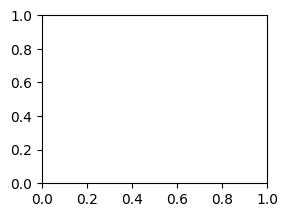

In [9]:
# Moore's Law
plt.subplot(2, 2, 1)
sns.lineplot(data=df, x='year', y='transistors_million')
plt.title("Moore's Law: Transistors vs Year")

Text(0.5, 1.0, 'Dannard Scaling: TDP vs Year')

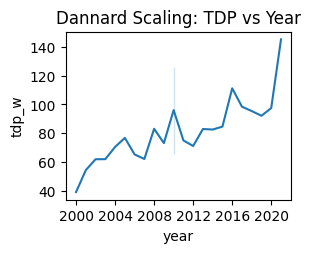

In [29]:
# Dannard Scaling
plt.subplot(2, 2, 2)
sns.lineplot(data=df, x='year', y='tdp_w')
plt.title("Dannard Scaling: TDP vs Year")


Text(0.5, 1.0, 'GPU Performance Improvement Factors')

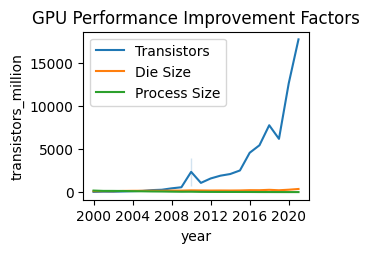

In [30]:
# GPU Performance Improvement
plt.subplot(2, 2, 3)
sns.lineplot(data=df, x='year', y='transistors_million', label='Transistors')
sns.lineplot(data=df, x='year', y='die_size_mm_2', label='Die Size')
sns.lineplot(data=df, x='year', y='process_size_nm', label='Process Size')
plt.title("GPU Performance Improvement Factors")


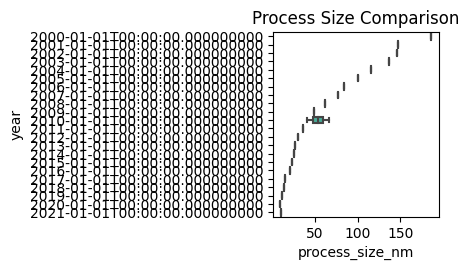

In [31]:
# Process Size Comparison
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='process_size_nm', y='year')
plt.title("Process Size Comparison")

plt.tight_layout()
plt.show()

Calculate and visualized the correlation among the features

<ipython-input-32-9d831ca3e6c6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


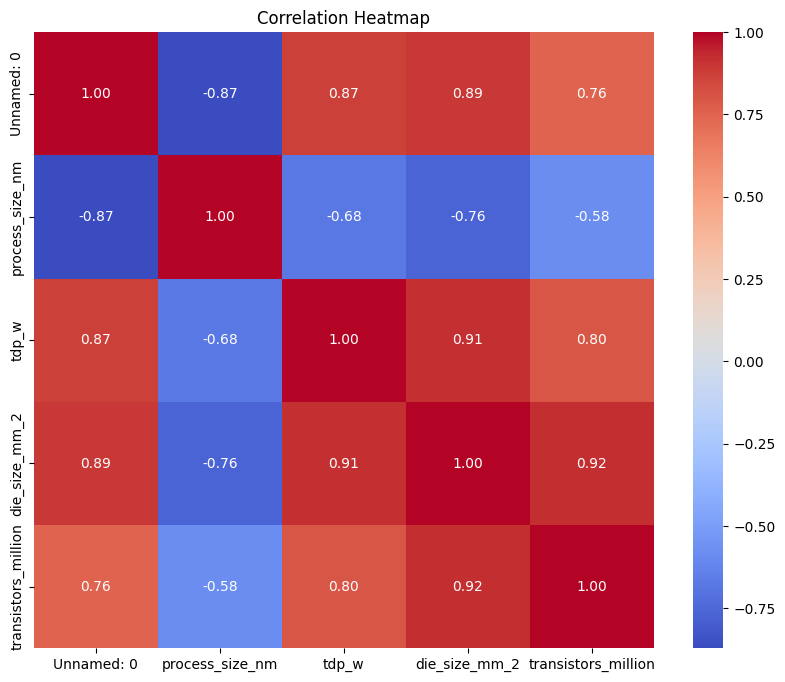

In [32]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Perfom the correct encoding for your data, in readiness for modelling.

In [33]:
data = pd.DataFrame(df)
print(data)

    Unnamed: 0       year  process_size_nm       tdp_w  die_size_mm_2  \
0            0 2000-01-01       186.000000   39.161290     113.282609   
1            1 2001-01-01       147.537313   54.420000     118.621212   
2            2 2002-01-01       146.203704   61.957447     116.421569   
3            3 2003-01-01       136.648649   62.010000     144.075949   
4            4 2004-01-01       115.413534   70.500000     158.439655   
5            5 2005-01-01       100.341365   76.776596     159.909091   
6            6 2006-01-01        84.356061   65.301370     171.652174   
7            7 2007-01-01        77.246696   62.129730     160.869767   
8            8 2008-01-01        61.526316   83.089888     183.641221   
9            9 2009-01-01        49.155251   73.166667     181.226244   
10          10 2010-01-01        41.689655   65.897527     170.871528   
11          11 2011-01-01        36.478788   75.034700     200.670732   
12          12 2012-01-01        30.694864   71.161